In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as sp 
import statsmodels.stats as stats
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import pickle 
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
np.set_printoptions(threshold=np.inf) # print numpy array fully 

train_16 = pd.read_csv("../Data/train_2016_v2.csv")
properties_16 = pd.read_csv("../Data/properties_2016.csv")

# intergrating dataset : properties_16 : left, train_16 : right, left join 
df_16 = pd.merge(properties_16, train_16, on="parcelid", how="inner")
                                # transactions은 한 id 의 건물이 여러번 거래 되었을 것이다.(train_16 < pro) 

# how : {'left', 'right', 'outer', 'inner'}, default 'inner'
#     * left: use only keys from left frame, similar to a SQL left outer join;
#       preserve key order
#     * right: use only keys from right frame, similar to a SQL right outer join;
#       preserve key order
#     * outer: use union of keys from both frames, similar to a SQL full outer
#       join; sort keys lexicographically
#     * inner: use intersection of keys from both frames, similar to a SQL inner
#       join; preserve the order of the left keys

del train_16
# properties_16 <- impute and preprocessing it 

# column_name : explanation ; dict type" 
with open("../Data/data_dict.p", "rb") as f:
    data_dict = pickle.load(f) 

/Users/MAC/.pyenv/versions/anaconda3-5.0.1/envs/python_ana/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df_16.tail() # 거래가 일어나서 logerror가 있는 properties만 고려 

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
90270,11876798,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,NaN,NaN,2068.0,2068.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34097523.0,-118164828.0,4981.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LAR1,6.037201e+07,12447.0,3101.0,114914.0,96013.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,2008.0,NaN,NaN,388582.0,596082.0,2015.0,207500.0,7335.81,NaN,NaN,6.037201e+13,0.0276,2016-04-15
90271,12808516,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,NaN,NaN,1352.0,1352.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,7.0,34045228.0,-117971653.0,6170.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LPR1*,6.037407e+07,39306.0,3101.0,NaN,96490.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1956.0,NaN,NaN,86209.0,178408.0,2015.0,92199.0,2441.74,NaN,NaN,6.037407e+13,-0.1188,2016-06-07
90272,12010248,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,860.0,860.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34100819.0,-118311704.0,NaN,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR4,6.037191e+07,12447.0,3101.0,32059.0,96009.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,2011.0,NaN,NaN,129000.0,420000.0,2015.0,291000.0,5070.41,NaN,NaN,6.037191e+13,0.0843,2016-06-30
90273,14310905,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,NaN,2268.0,2268.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,427.0,NaN,NaN,33660088.0,-117804958.0,3479.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059063e+07,52650.0,1286.0,275824.0,96947.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2012.0,NaN,NaN,389474.0,1215816.0,2015.0,826342.0,12508.30,NaN,NaN,NaN,-0.0050,2016-03-31
90274,14636609,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,NaN,1812.0,1812.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,0.0,NaN,NaN,33928486.0,-117944304.0,NaN,NaN,NaN,NaN,NaN,NaN,1,266.0,NaN,6.059001e+07,18874.0,1286.0,NaN,96186.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2013.0,NaN,NaN,237048.0,471286.0,2015.0,234238.0,5470.12,NaN,NaN,NaN,0.0129,2016-09-13


In [3]:
df_16.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,9.027500e+04,28781.000000,261.000000,43.000000,90275.000000,90275.000000,16.0,57364.000000,89093.000000,658.0,6856.000000,89614.000000,85596.000000,33.000000,3564.000000,6856.000000,421.000000,90275.000000,9607.000000,89093.000000,29937.000000,29937.000000,56080.000000,9.027500e+04,9.027500e+04,8.012500e+04,17901.0,969.000000,1161.0,1204.0,16697.0,90275.000000,9.027500e+04,88472.000000,90275.000000,36012.000000,90240.000000,90275.000000,43.0,12009.000000,299.000000,58353.000000,2646.000000,95.000000,89519.000000,20570.000000,8.989500e+04,9.027400e+04,90275.0,9.027400e+04,90269.000000,1783.000000,8.967000e+04,90275.000000
mean,1.298466e+07,1.816372,7.229885,713.581395,2.279474,3.031869,4.0,5.565407,2.309216,66.0,1347.974037,1773.185987,1745.454531,1404.545455,2380.090067,1355.546674,2302.546318,6048.870551,1.187884,2.241231,1.812005,345.521228,3.926979,3.400541e+07,-1.181989e+08,2.911016e+04,1.0,519.827657,1.0,1.0,1.0,261.832179,6.049179e+07,33761.332851,2525.420770,190646.540237,96586.131184,1.478516,7.0,1.008743,6.010033,1.110414,310.142101,311.694737,1968.532870,1.440739,1.800934e+05,4.576726e+05,2015.0,2.783353e+05,5983.975927,13.402692,6.049151e+13,0.011457
std,2.504510e+06,2.974168,2.716196,437.434198,1.004271,1.156436,0.0,1.900602,0.976172,0.0,652.399026,928.162393,909.941166,110.108211,1068.207182,673.703488,1346.255242,20.663461,0.484173,0.963142,0.608761,267.015918,3.684382,2.649654e+05,3.606032e+05,1.217213e+05,0.0,155.054210,0.0,0.0,0.0,5.182901,2.050549e+05,46672.393863,805.694842,166228.910572,3661.339094,2.819627,0.0,0.100830,0.437235,0.797235,216.721869,346.354850,23.763475,0.544498,2.091299e+05,5.548844e+05,0.0,4.004955e+05,6838.876956,2.715966,2.046605e+11,0.161079
min,1.071174e+07,1.000000,2.000000,100.000000,0.000000,0.000000,4.0,1.000000,1.000000,66.0,44.000000,2.000000,2.000000,1056.000000,560.000000,44.000000,257.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.333930e+07,-1.194479e+08,1.670000e+02,1.0,28.000000,1.0,1.0,1.0,31.000000,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,7.0,1.000000,4.000000,1.000000,25.000000,18.000000,1885.000000,1.000000,1.000000e+02,2.200000e+01,2015.0,2.200000e+01,49.080000,6.000000,6.037101e+13,-4.605000
25%,1.155950e+07,1.000000,7.000000,407.500000,2.000000,2.000000,4.0,4.000000,2.000000,66.0,938.000000,1184.000000,1172.000000,1392.000000,1648.000000,938.000000,1112.000000,6037.000000,1.000000,2.000000,2.000000,0.000000,2.000000,3.381154e+07,-1.184117e+08,5.703000e+03,1.0,420.000000,1.0,1.0,1.0,261.000000,6.037320e+07,12447.000000,1286.000000,46736.000000,96193.000000,0.000000,7.0,1.000000,6.000000,1.000000,180.000000,100.000000,1953.000000,1.000000,8.124500e+04,1.990232e+05,2015.0,8.222800e+04,2872.830000,13.000000,6.037320e+13,-0.025300
50%,1.254734e+07,1.000000,7.000000,616.000000,2.000000,3.000000,4.0,7.000000,2.000000,66.0,1244.000000,1540.000000,1518.000000,1440.000000,2104.500000,1248.000000,2028.000000,6037.000000,1.000000,2.000000,2.000000,433.000000,2.000000,3.402150e+07,-1.181734e+08,7.200000e+03,1.0,500.000000,1.0,1.0,1.0,261.000000,6.037620e+07,25218.0

#### airconditioningtypeid

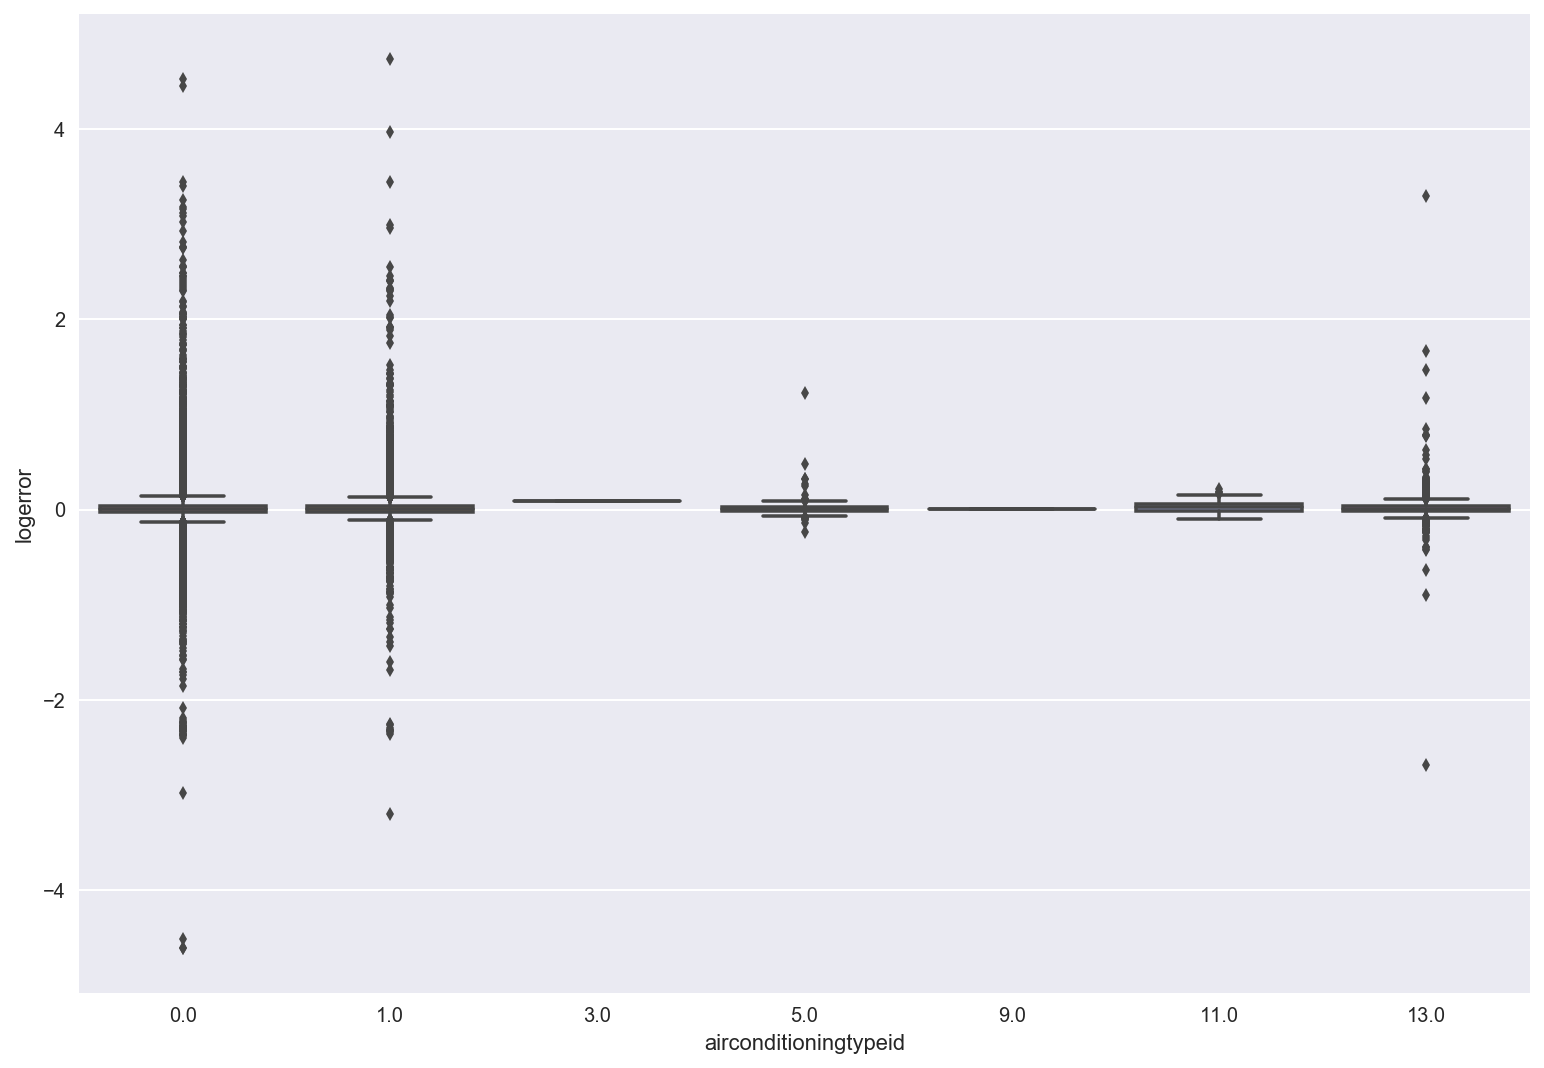

(90275,)


0    0
1    0
2    0
3    0
4    0
Name: airconditioningtypeid, dtype: int64

In [4]:
sns.set(rc={"figure.figsize": (13, 9)})
sns.boxplot(x="airconditioningtypeid", y="logerror", data=df_16.fillna(0)) #fillna를 하기 전에도 결과는 똑같다. 
plt.show() # 에어컨 타입 별로 차이를 해석 하기 힘들다. 차이가 보이는 부분은 데이터의 개수 차이 때문에 의미가 흐려져있다. 
#### 이 건 그냥 one hot으로 취급 하고, nan -> 0 
catecols = ["airconditioningtypeid"]

# Imputation!
df_16.airconditioningtypeid = [int(x) for x in df_16.airconditioningtypeid.fillna(0)]
properties_16.airconditioningtypeid = [int(x) for x in properties_16.airconditioningtypeid.fillna(0)]
print(df_16.airconditioningtypeid.shape)
df_16.airconditioningtypeid[:5]

#### architecturalstyletypeid

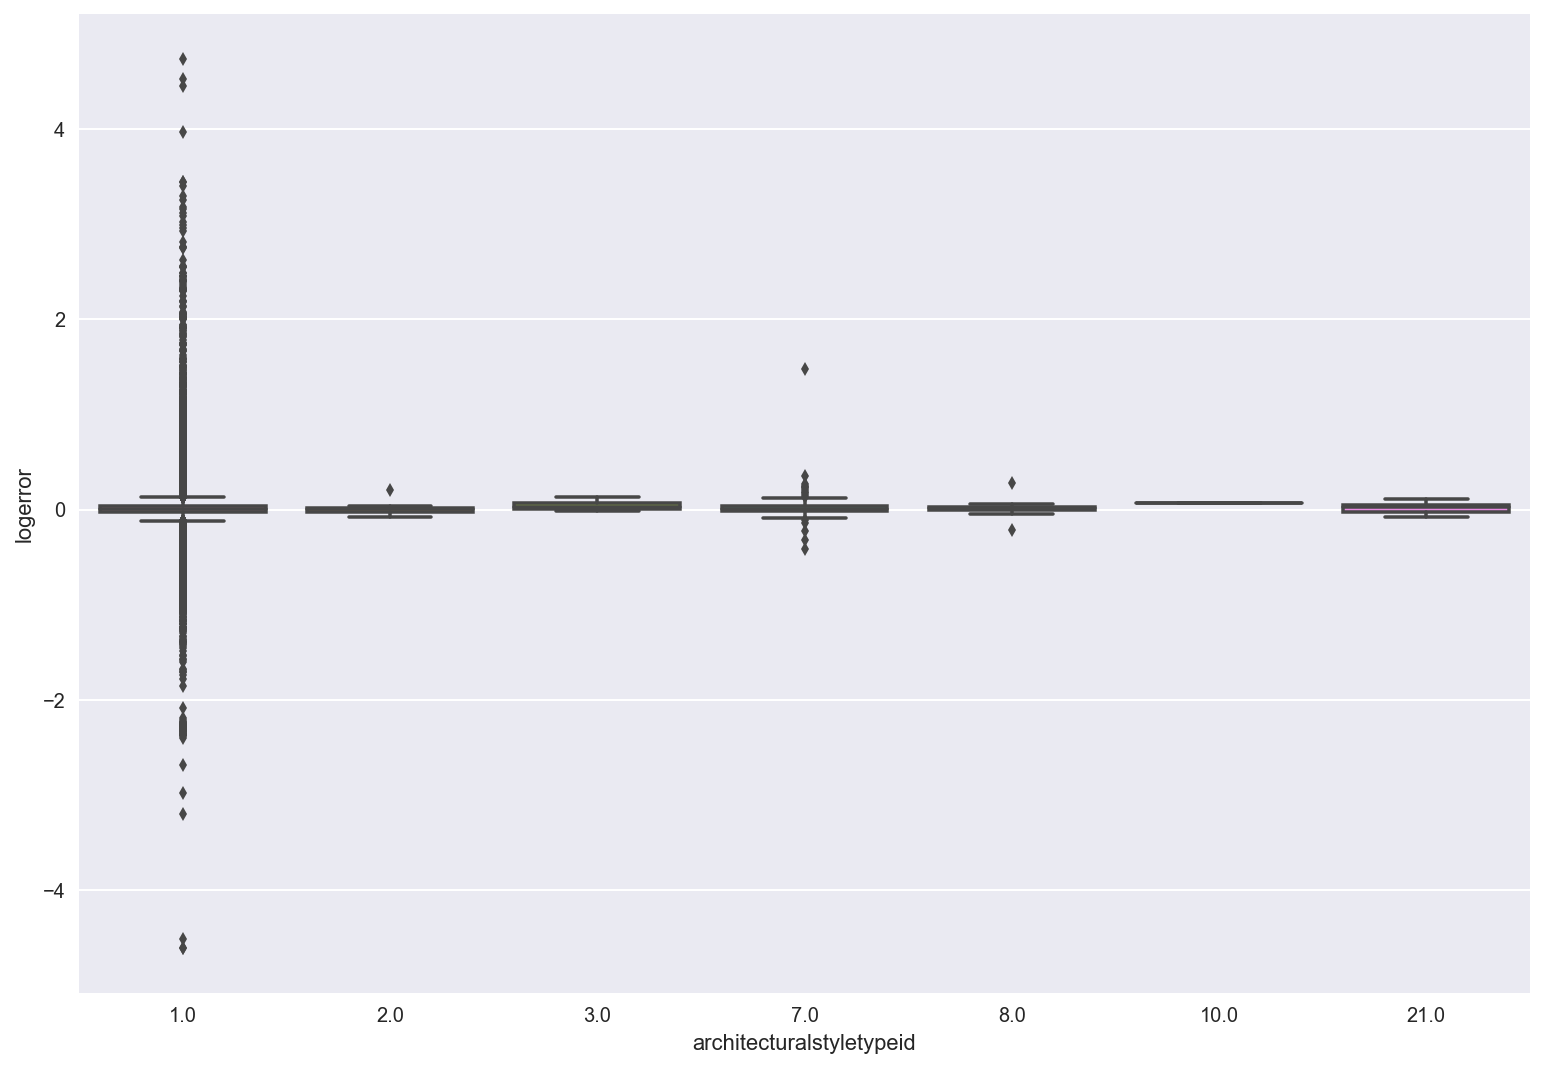

In [5]:
sns.set(rc={"figure.figsize": (13, 9)})
sns.boxplot(x="architecturalstyletypeid", y="logerror", data=df_16.fillna(1)) #fillna를 하기 전에도 결과는 똑같다. 
plt.show() # 에어컨 타입 별로 차이를 해석 하기 힘들다. 차이가 보이는 부분은 데이터의 개수 차이 때문에 의미가 흐려져있다. 
#### 이 건 그냥 one hot으로 취급 하고, nan -> 0 
# df_16.airconditioningtypeid = [int(x) for x in df_16.airconditioningtypeid.fillna(0)]
# print(df_16.airconditioningtypeid.shape)
# df_16.airconditioningtypeid[:5]



In [6]:
ach_type_val, ach_type_counts = np.unique(df_16["architecturalstyletypeid"].fillna(1), return_counts=True)
print('architecturalstyletypeid')
pd.DataFrame(ach_type_counts, index=ach_type_val, columns=['count'])

architecturalstyletypeid


,count
1.0,90014
2.0,11
3.0,4
7.0,221
8.0,16
10.0,1
21.0,8


-  1.0  -
0.16118848531527757
-  2.0  -
0.0700146006024505
-  3.0  -
0.056112092056881994
-  7.0  -
0.12259377165012414
-  8.0  -
0.0927003183567214
-  10.0  -
0.0
-  21.0  -
0.05741125216366562


0    1
1    1
2    1
3    1
4    1
Name: architecturalstyletypeid, dtype: int64

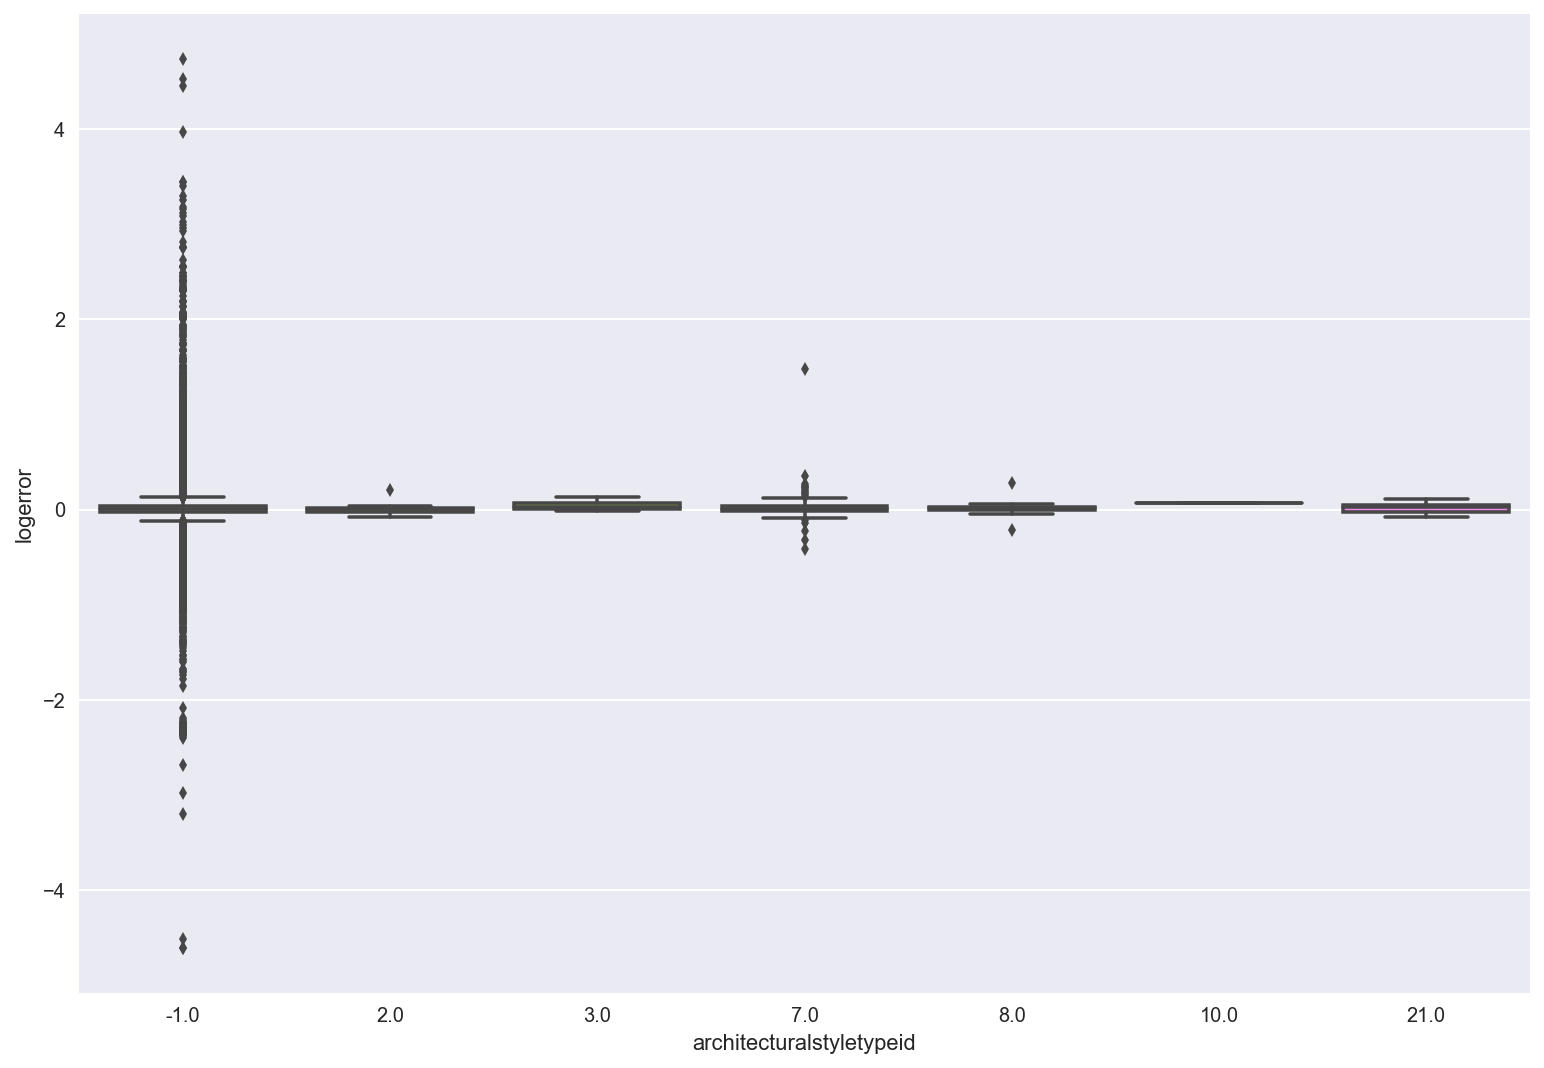

In [7]:
# 난 값이 대부분 이고 nan 값이면 로그에러의 분산이 커보인다. 
sns.boxplot(x="architecturalstyletypeid", y='logerror', data=df_16.fillna(-1, inplace=False))
# 실제 수치적으로는 아래와 같다. 모표준편차 추정값
for t in ach_type_val:
    arc_type_t_std = []
    print("- ", t, " -")
    if t == 1:
        print(np.std(df_16.fillna(1, inplace=False)[df_16.architecturalstyletypeid.isna()].logerror))
        continue
    print(np.std(df_16.fillna(1, inplace=False)[df_16.architecturalstyletypeid == t].logerror))
    
## 이 것 역시 onehot그냥 원핫으로 -1로 nan imputation 
catecols.append("architecturalstyletypeid")

## Imputation
df_16.architecturalstyletypeid = [int(x) for x in df_16.architecturalstyletypeid.fillna(1)]
properties_16.fillna(1, inplace=True)
df_16.architecturalstyletypeid[:5]

#### basementsqft

,Finished living area below or partially below ground level


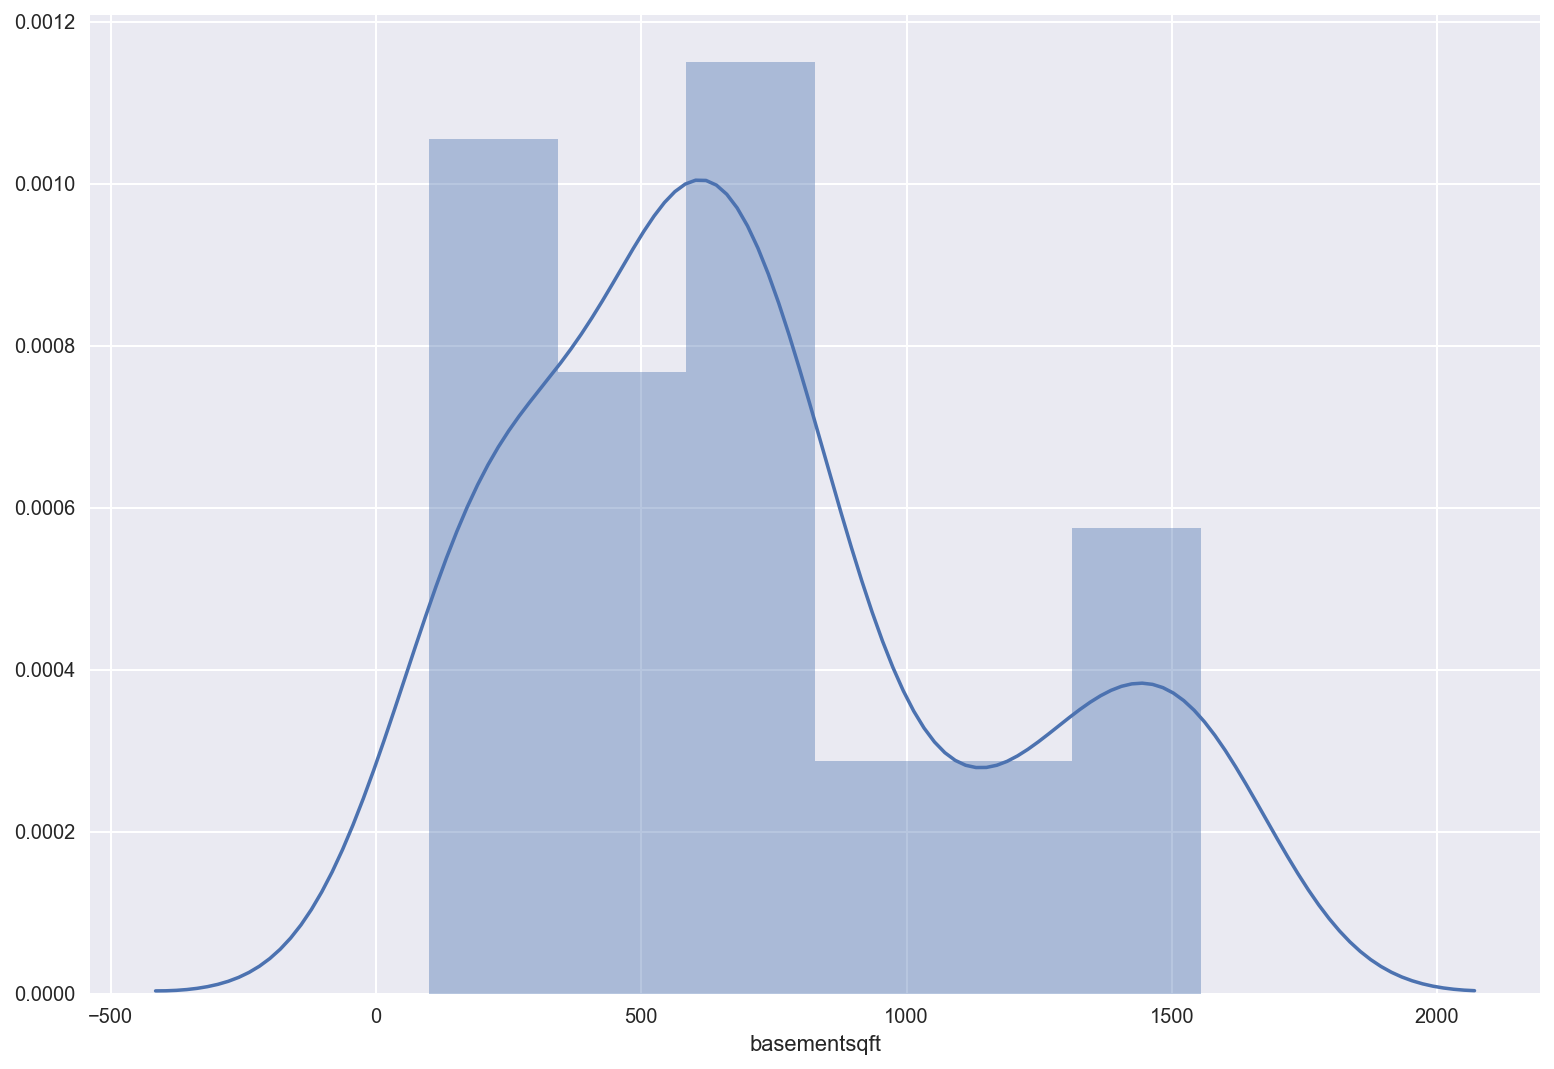

In [8]:
### basementsqft -> ,Finished living area below or partially below ground level
#### -> 있을 때만, 측정 되었을 것이다. 
print(data_dict["basementsqft"])

# np.min(df_16.basementsqft) == 100.0 
# 그냥 숫자로 넣기 보다, 평균 이동을 하고 nan값을 
sns.distplot(df_16.basementsqft.dropna())

In [9]:
df_16.basementsqft.dropna().shape # 43 개의 값만 있다.
# nan을 0으로 넣고, loggerror와의 상관계수와scatter를 그려 보자 

(43,)

cor,   p-value
(0.009019339896495443, 0.006729329677202943)
spearman
SpearmanrResult(correlation=0.008510443935220246, pvalue=0.010556655551209129)


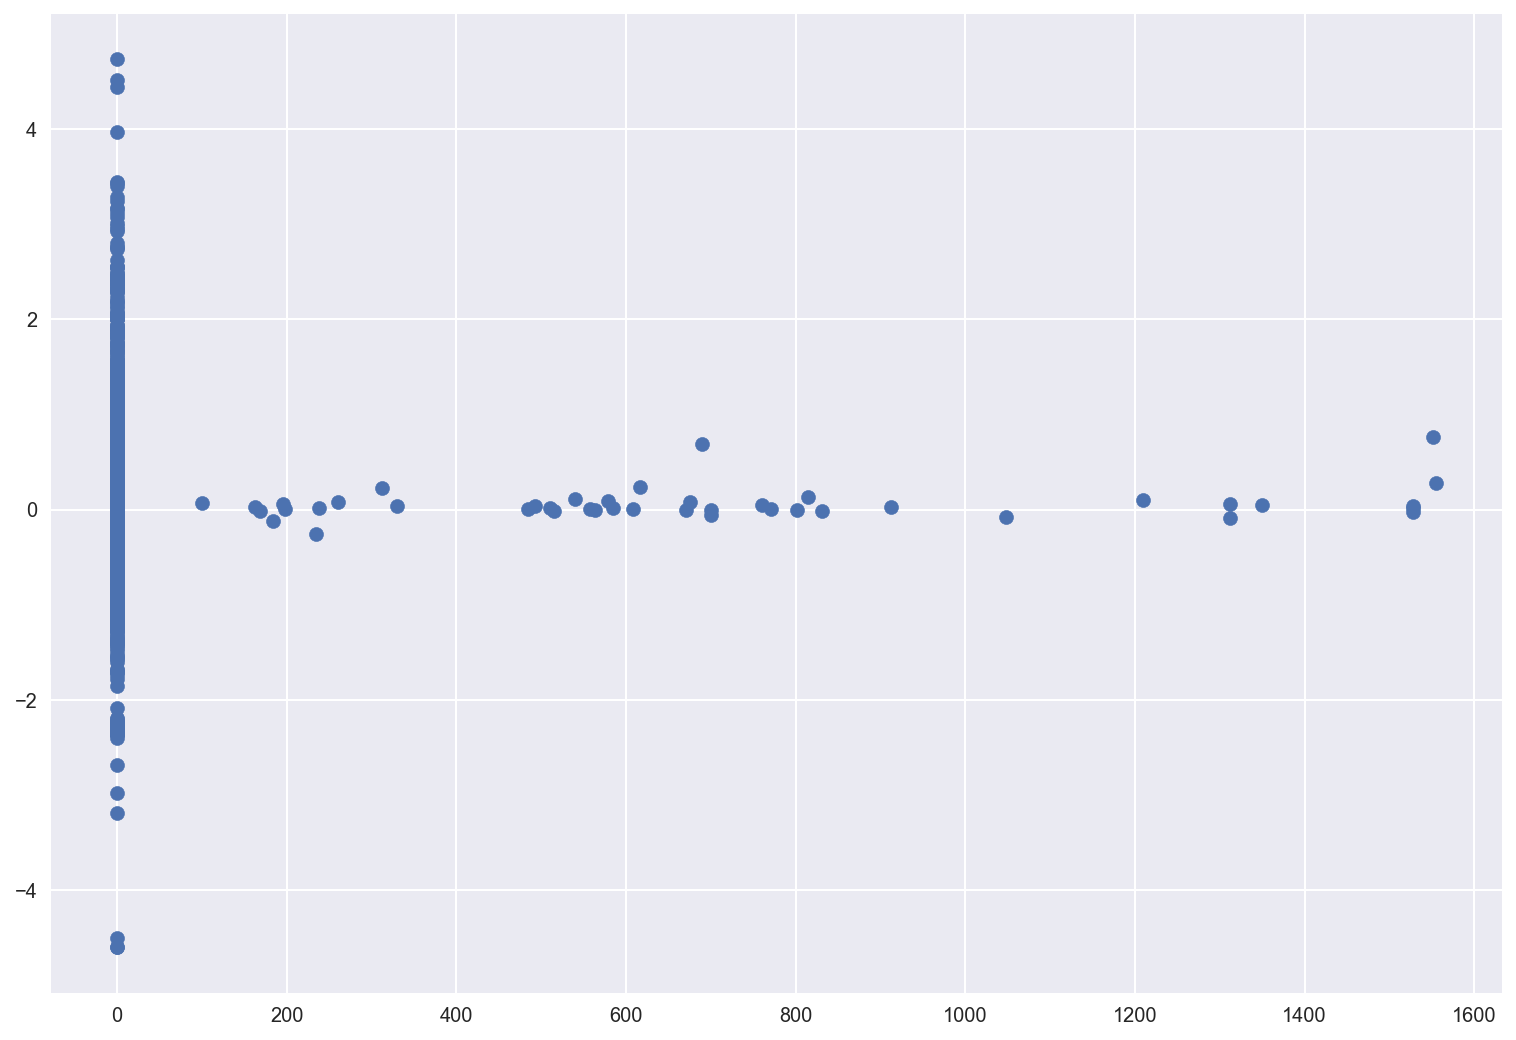

In [10]:
# 뚜렸한 관계가 안보인다. -> 그냥 있냐 없냐 정도로 처리 해도 괜찮을 듯 `
# correlation 선형! 
print("cor,   p-value" )
print(sp.stats.pearsonr(df_16.basementsqft.fillna(0), df_16.logerror))
print('spearman')
print(sp.stats.spearmanr(df_16.basementsqft.fillna(0), df_16.logerror))
plt.scatter(df_16.basementsqft.fillna(0), df_16.logerror) 
#Target과의 상관관계가 없다. nan 값은 그냥 0과 min값보다 작은 99 두가지를 시도 해보겠다. 
df_16.basementsqft = df_16.basementsqft.fillna(0)
properties_16.fillna(0, inplace=True)
numecols = ["basementsqft"]

#### bathroomcnt

,Number of bathrooms in home including fractional bathrooms


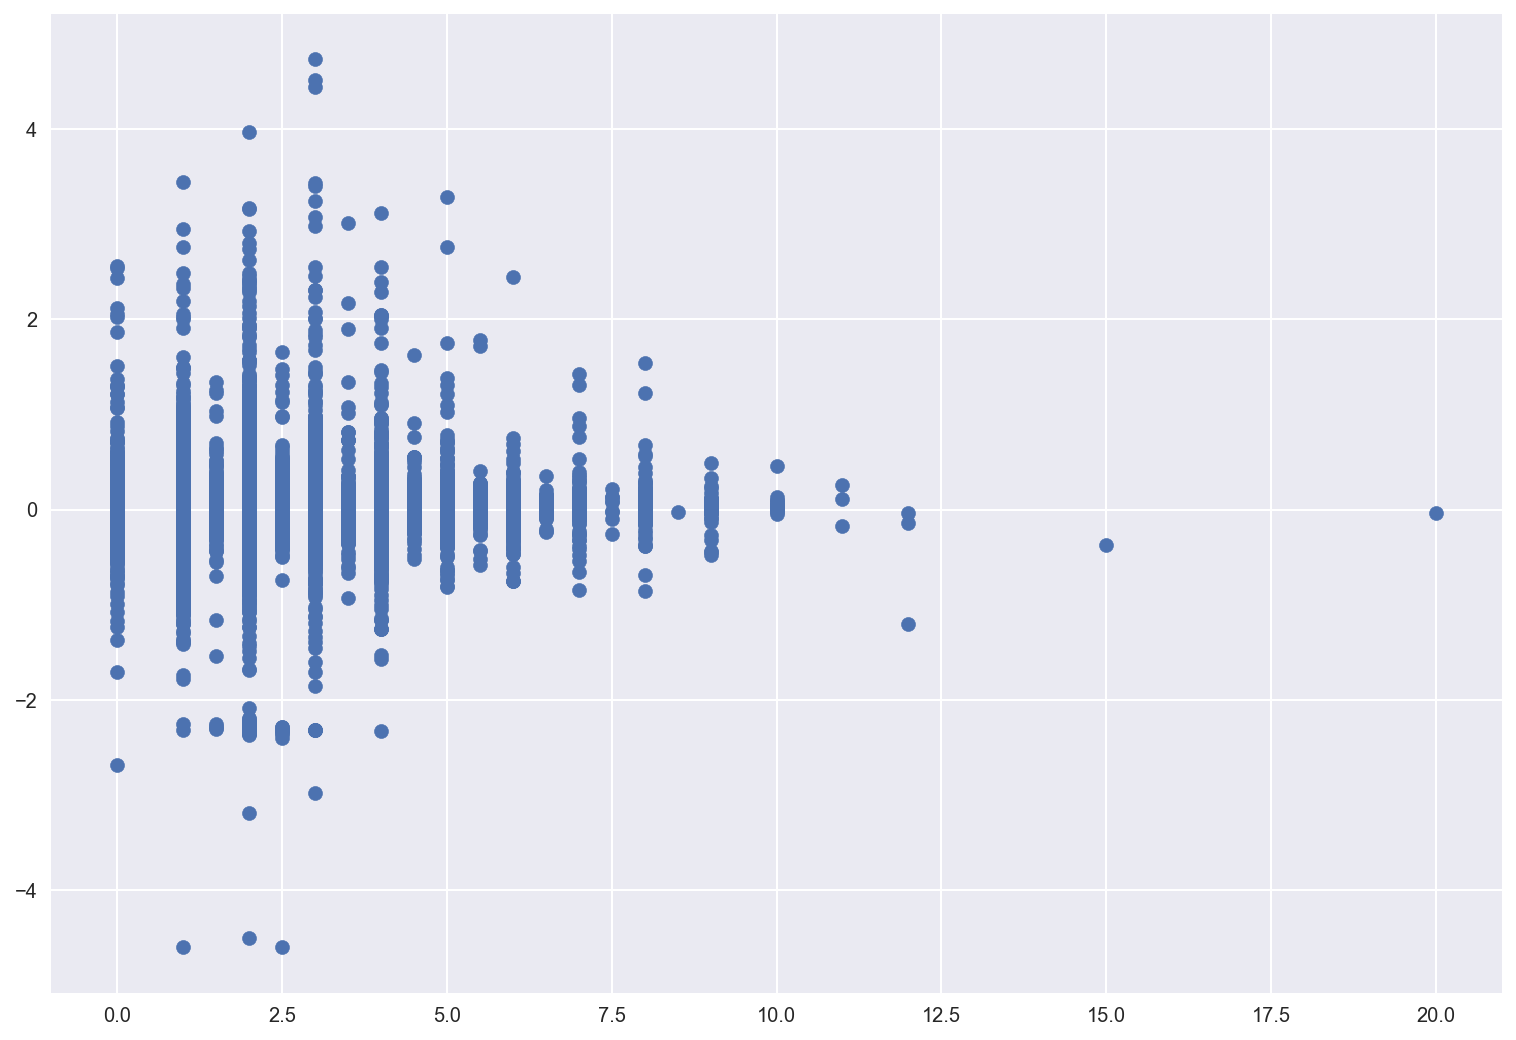

In [11]:
print(data_dict["bathroomcnt"])
# plt.figure()
# sns.distplot(df_16.bathroomcnt)
plt.figure()
plt.scatter(df_16.bathroomcnt, df_16.logerror)

#  아무 처리 안함 

In [12]:
properties_16.bathroomcnt.isnull().sum()

0

In [13]:
numecols.append("bathroomcnt")
df_16.bathroomcnt[df_16.bathroomcnt > 10.0] 
# 화장실이 10개 이상인것은 8개 밖에 없다. 나중에 모델에서 영향이 크면 빼거나, 몇개로 범주화해서 처리 하겠다. 

9678     12.0
13285    11.0
42935    12.0
49230    20.0
53272    11.0
55103    11.0
69157    12.0
87193    15.0
Name: bathroomcnt, dtype: float64

#### bedroomcnt

In [14]:
print(data_dict["bedroomcnt"])

,Number of bedrooms in home


/Users/MAC/.pyenv/versions/anaconda3-5.0.1/envs/python_ana/lib/python3.6/site-packages/scipy/stats/morestats.py:2183: RuntimeWarning: divide by zero encountered in double_scalars
  Xsq = np.sum(Ni * (asarray(Aibar) - anbar)**2.0, axis=0) / varsq


2.0 3.0


/Users/MAC/.pyenv/versions/anaconda3-5.0.1/envs/python_ana/lib/python3.6/site-packages/scipy/stats/morestats.py:2183: RuntimeWarning: invalid value encountered in double_scalars
  Xsq = np.sum(Ni * (asarray(Aibar) - anbar)**2.0, axis=0) / varsq


12.0 13.0


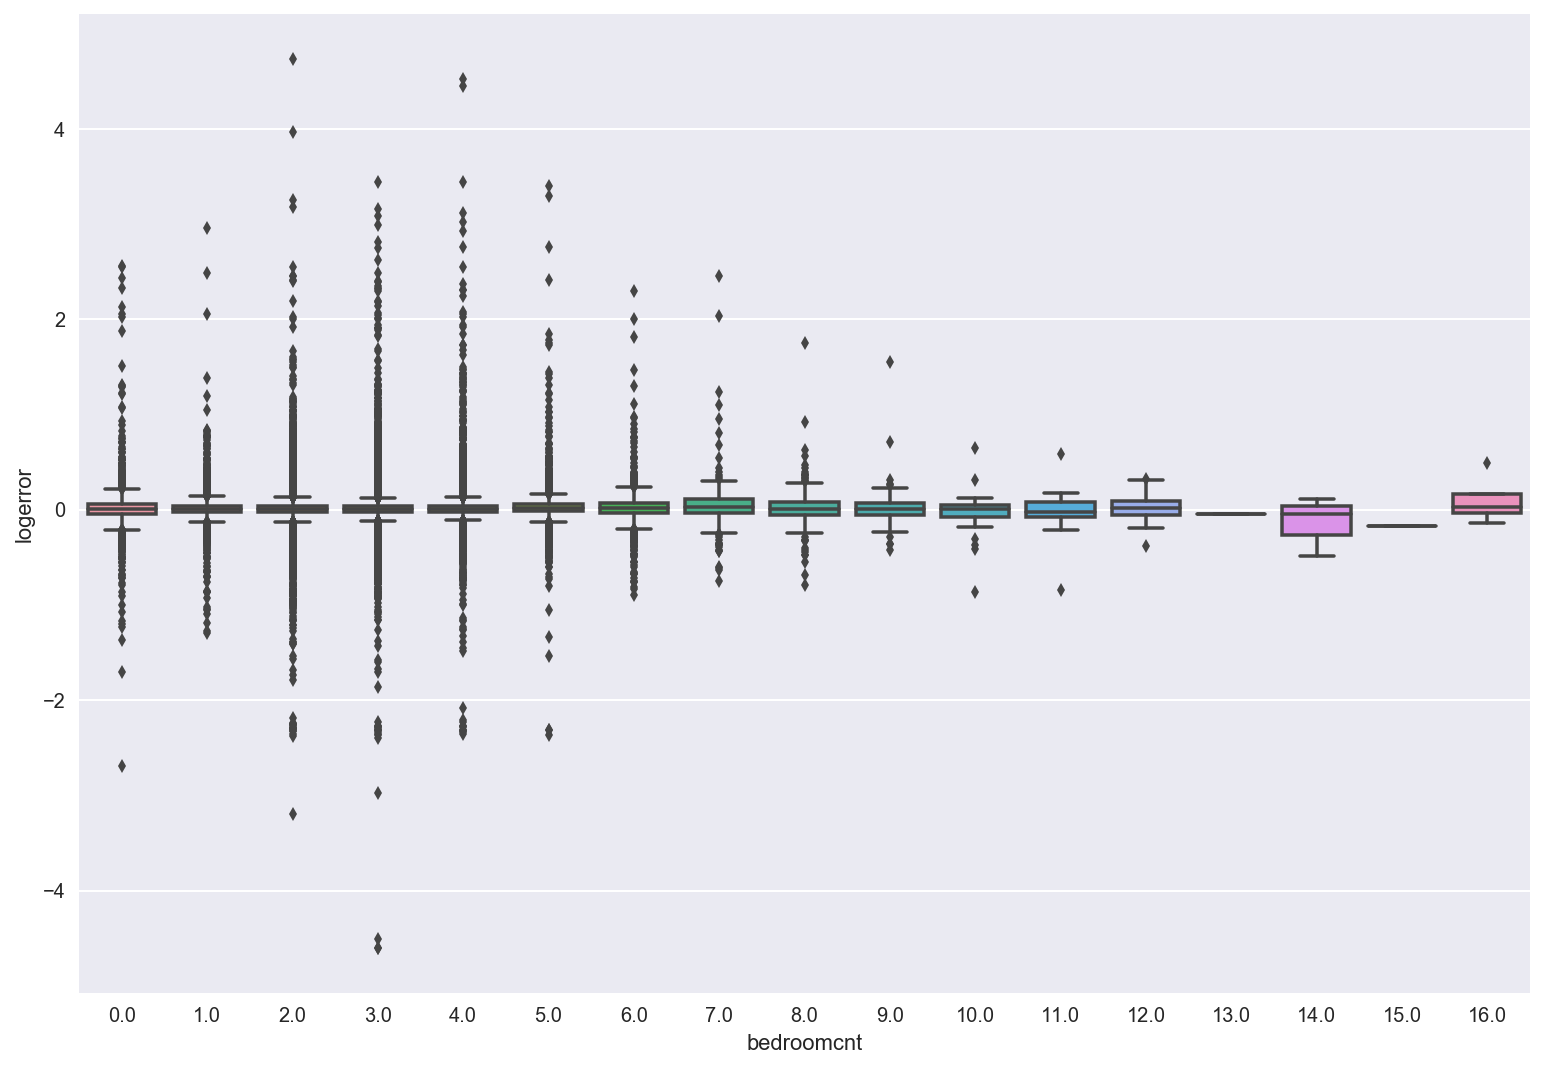

In [15]:
# plt.scatter(df_16.bedroomcnt, df_16.logerror)
sns.boxplot(df_16.bedroomcnt, df_16.logerror)  # 분산 값에는 차이가 있어보이기도 한다. 
# 등분산 검정 
bedroom_val, bedroom_counts = np.unique(df_16.bedroomcnt, return_counts=True)
for i, j in zip(bedroom_val[:-1], bedroom_val[1:]):
    if sp.stats.fligner(df_16.bedroomcnt[df_16.bedroomcnt == i], df_16.bedroomcnt[df_16.bedroomcnt == j])[1] > 0.005:
        print(i, j)
        
        
# 2, 3 과 12, 13은 로그에러의 분산이 같다고 볼 수 있겠다. (유의 수준 1 %)

In [16]:
len(np.unique(df_16.bedroomcnt)) ## 17개 category or 17개의 정수 값

17

4
0.9238548878427029
4.0


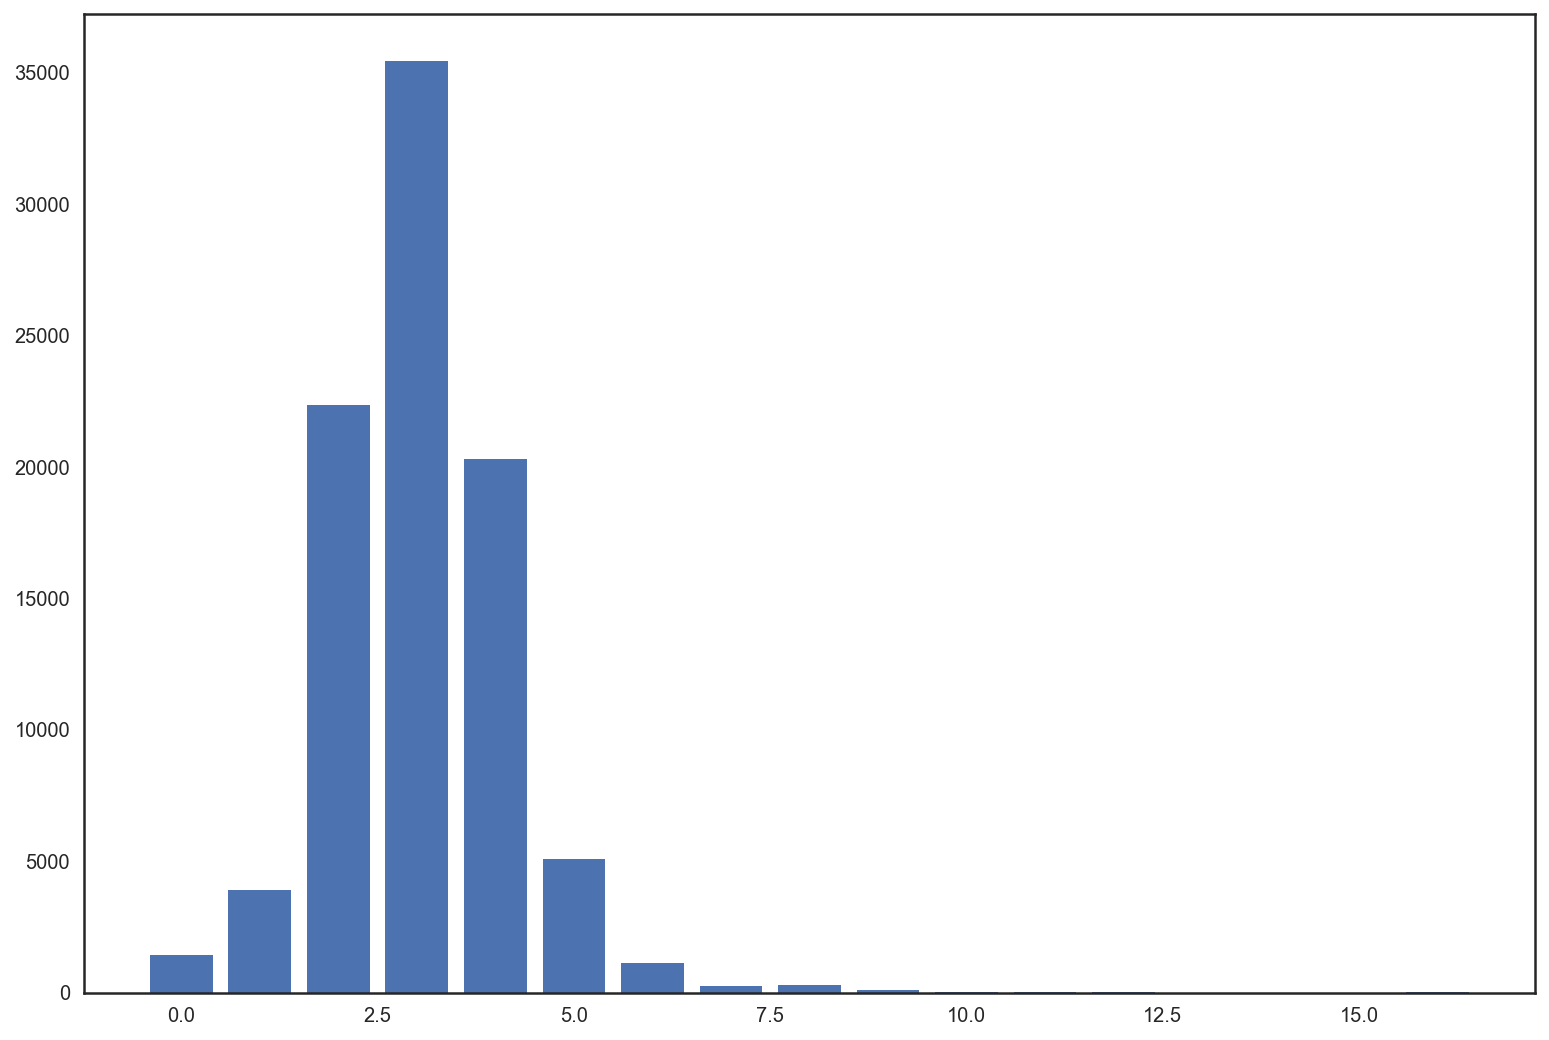

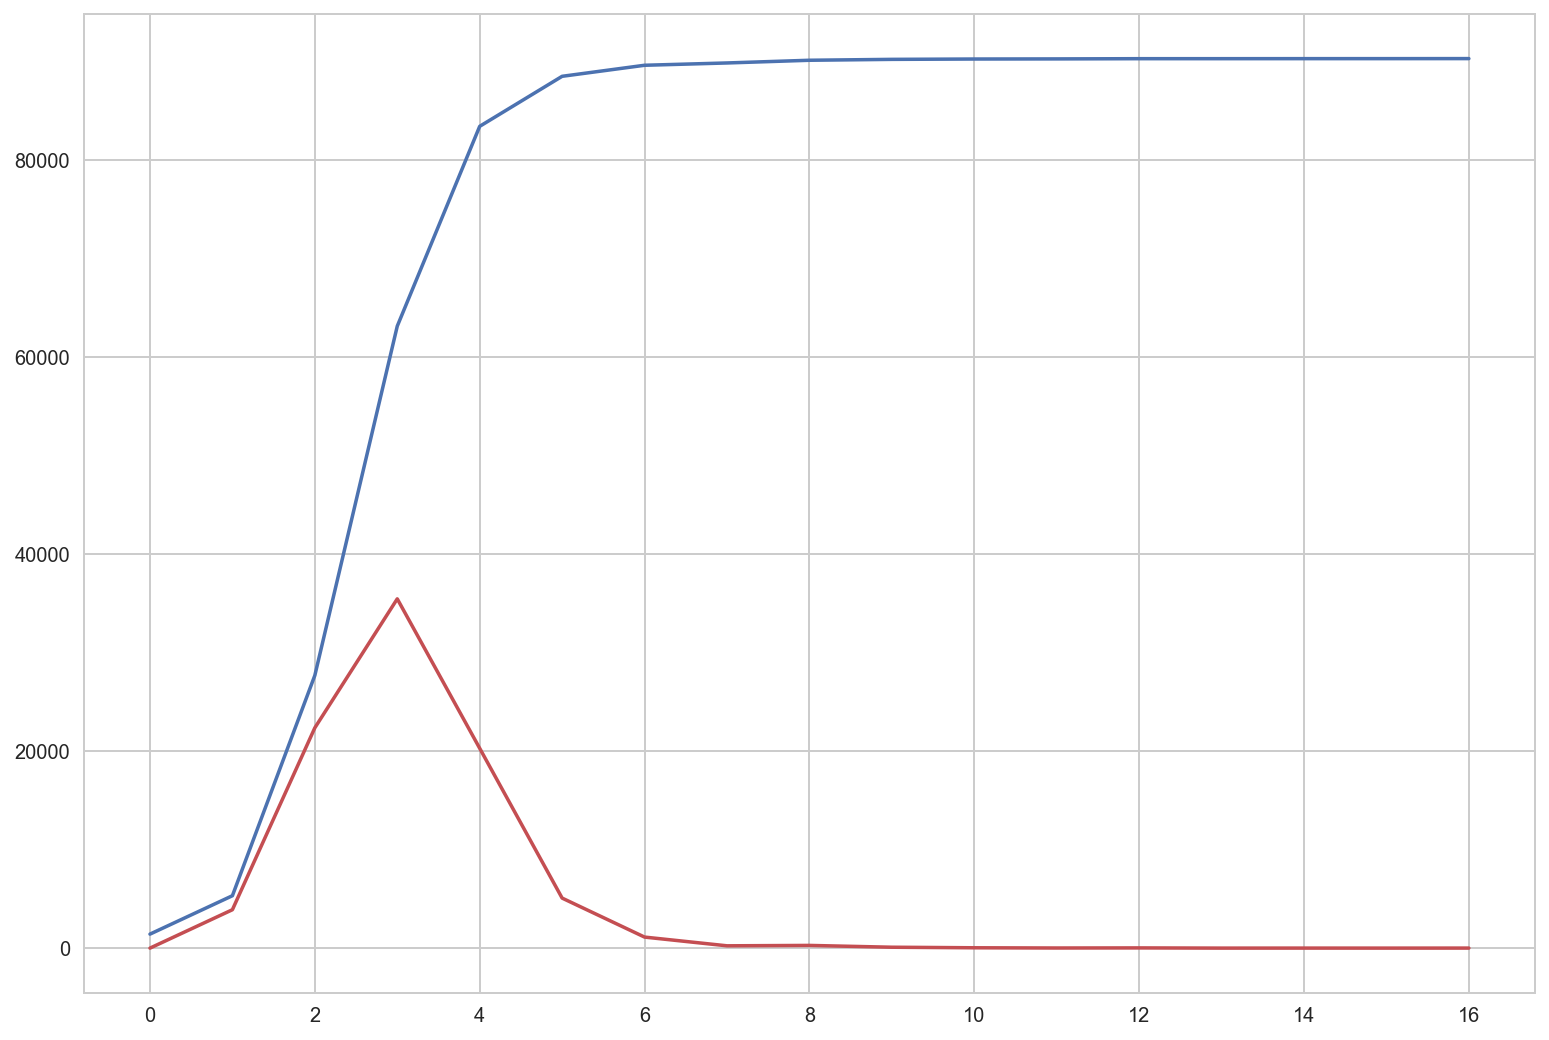

In [17]:
sns.set_style("white")
plt.bar(x=bedroom_val, height=bedroom_counts)

# sns.countplot(x=bedroom_val y=bedroom_counts)
plt.figure()
sns.set_style("whitegrid")
plt.plot(bedroom_val, np.cumsum(bedroom_counts))

for i, nu in enumerate(np.cumsum(bedroom_counts)):
    
    if nu/sum(bedroom_counts) >= 0.8:
        print(i)
        print(nu/sum(bedroom_counts))
        print(bedroom_val[i])
        break
        
## 위 cdf의 pdf 
pdf_points = [0]
for nu1, nu2 in zip(np.cumsum(bedroom_counts)[:-1], np.cumsum(bedroom_counts)[1:]):
    pdf_points.append((nu2 - nu1))
plt.plot(bedroom_val, pdf_points, c='r')

# numerical data appending 
numecols.append('bedroomcnt')

In [18]:
properties_16.bedroomcnt.isnull().sum()

0

#### buildingclasstypeid

In [19]:
df_16.buildingclasstypeid.dropna()

# typeid == 4 -> 1  or not -> 0
df_16.buildingclasstypeid = np.array([1 if x == 4.0 else 0 for x in df_16.buildingclasstypeid.fillna(0)])
properties_16.buildingclasstypeid = np.array([1 if x == 4.0 else 0 for x in properties_16.buildingclasstypeid.fillna(0)])
df_16.buildingclasstypeid.tail()

90270    0
90271    0
90272    0
90273    0
90274    0
Name: buildingclasstypeid, dtype: int64

In [20]:
# numecols.append("buildingclasstypeid")
bincols = ["buildingclasstypeid"]

#### buildingqualitytypeid

In [21]:
len(np.unique(df_16.buildingqualitytypeid.dropna())) ## -> 8개 종류

8

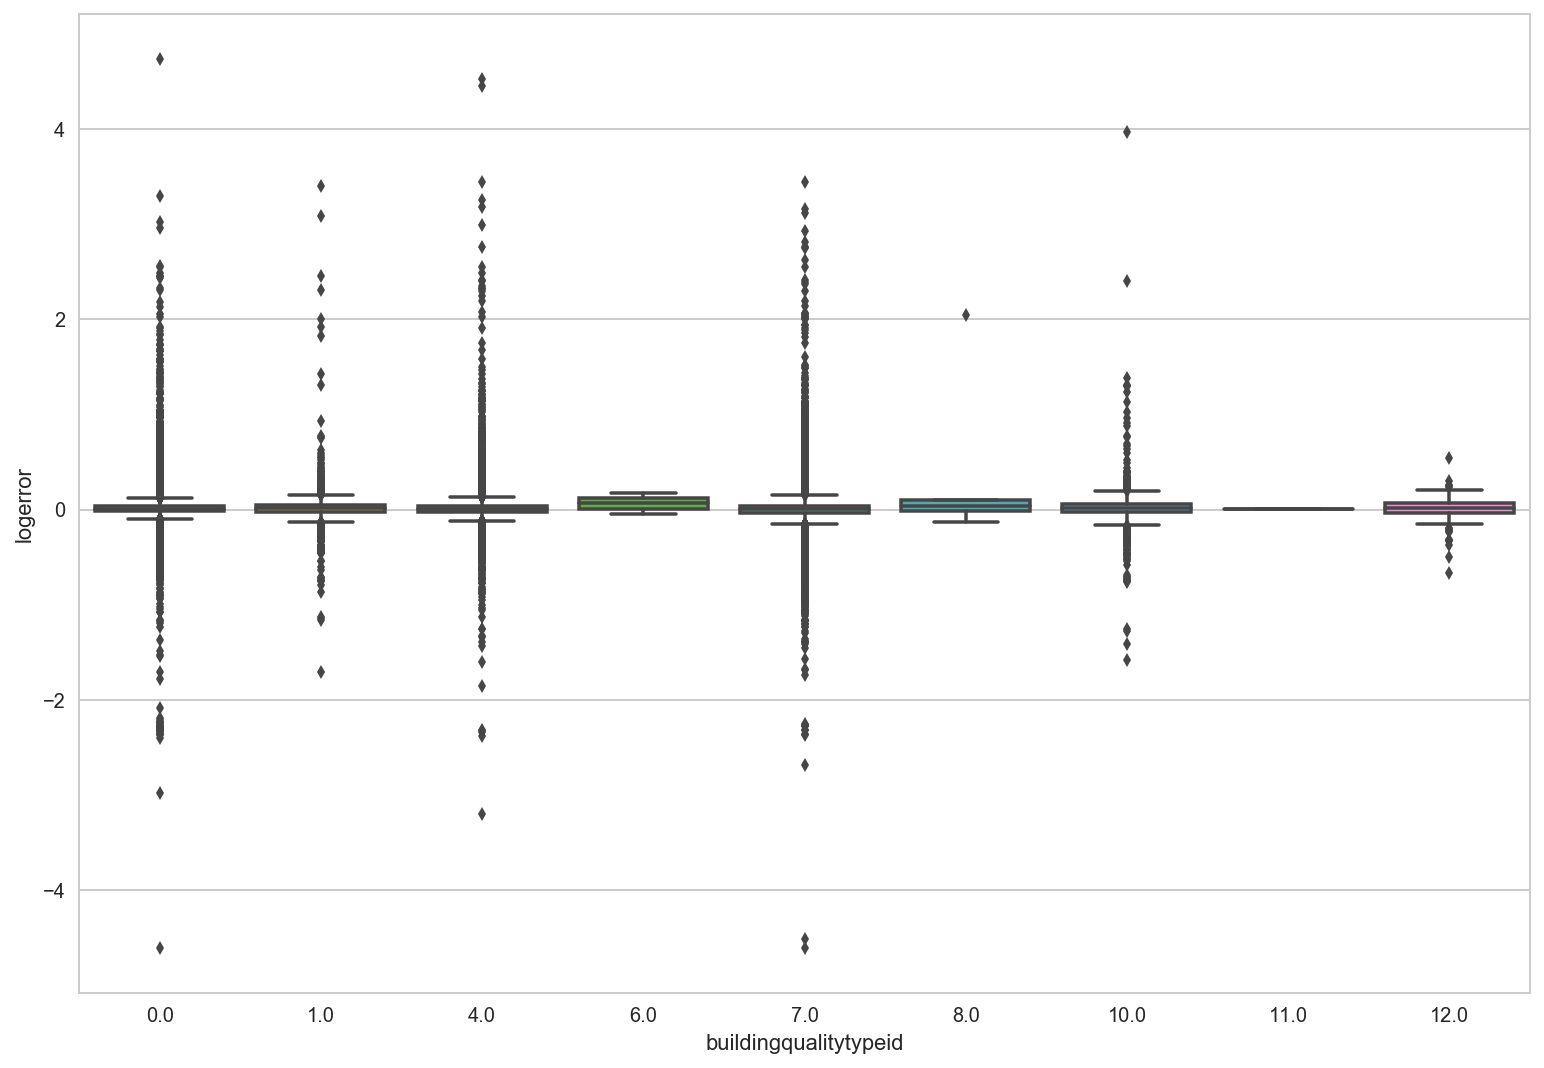

In [22]:
sns.boxplot(x=df_16.buildingqualitytypeid.fillna(0), y=df_16.logerror)

In [23]:
# nan값 ->  0 and categorical 
df_16.buildingqualitytypeid.fillna(0, inplace=True)
properties_16.buildingqualitytypeid.fillna(0, inplace=True)
catecols.append("buildingqualitytypeid")

#### calculatedbathnbr

(0, 20)

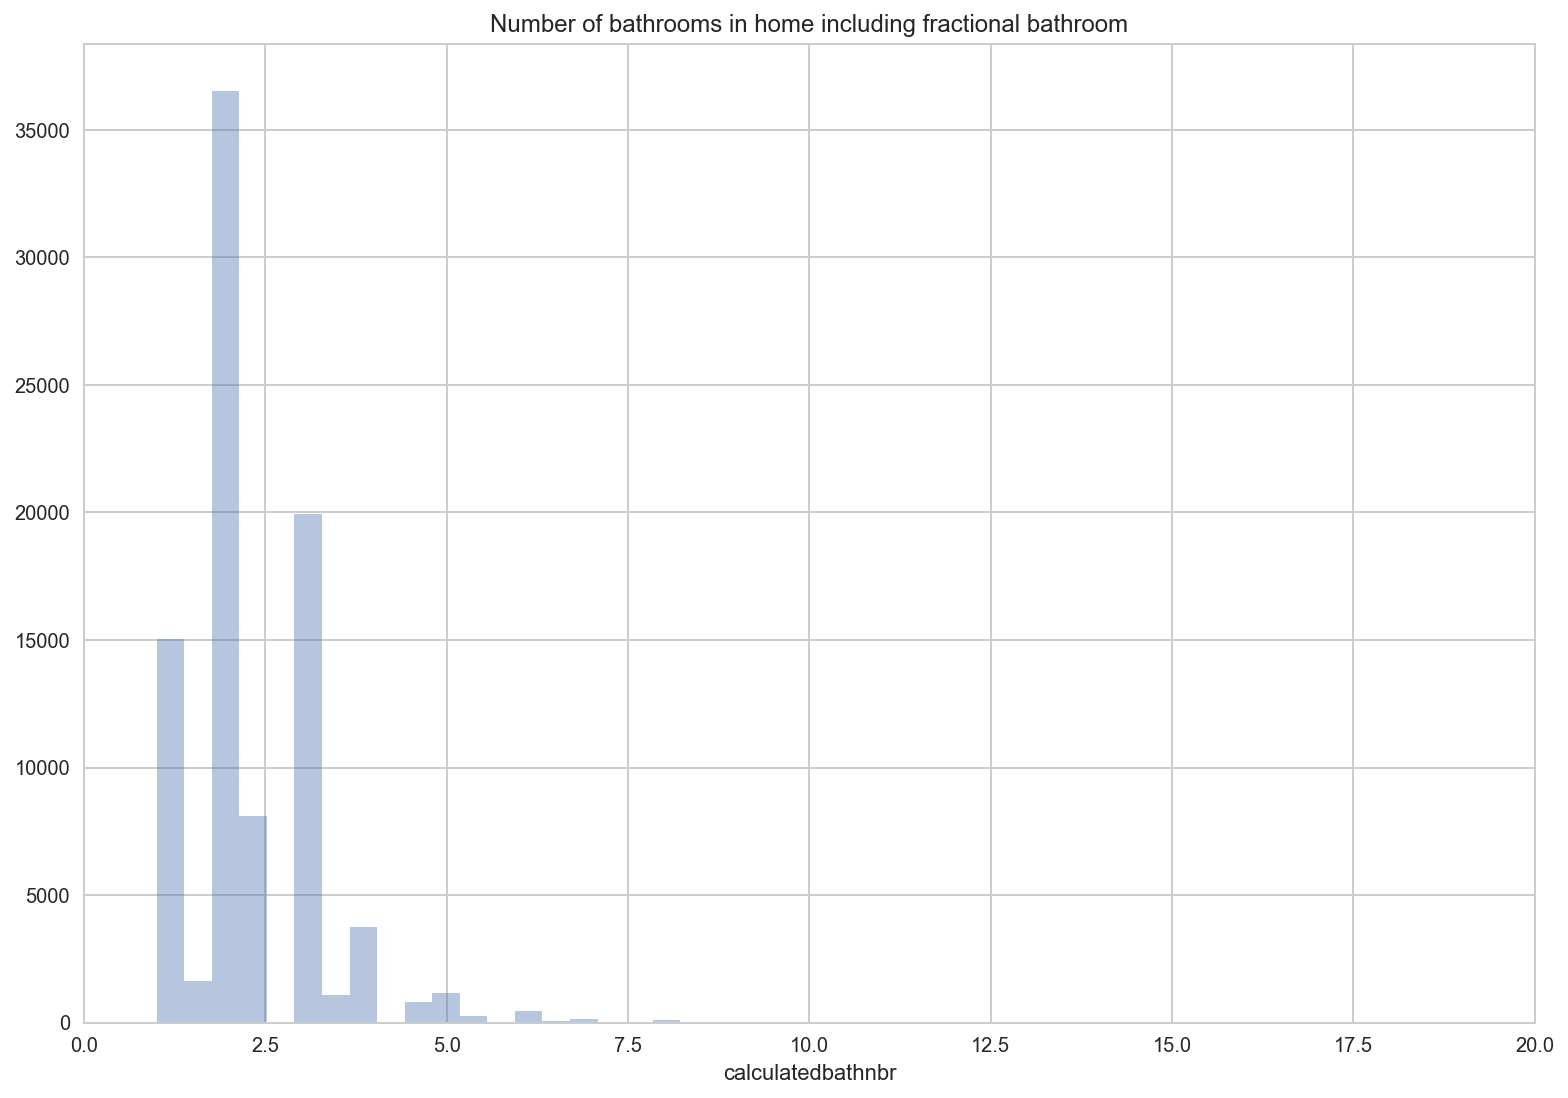

In [24]:
plt.title(data_dict["calculatedbathnbr"][1:])
sns.distplot(df_16.calculatedbathnbr.dropna(), kde=False)
plt.xlim(0, 20)

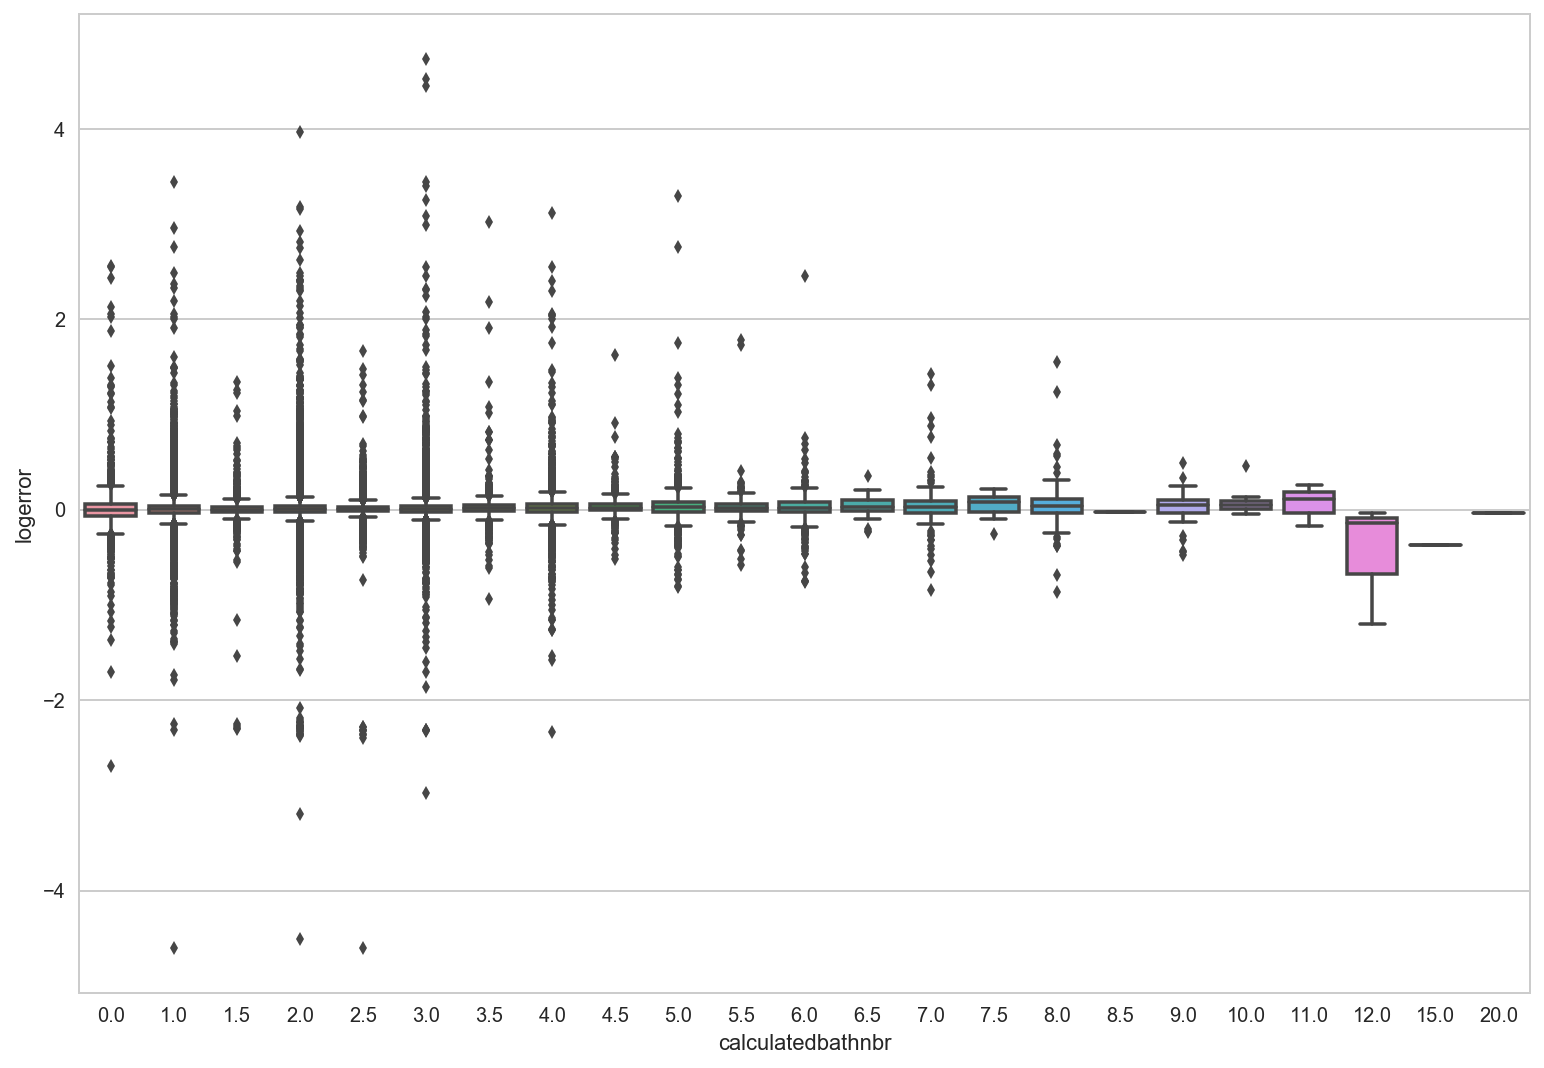

In [25]:
sns.boxplot(df_16.calculatedbathnbr.fillna(0), df_16.logerror)

In [26]:
# integervalues - fillna(0)
df_16.calculatedbathnbr.fillna(0, inplace=True)
properties_16.calculatedbathnbr.fillna(0, inplace=True)
numecols.append("calculatedbathnbr")

#### decktypeid

In [27]:
## 66 -> 1, nan -> 0
df_16.decktypeid = np.array([1 if x == 66.0 else 0 for x in df_16.decktypeid.fillna(0)])
properties_16.decktypeid = np.array([1 if x == 66.0 else 0 for x in properties_16.decktypeid.fillna(0)])
bincols.append("decktypeid")

#### finishedfloor1squarefeet

,Size of the finished living area on the first (entry) floor of the home


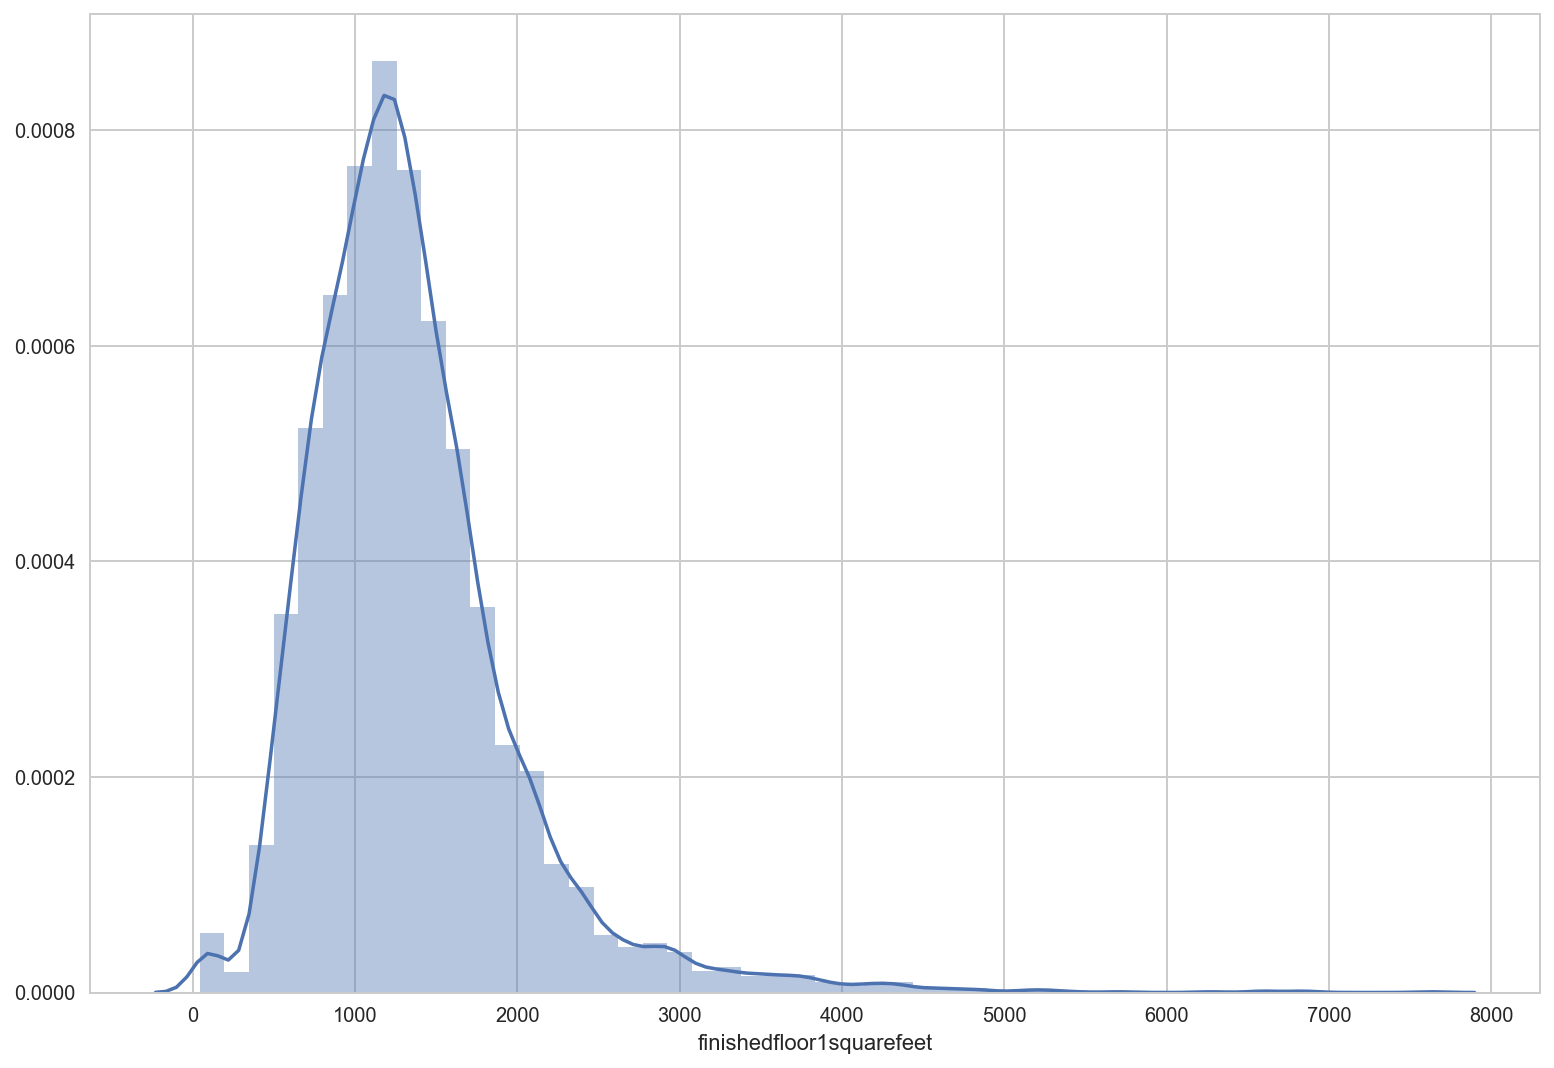

In [28]:
print(data_dict['finishedfloor1squarefeet'])
sns.distplot(df_16.finishedfloor1squarefeet.dropna())

In [29]:
df_16.finishedfloor1squarefeet.fillna(df_16.finishedfloor1squarefeet.mean(), inplace=True)
properties_16.finishedfloor1squarefeet.fillna(df_16.finishedfloor1squarefeet.mean(), inplace=True)
numecols.append("finishedfloor1squarefeet")

#### calculatedfinishedsquarefeet

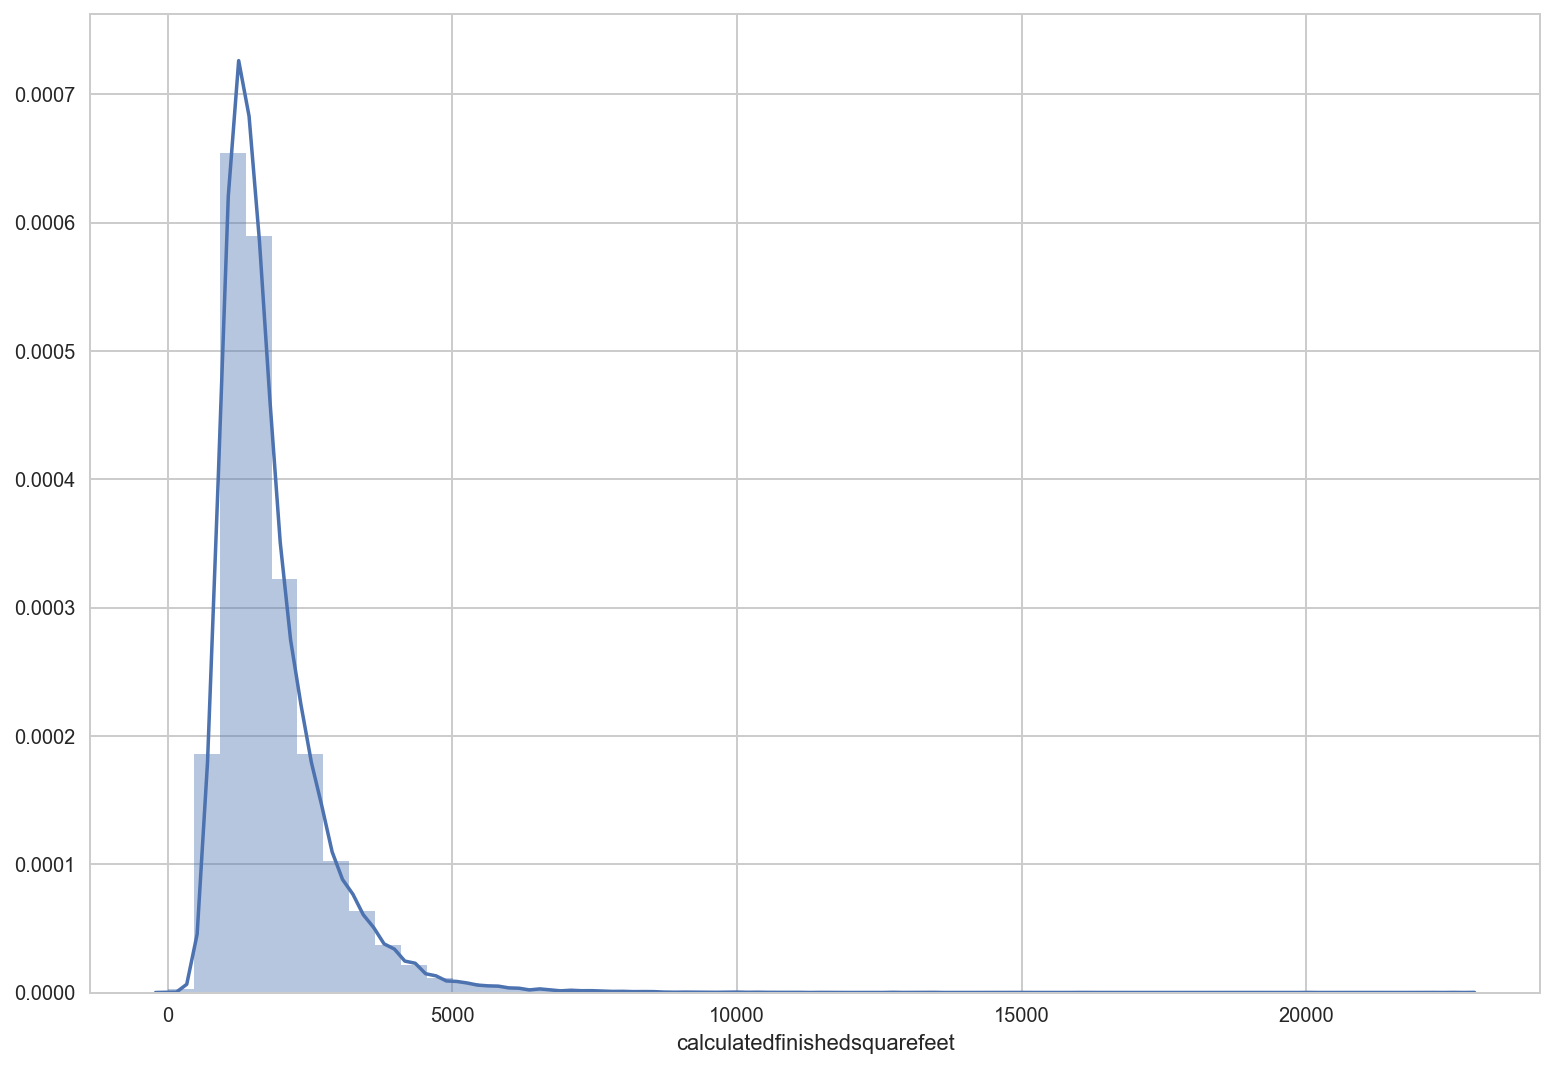

In [30]:
data_dict["calculatedfinishedsquarefeet"]
sns.distplot(df_16.calculatedfinishedsquarefeet.dropna())

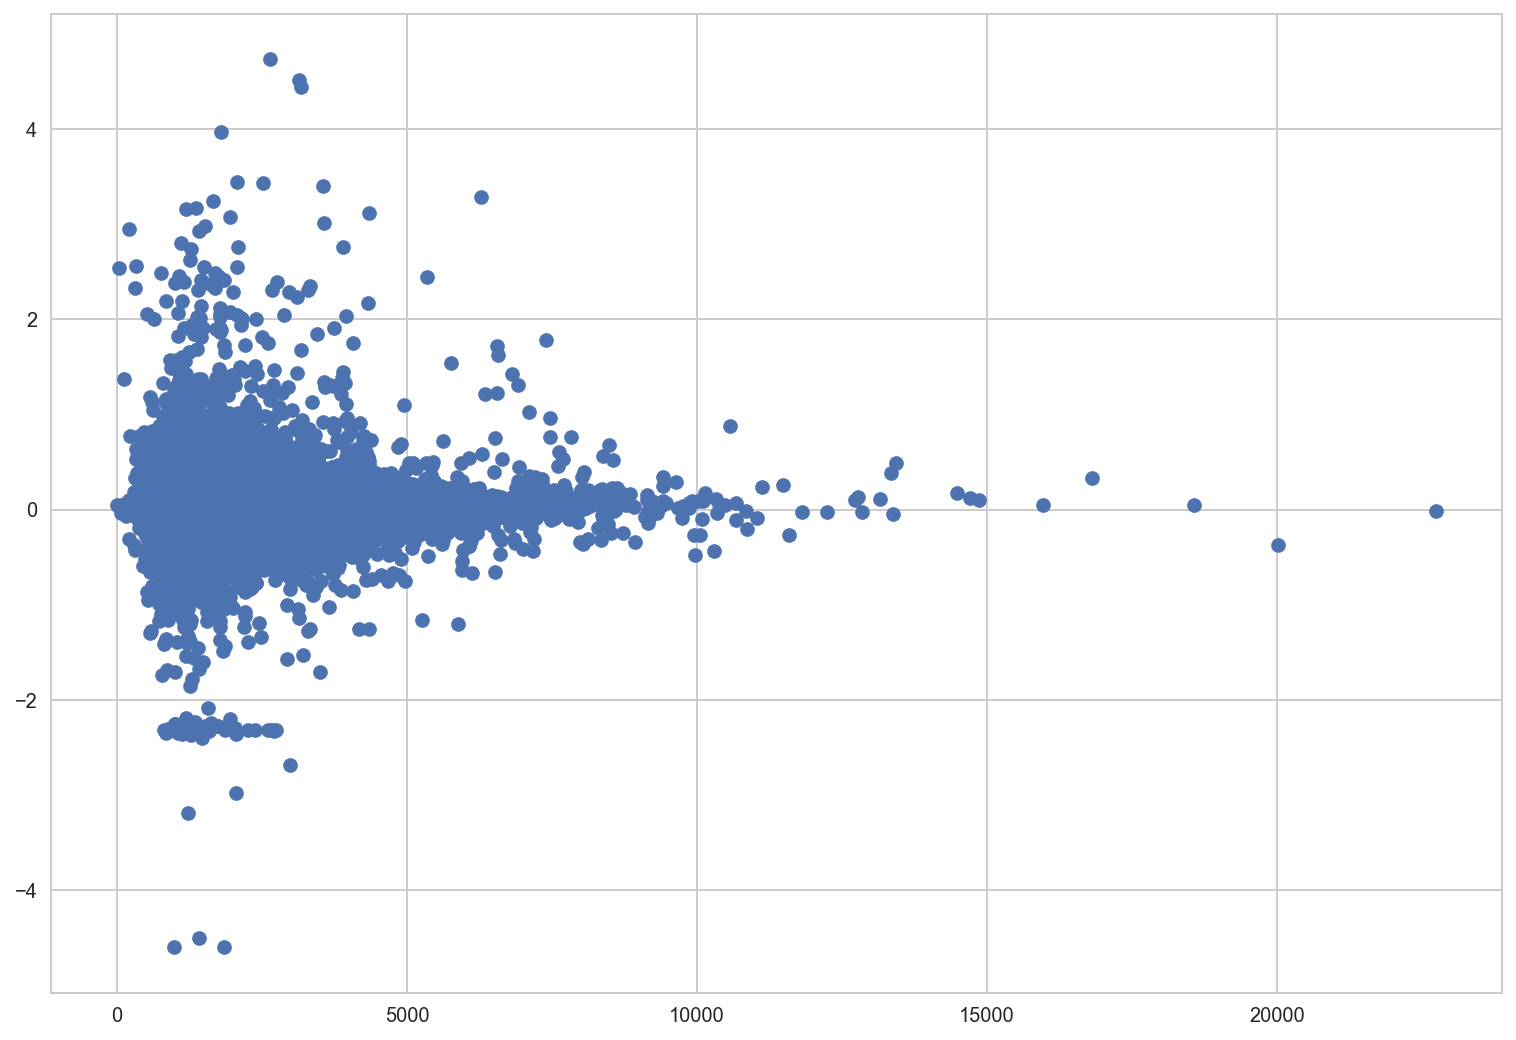

In [31]:
plt.scatter(df_16.calculatedfinishedsquarefeet.fillna(df_16.calculatedfinishedsquarefeet.mean()), df_16.logerror)

In [32]:
df_16.calculatedfinishedsquarefeet.fillna(df_16.calculatedfinishedsquarefeet.mean(), inplace=True)
properties_16.calculatedfinishedsquarefeet.fillna(df_16.calculatedfinishedsquarefeet.mean(), inplace=True)
numecols.append("calculatedfinishedsquarefeet")

#### finishedsquarefeet12

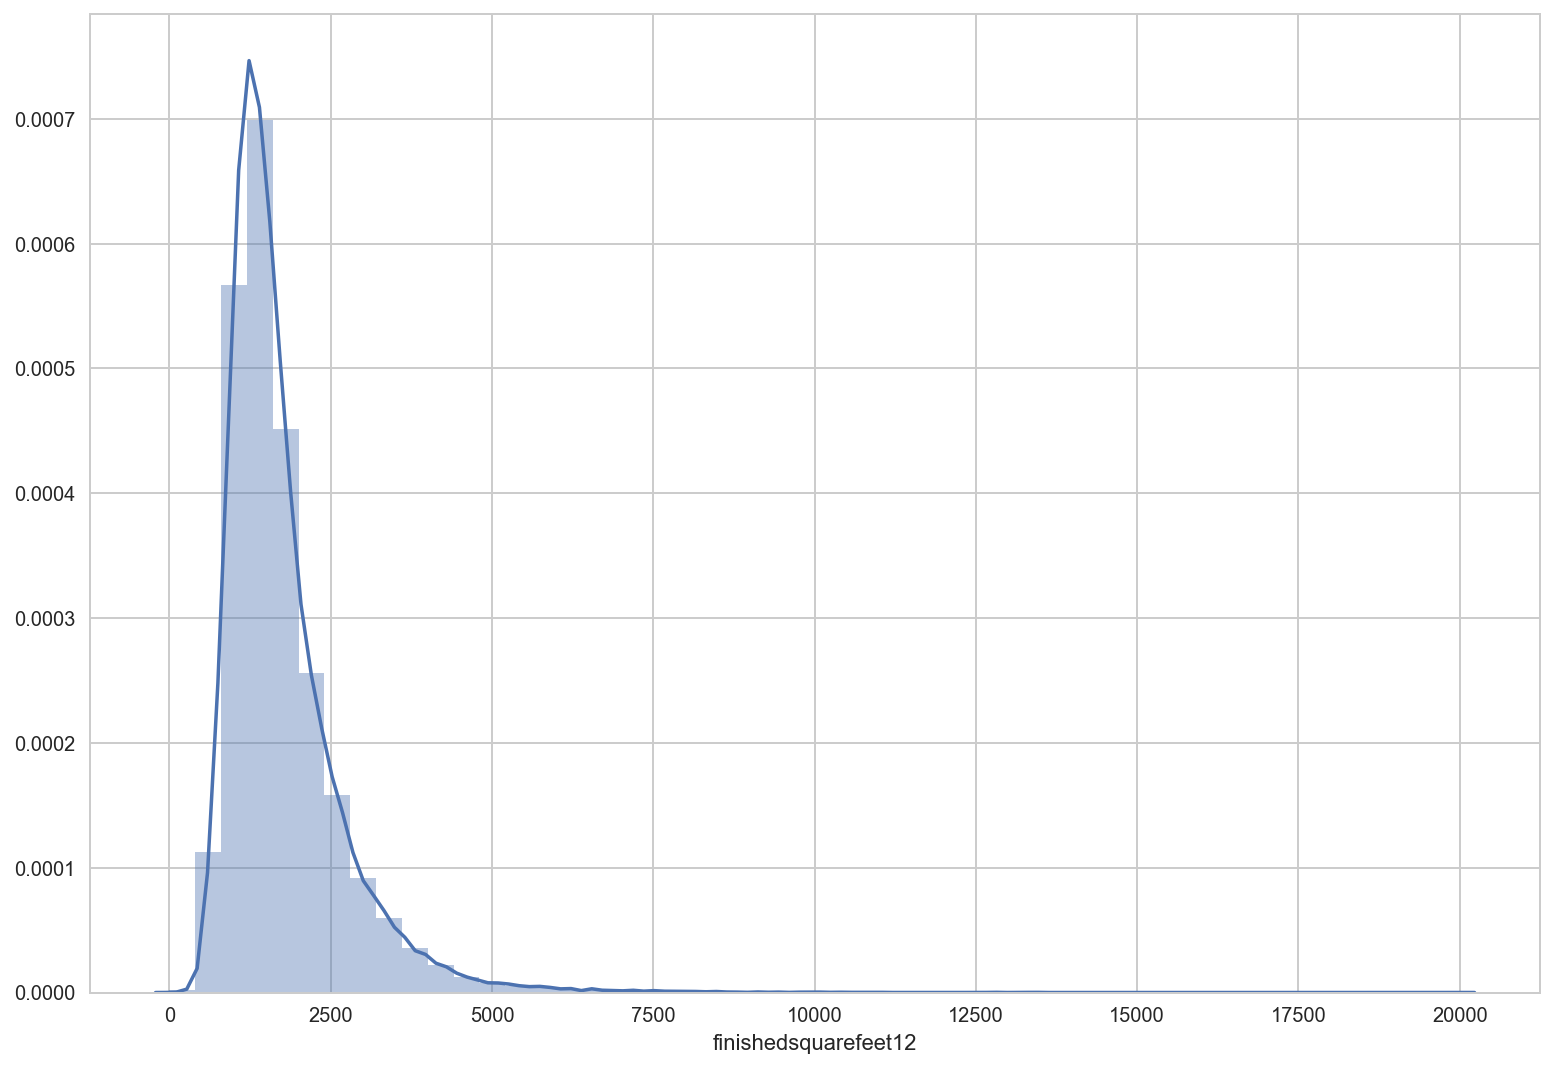

In [33]:
sns.distplot(df_16.finishedsquarefeet12.dropna())

In [34]:
df_16.finishedsquarefeet12.fillna(df_16.finishedsquarefeet12.mode().values[0], inplace=True)
properties_16.finishedsquarefeet12.fillna(df_16.finishedsquarefeet12.mode().values[0], inplace=True)
numecols.append("finishedsquarefeet12")

#### finishedsquarefeet13

In [35]:
print(data_dict["finishedsquarefeet13"])
df_16.finishedsquarefeet13.dropna()

,Perimeter living area


1812     1440.0
4031     1416.0
5401     1344.0
10868    1440.0
11769    1440.0
17204    1536.0
18547    1440.0
22534    1440.0
22540    1584.0
24285    1440.0
24753    1344.0
30643    1440.0
31093    1440.0
31535    1440.0
34253    1056.0
34710    1440.0
40539    1566.0
44634    1440.0
47414    1248.0
51825    1344.0
54078    1536.0
56304    1464.0
61666    1440.0
65283    1440.0
65284    1248.0
65725    1152.0
79341    1440.0
79826    1248.0
80271    1392.0
80731    1440.0
83498    1392.0
87525    1440.0
87987    1440.0
Name: finishedsquarefeet13, dtype: float64

In [36]:
sp.stats.pearsonr(df_16.finishedsquarefeet12.fillna(0), df_16.finishedsquarefeet13.fillna(0))
# no 선형 상관관계

(-0.011026702316800778, 0.0009226284255894527)

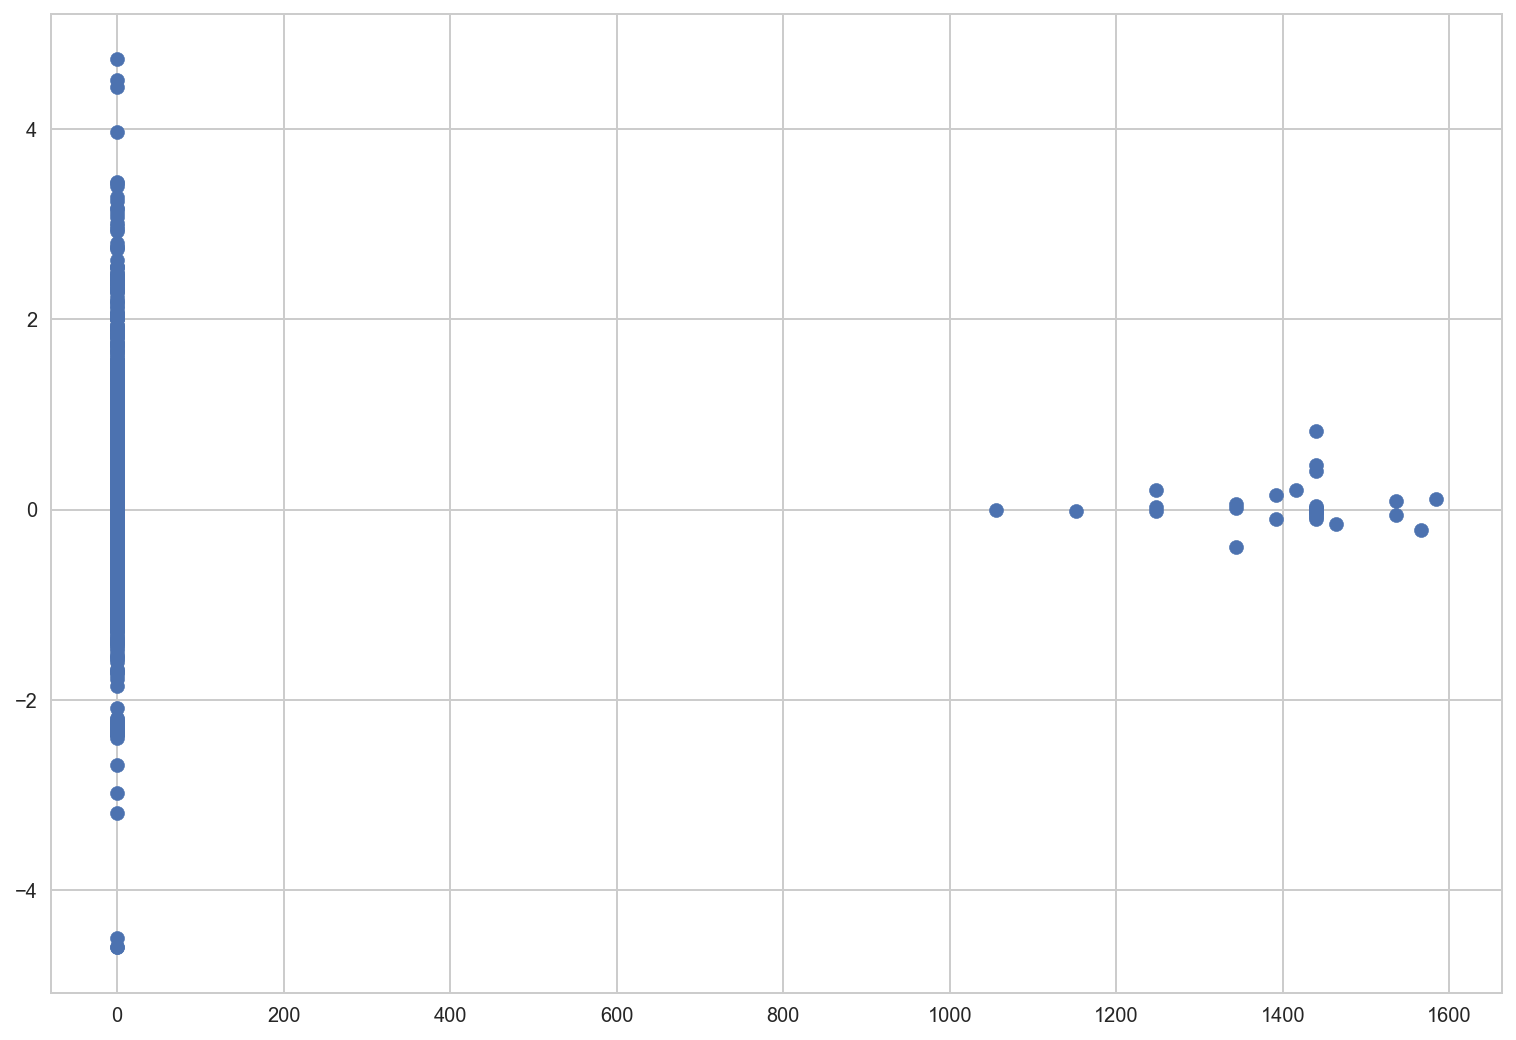

In [37]:
plt.scatter(df_16.finishedsquarefeet13.fillna(0), df_16.logerror)

In [38]:
# 평균 갑으로 채워두자 
df_16.finishedsquarefeet13.fillna(df_16.finishedsquarefeet13.mean(), inplace=True)
properties_16.finishedsquarefeet13.fillna(df_16.finishedsquarefeet13.mean(), inplace=True)
numecols.append("finishedsquarefeet13") ## will be scaled 

#### finishedsquarefeet15

,Total area


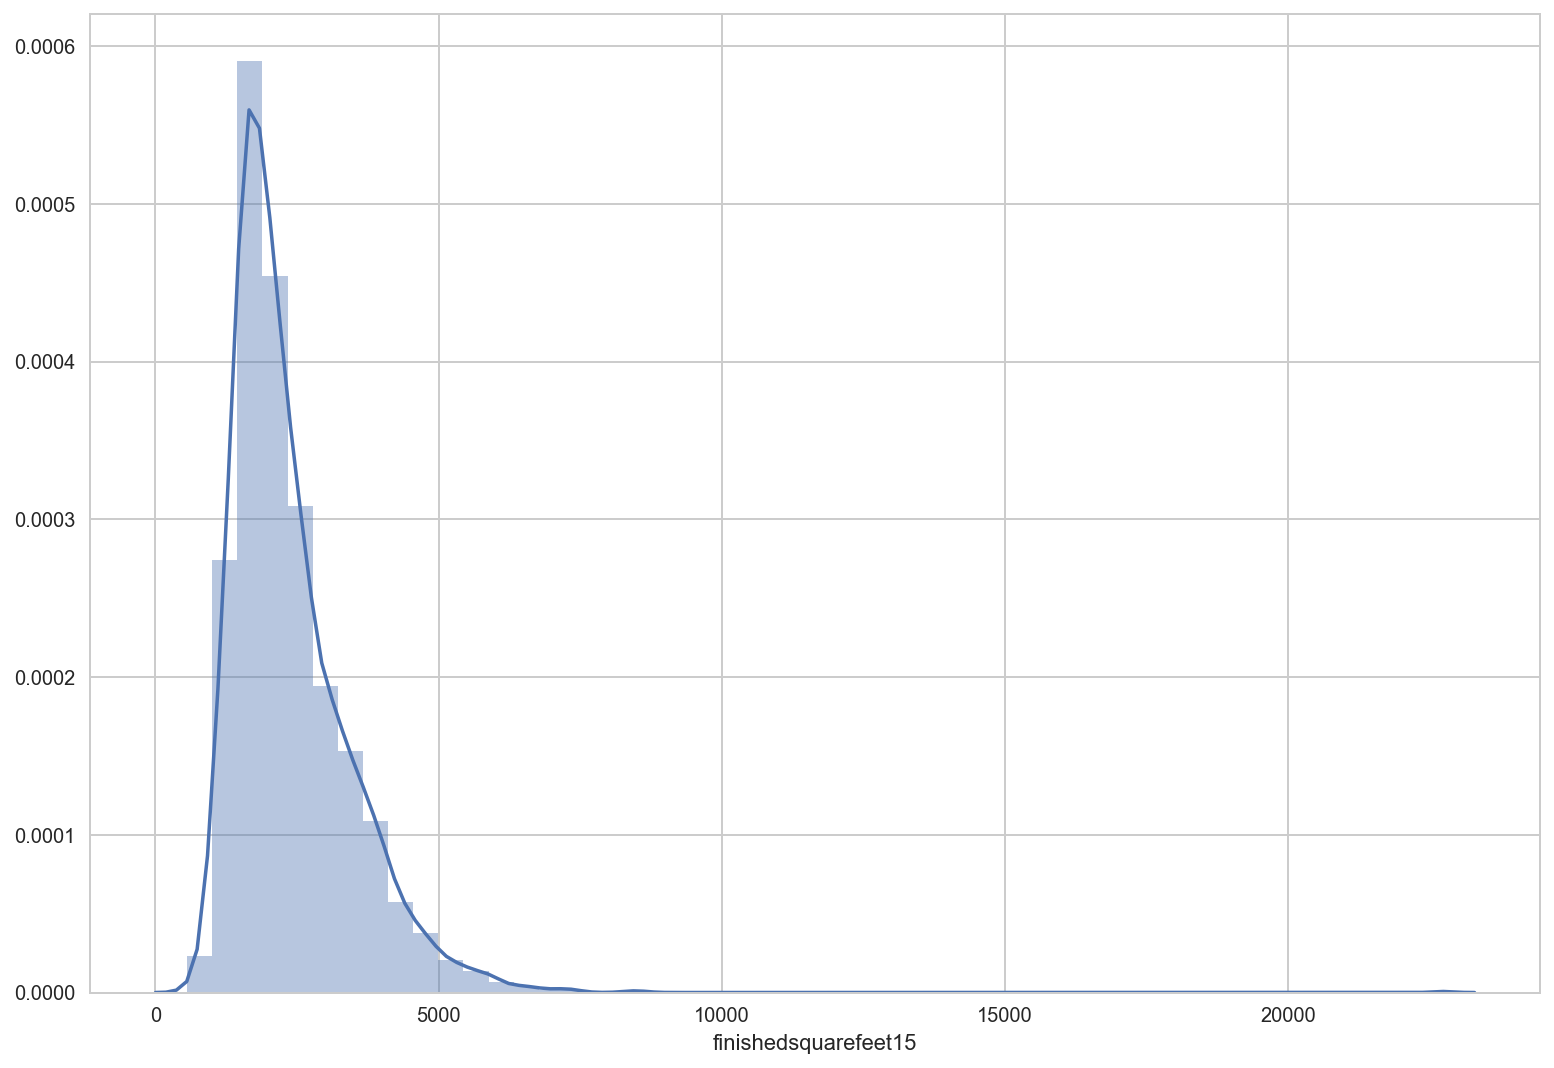

In [39]:
print(data_dict["finishedsquarefeet15"])
sns.distplot(df_16.finishedsquarefeet15.dropna())

In [40]:
df_16.finishedsquarefeet15.fillna(df_16.finishedsquarefeet15.mean(), inplace=True)
properties_16.finishedsquarefeet15.fillna(df_16.finishedsquarefeet15.mean(), inplace=True)
numecols.append("finishedsquarefeet15") ## will be scaled 

#### finishedsquarefeet50

,Size of the finished living area on the first (entry) floor of the home


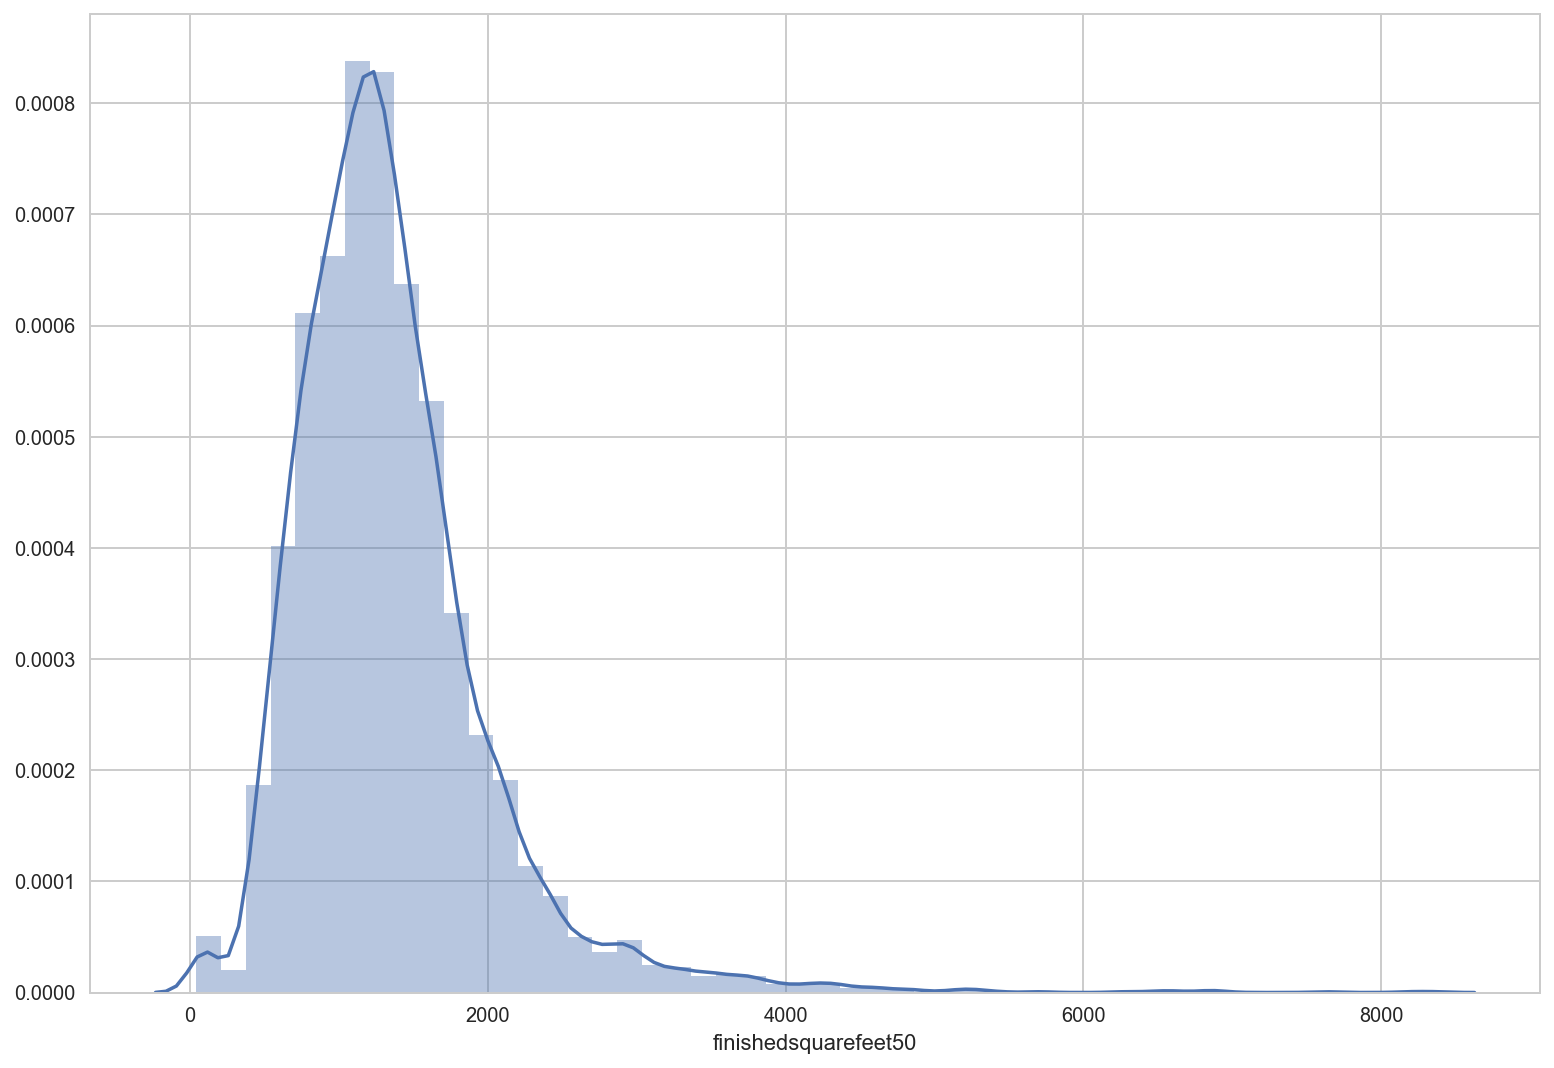

In [41]:
print(data_dict["finishedsquarefeet50"])
sns.distplot(df_16.finishedsquarefeet50.dropna())

In [42]:
df_16.finishedsquarefeet50.fillna(df_16.finishedsquarefeet50.mean(), inplace=True)
properties_16.finishedsquarefeet50.fillna(df_16.finishedsquarefeet50.mean(), inplace=True)
numecols.append("finishedsquarefeet50") ## will be scaled 

#### finishedsquarefeet6	

,Base unfinished and finished area


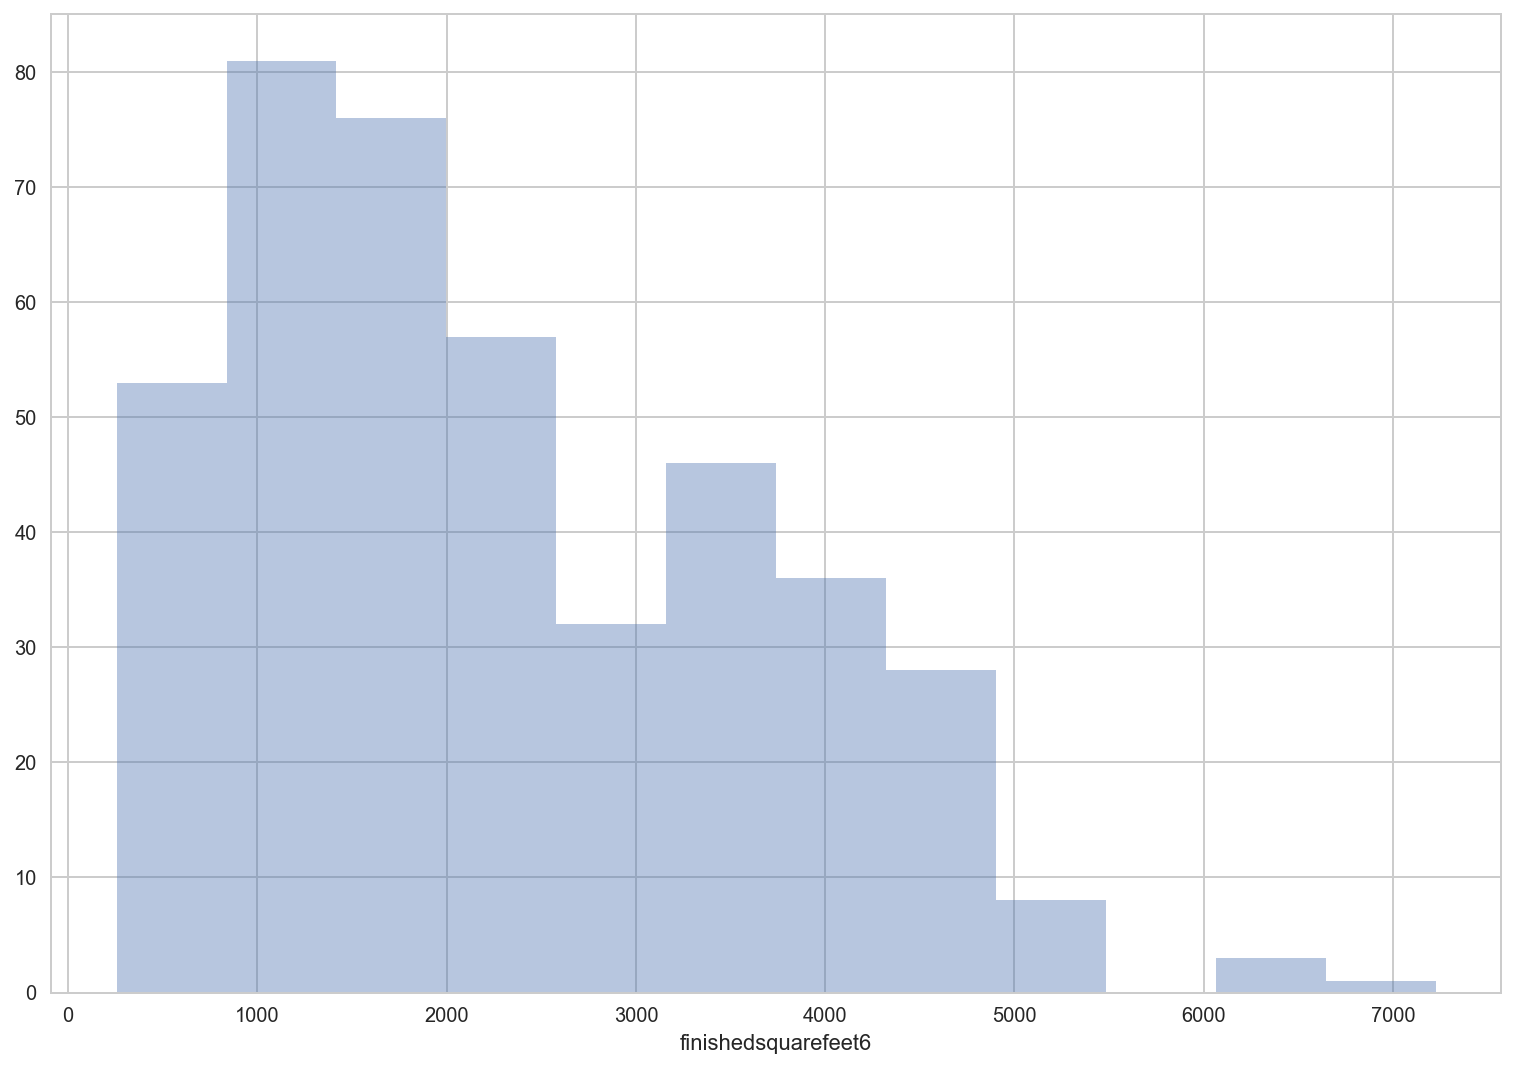

In [43]:
print(data_dict["finishedsquarefeet6"])
sns.distplot(df_16.finishedsquarefeet6.dropna(), kde=False)

In [44]:
df_16.finishedsquarefeet6.fillna(df_16.finishedsquarefeet6.mean(), inplace=True)
properties_16.finishedsquarefeet6.fillna(df_16.finishedsquarefeet6.mean(), inplace=True)
numecols.append("finishedsquarefeet6") ## will be scaled 

#### fips 

In [45]:
data_dict["fips"]

',Federal Information Processing Standard code - see https://en.wikipedia.org/wiki/FIPS_county_code for more details'

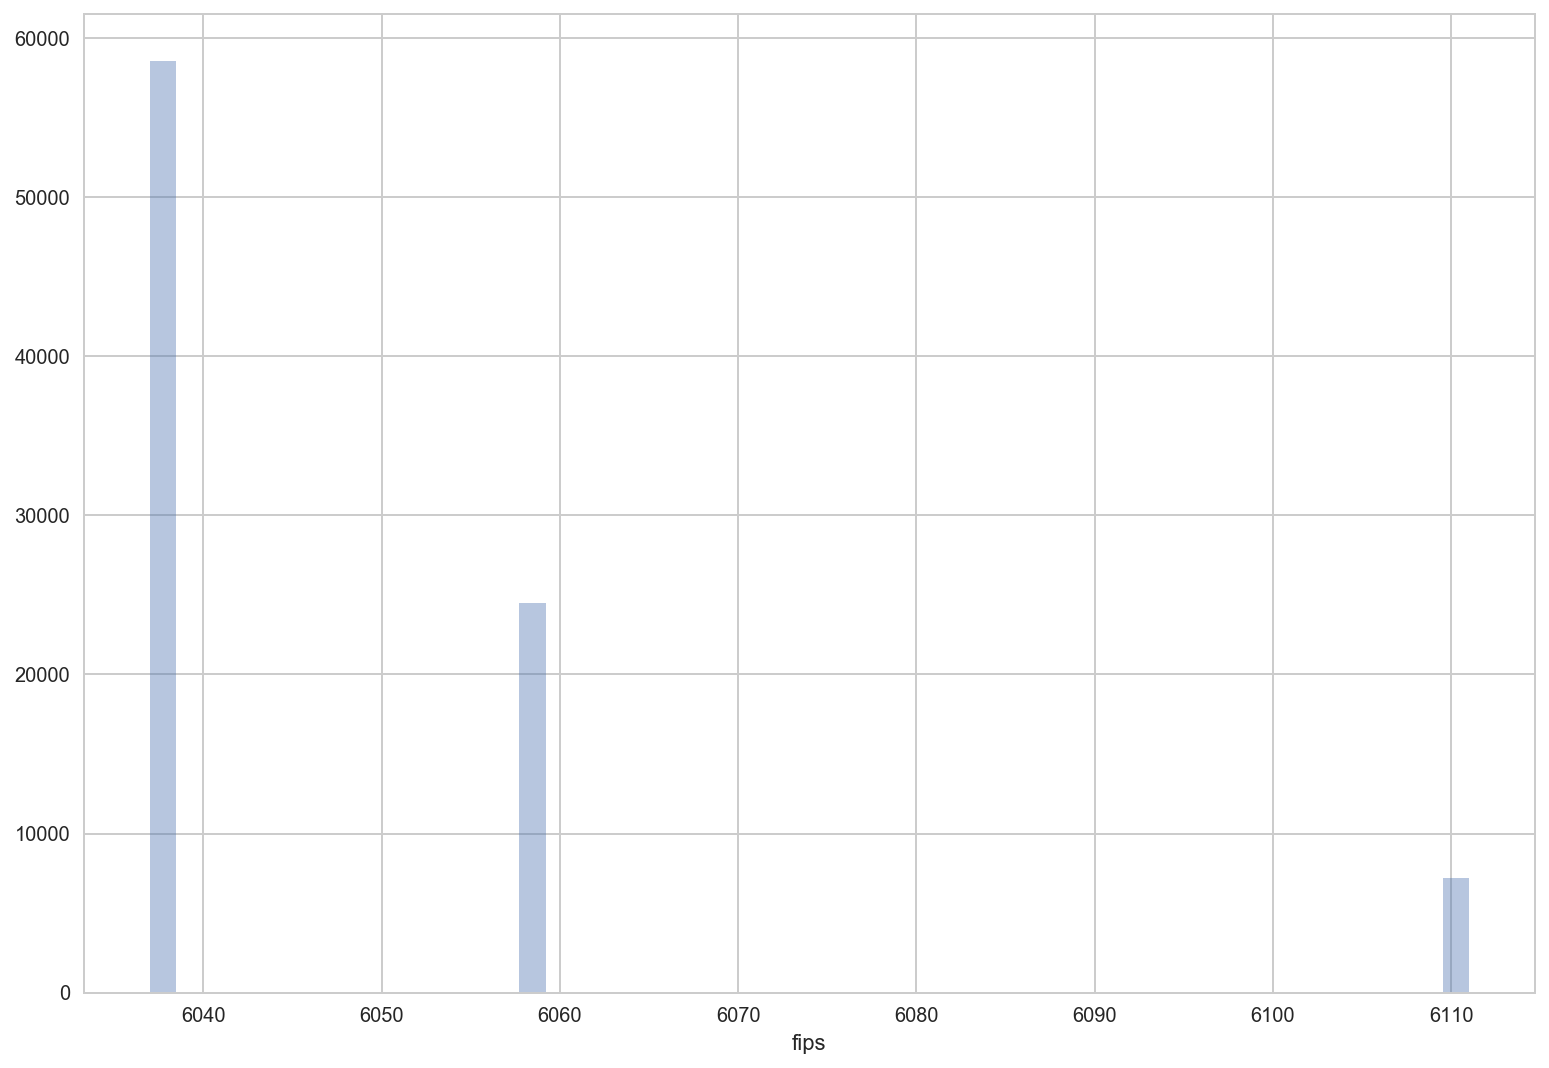

In [46]:
sns.distplot(df_16.fips, kde=False)
len(np.unique(df_16.fips))
# as category 
catecols.append("fips")

In [47]:
properties_16.fips.isnull().sum()

0

#### fireplacecnt

In [48]:
data_dict["fireplacecnt"]

',Number of fireplaces in a home (if any)'

In [49]:
print(np.unique(df_16.fireplacecnt.dropna()))
df_16.fireplacecnt.fillna(0, inplace=True)
# as integer
numecols.append('fireplacecnt')

[1. 2. 3. 4. 5.]


#### fullbathcnt

In [50]:
print(data_dict["fullbathcnt"])
print(np.unique(df_16.fullbathcnt.dropna()))
df_16.fullbathcnt.fillna(0, inplace=True)
properties_16.fullbathcnt.fillna(0, inplace=True)
numecols.append('fullbathcnt')

,Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 15. 20.]


#### garagecarcnt

,Total number of garages on the lot including an attached garage
(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 13.,
       14., 24.]), array([  290,  6679, 21942,   663,   262,    54,    16,    11,     7,
           6,     2,     2,     1,     1,     1]))


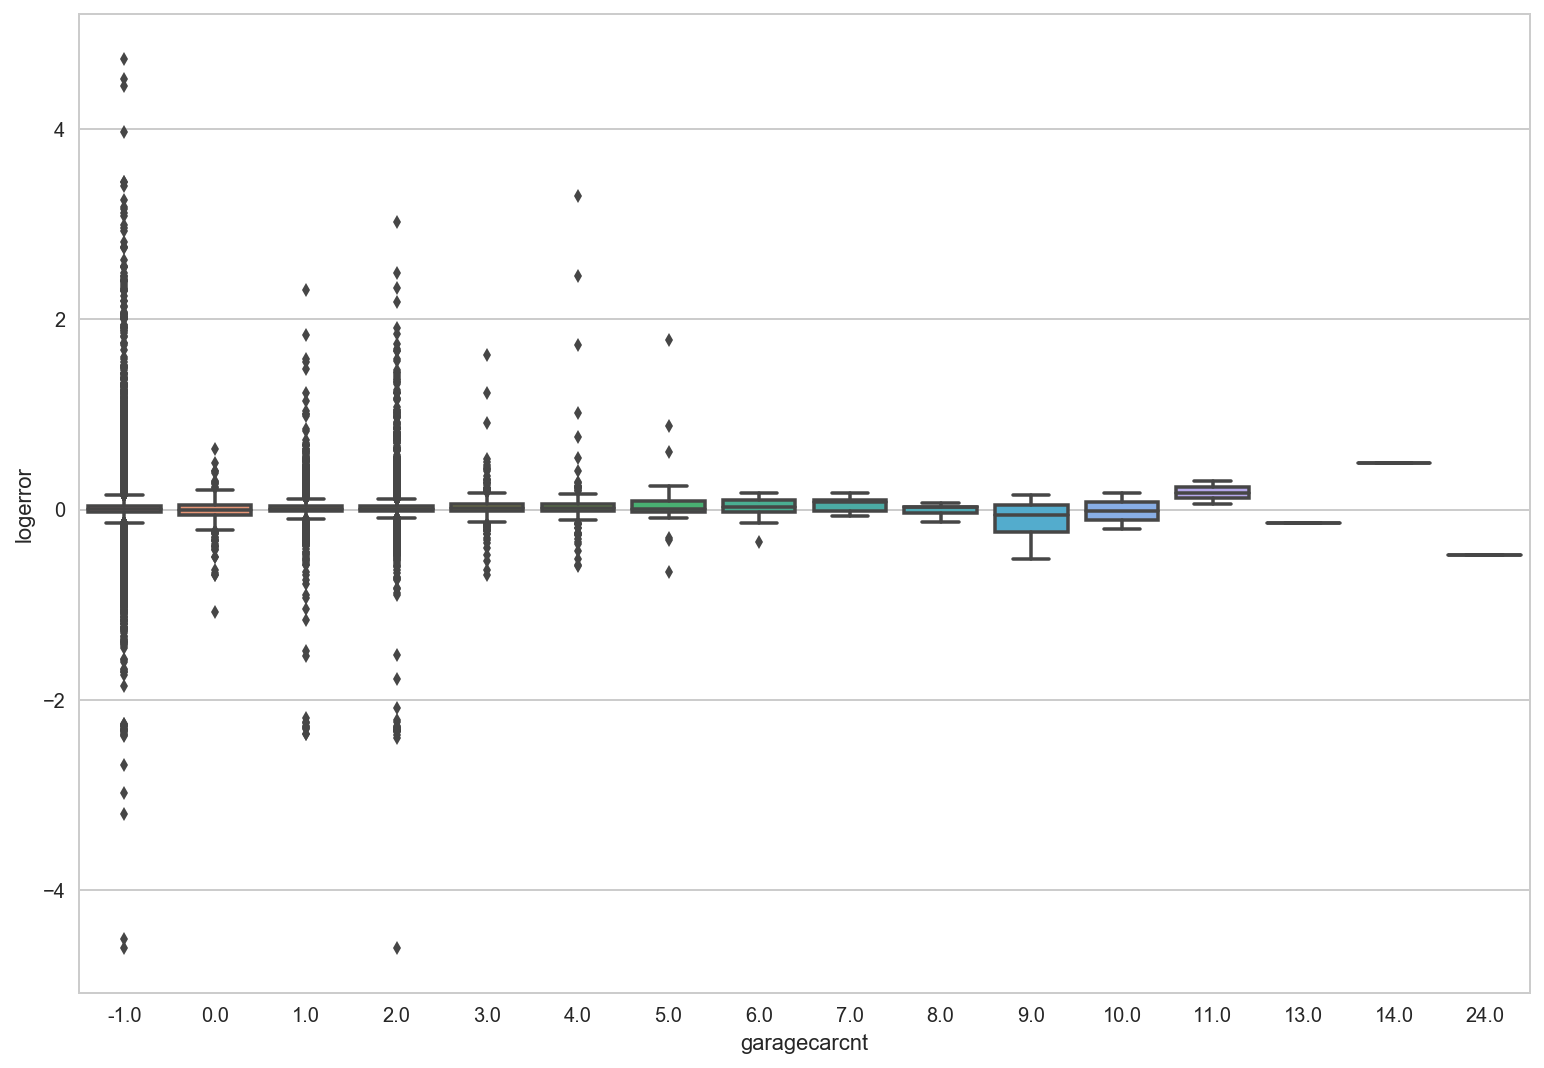

In [51]:
print(data_dict["garagecarcnt"])
print(np.unique(df_16.garagecarcnt.dropna(), return_counts=True))
sns.boxplot(df_16.garagecarcnt.fillna(-1), df_16.logerror)
### 이건 missing value를 0으로 채울 수 없어서 바로 categorical로 만들기로 했다. 
##  데이터 개수를 기준으로 2 이하는 -> 0, 2 초과 는 -> 1 (nan값은 0으로 imputation)

df_16.garagecarcnt = np.array([0 if x <= 2 else 1 for x in df_16.garagecarcnt.fillna(-1)])
properties_16.garagecarcnt = np.array([0 if x <= 2 else 1 for x in properties_16.garagecarcnt.fillna(-1)])
catecols.append("garagecarcnt")

#### garagetotalsqft

,Total number of square feet of all garages on lot including an attached garage


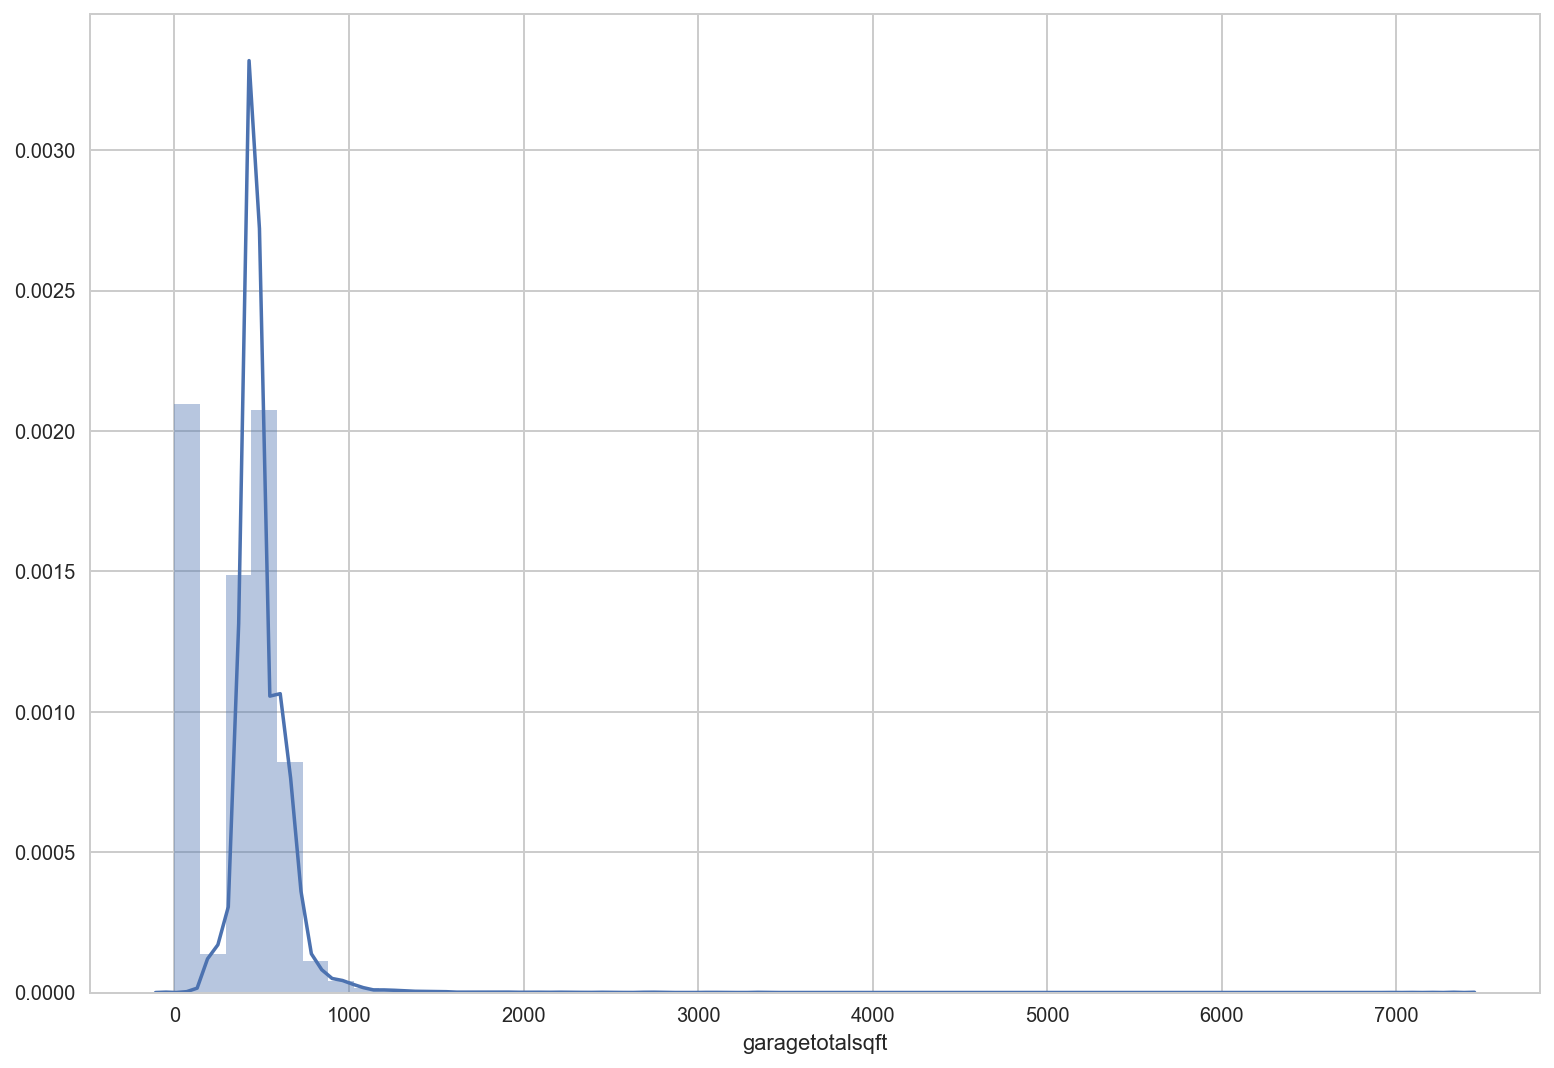

In [52]:
print(data_dict["garagetotalsqft"])
sns.distplot(df_16.garagetotalsqft.dropna())

## mean으로 impuatation 
df_16.garagetotalsqft.fillna(df_16.garagetotalsqft.mean(), inplace=True)
properties_16.garagetotalsqft.fillna(df_16.garagetotalsqft.mean(), inplace=True)
# numerical 
numecols.append("garagetotalsqft") # will be scaled 

#### heatingorsystemtypeid

In [53]:
# categorical
np.unique(df_16.heatingorsystemtypeid.dropna())

df_16.heatingorsystemtypeid.fillna(0, inplace=True)
properties_16.heatingorsystemtypeid.fillna(0, inplace=True)

catecols.append("heatingorsystemtypeid")

#### latitude & longitude   -> 처리 보류! 

,Latitude of the middle of the parcel multiplied by 10e6


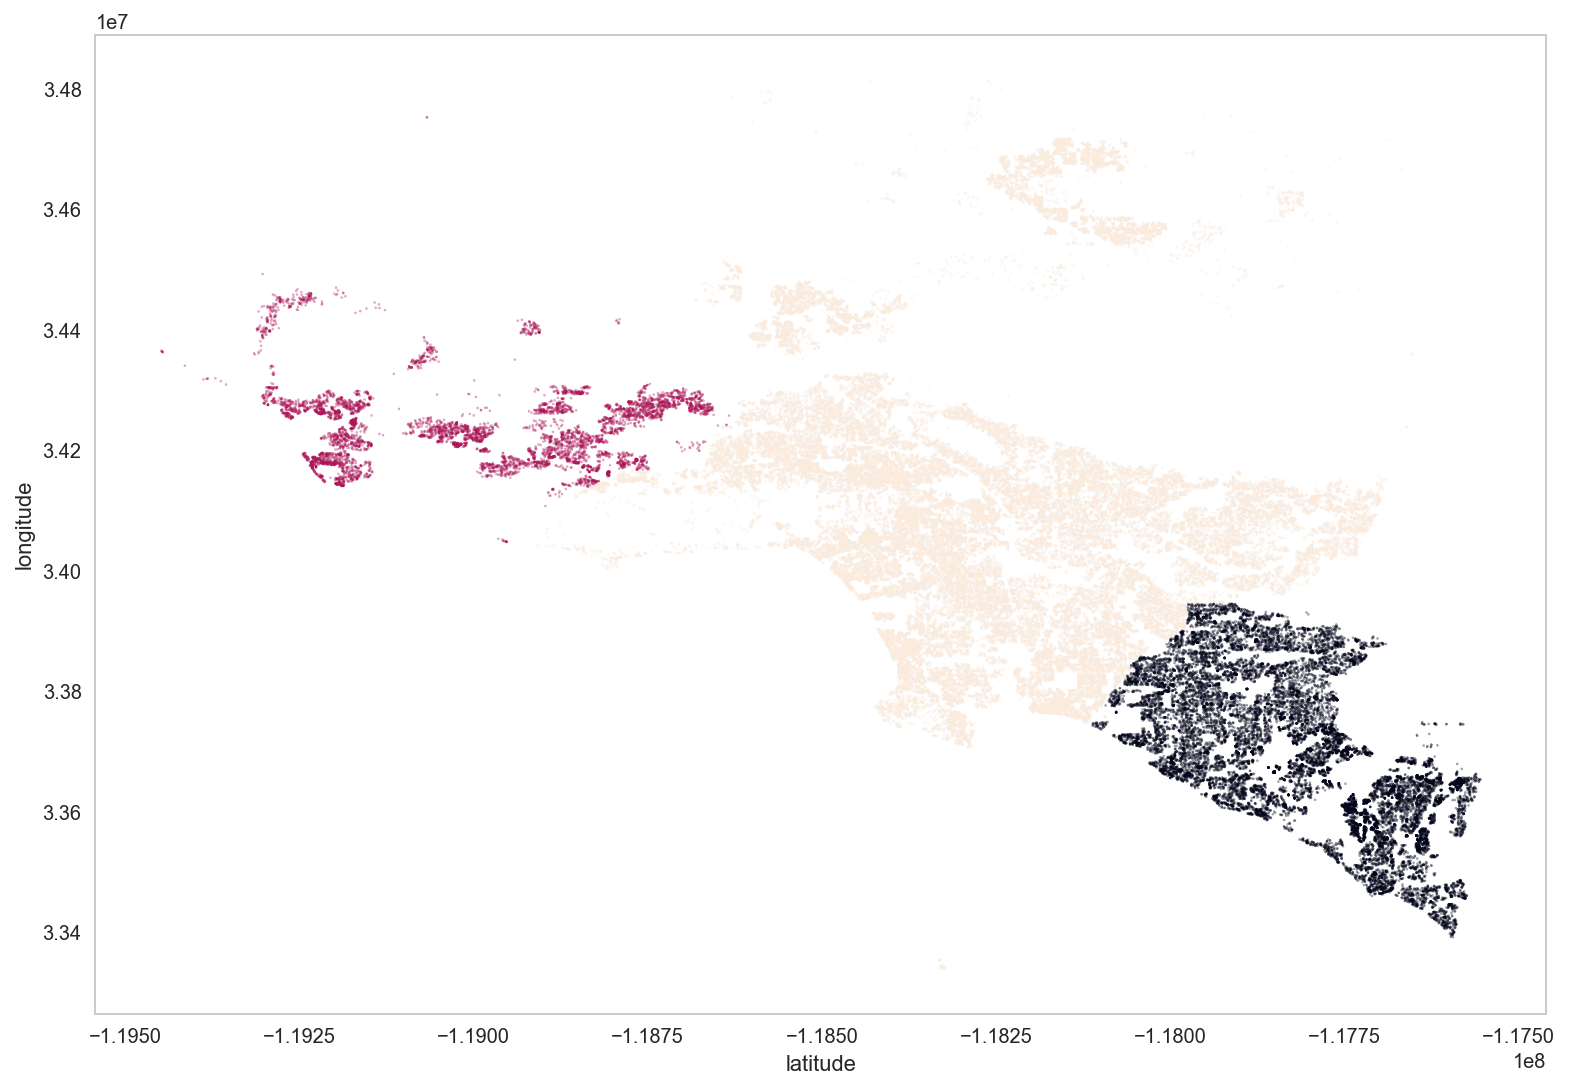

In [54]:
# 위도 경도를 그대로 쓸 수 는 없다. 
print(data_dict["latitude"])
plt.scatter(df_16.longitude, df_16.latitude, c =df_16.regionidcounty, alpha=0.3, s=1)
plt.grid(False)
sns.set_style("white")
plt.xlabel('latitude')
plt.ylabel("longitude")
plt.show()

In [55]:
# np.array([df_16.latitude.loc[7], df_16.longitude.loc[7]]) * 10e-7

In [56]:
# np.array([df_16.latitude.loc[100], df_16.longitude.loc[100]]) * 10e-7

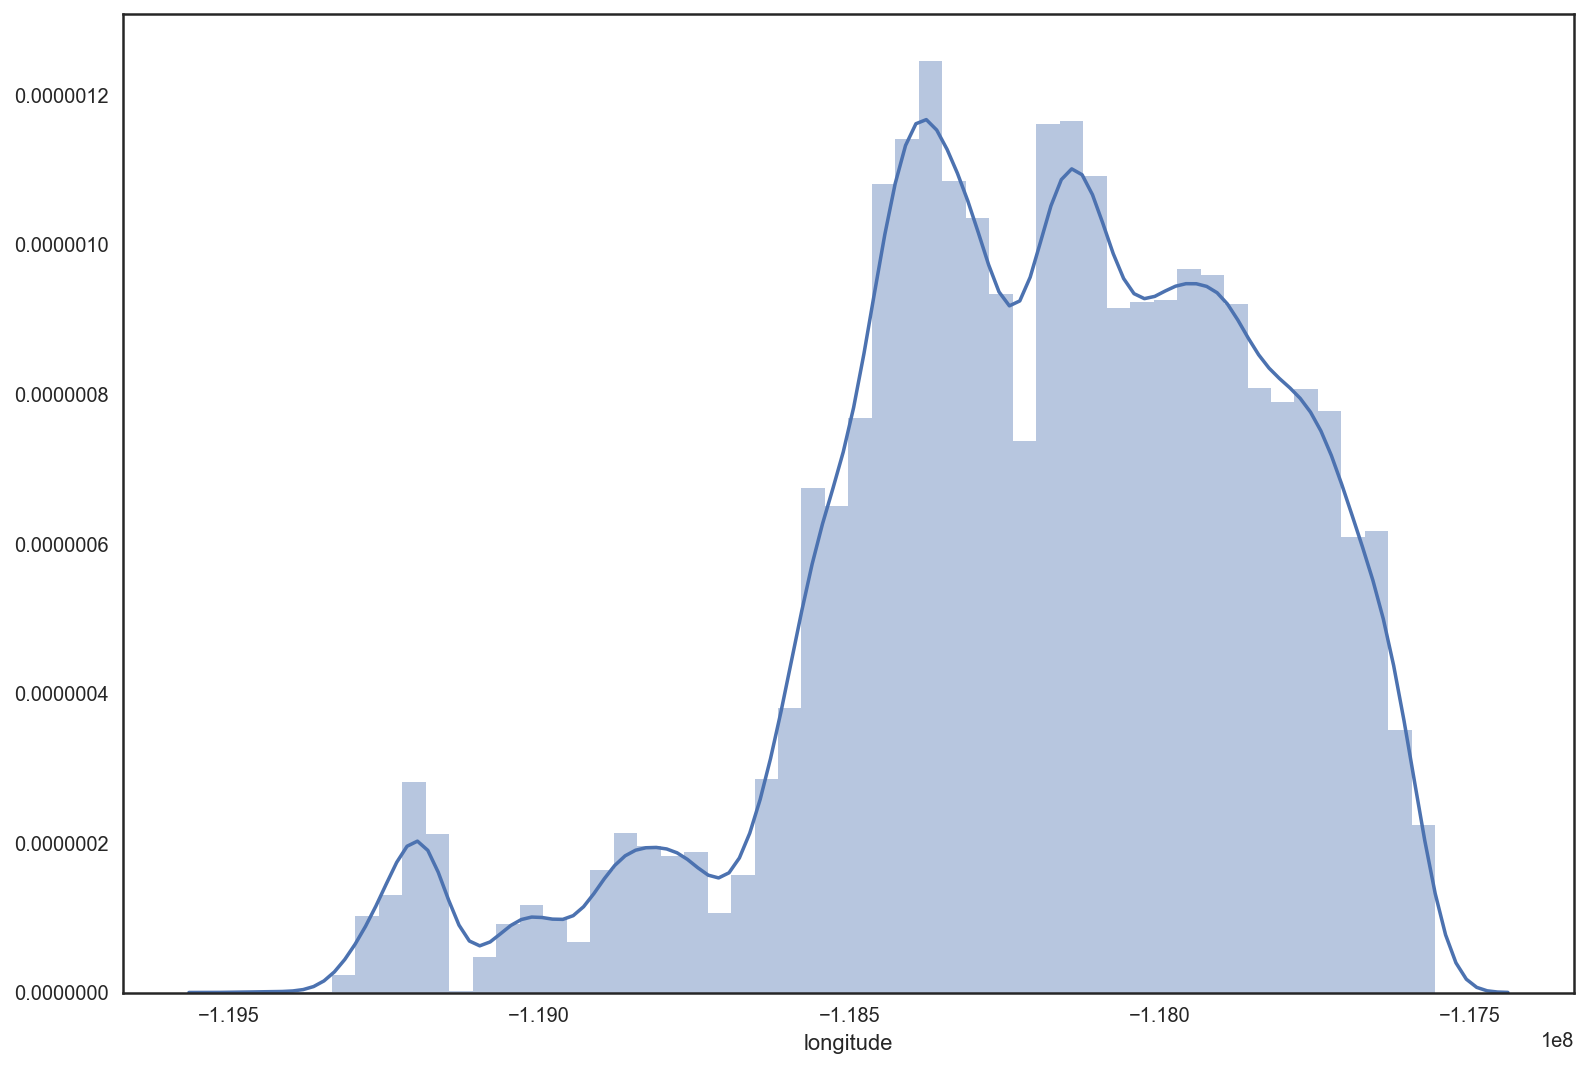

In [57]:
sns.distplot(df_16.longitude)

#### lotsizesquarefeet	

,Area of the lot in square feet
6971010.0 167.0


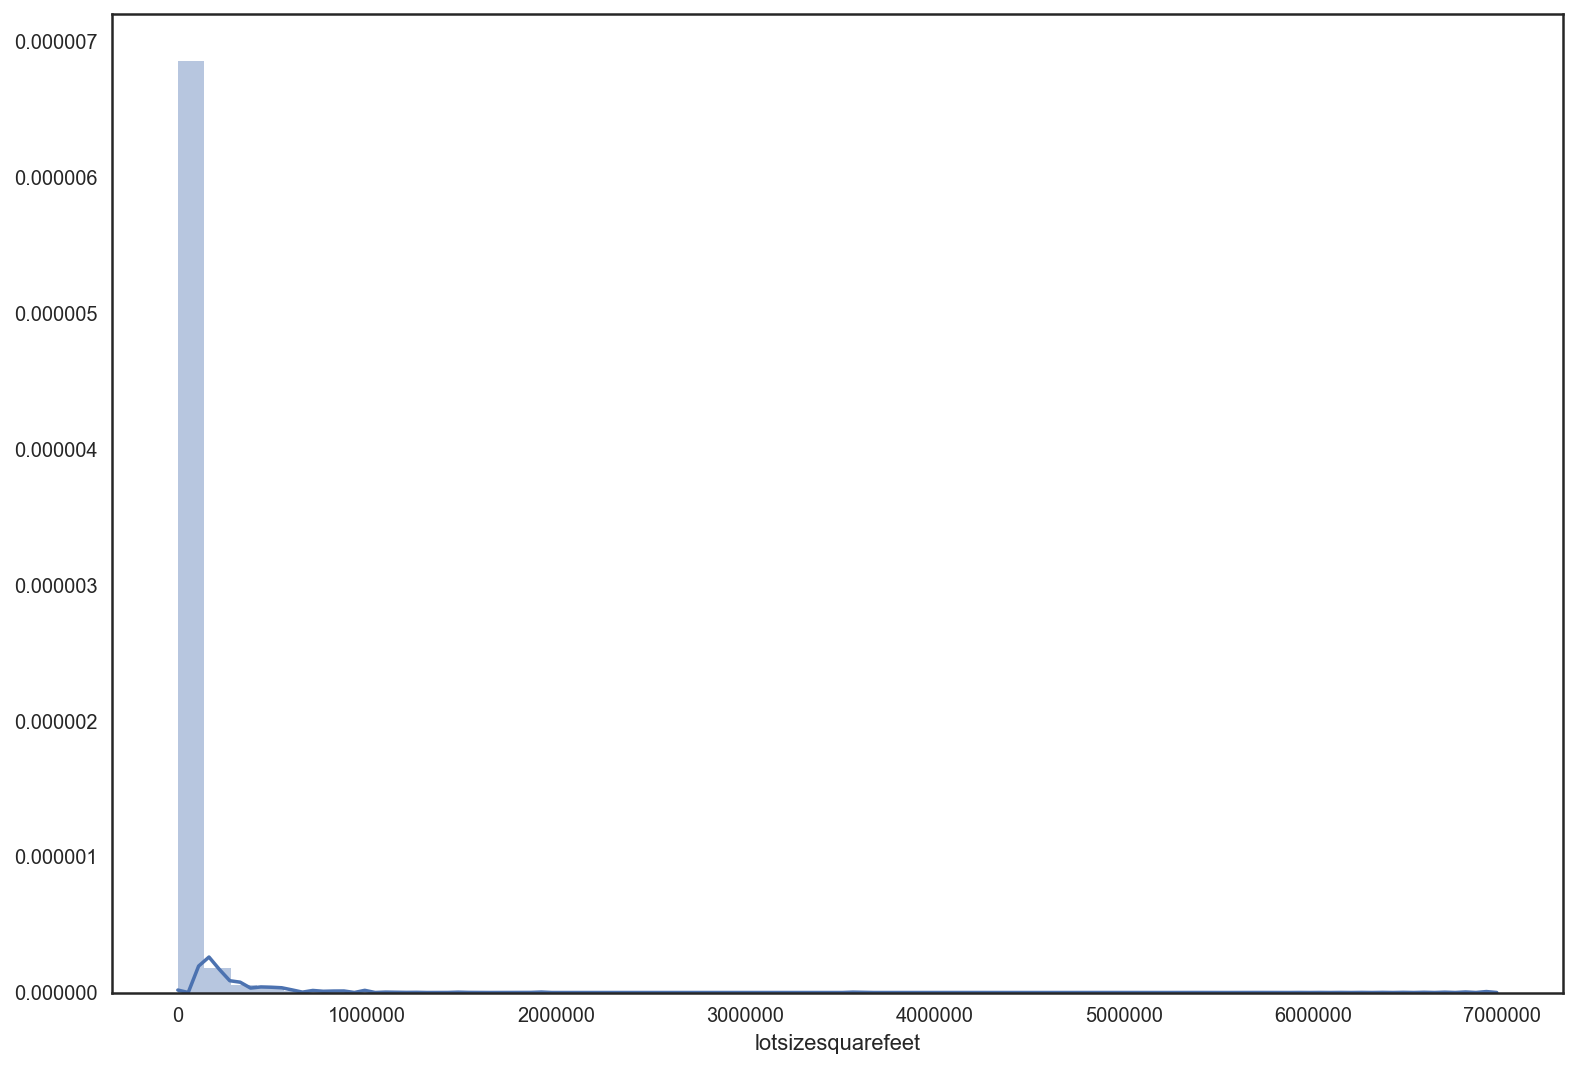

In [58]:
print(data_dict["lotsizesquarefeet"])
sns.distplot(df_16.lotsizesquarefeet.dropna())
print(df_16.lotsizesquarefeet.max(),df_16.lotsizesquarefeet.min())  ## min max 차이가 크다.  
#df_16.lotsizesquarefeet.mode()이값으로 imputation 

df_16.lotsizesquarefeet.fillna(df_16.lotsizesquarefeet.mode().values[0], inplace=True)
properties_16.lotsizesquarefeet.fillna(df_16.lotsizesquarefeet.mode().values[0], inplace=True)
numecols.append("lotsizesquarefeet")

#### poolcnt

In [59]:
data_dict["poolcnt"]

',Number of pools on the lot (if any)'

In [60]:
# np.unique(df_16.poolcnt.dropna())

# -> poolcnt 0, 1
df_16.poolcnt.fillna(0, inplace=True)
properties_16.poolcnt.fillna(0, inplace=True)
numecols.append("poolcnt")

#### poolsizesum

In [61]:
print(data_dict["poolsizesum"])
len(df_16.poolsizesum.dropna())

,Total square footage of all pools on property


969

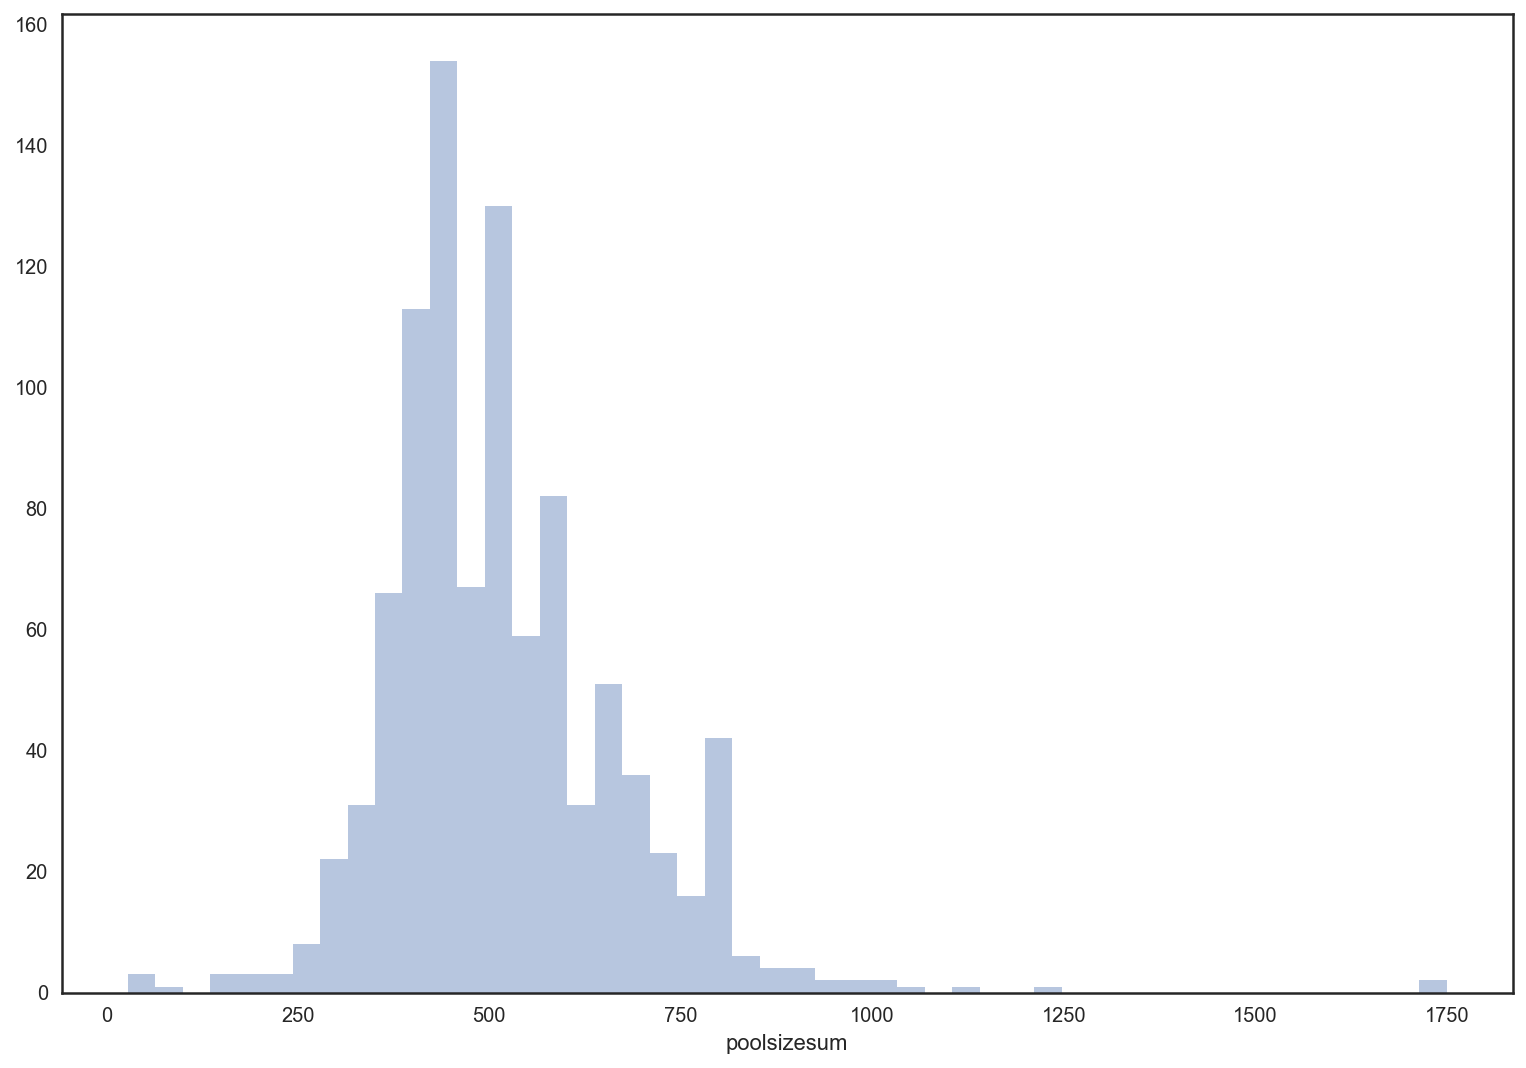

In [62]:
sns.distplot(df_16.poolsizesum.dropna(), kde=False) ## -> 평균 값의 interger로 imputation 

In [63]:
df_16.poolsizesum.fillna(int(df_16.poolsizesum.mean()), inplace=True)
properties_16.poolsizesum.fillna(int(df_16.poolsizesum.mean()), inplace=True)
numecols.append("poolsizesum")

#### pooltypeid10

In [64]:
df_16.pooltypeid10.isnull().sum()

89114

In [65]:
np.unique(df_16.pooltypeid10.dropna())

array([1.])

In [66]:
df_16.pooltypeid10.fillna(0, inplace=True)
properties_16.pooltypeid10.fillna(0, inplace=True)
bincols.append("pooltypeid10")

#### pooltypeid2	

In [67]:
print(np.unique(df_16.pooltypeid2.dropna()))
bincols.append("pooltypeid2")
df_16.pooltypeid2.fillna(0, inplace=True)
properties_16.pooltypeid2.fillna(0, inplace=True)

[1.]


#### pooltypeid7

In [68]:
print(np.unique(df_16.pooltypeid7.dropna()))
bincols.append("pooltypeid7")
df_16.pooltypeid7.fillna(0, inplace=True)
properties_16.pooltypeid7.fillna(0, inplace=True)

[1.]


#### propertylandusetypeid

In [69]:
print(data_dict["propertylandusetypeid"])
print(len(np.unique(df_16.propertylandusetypeid)))
print(df_16.propertylandusetypeid.isnull().sum())
print(properties_16.propertylandusetypeid.isnull().sum())
catecols.append("propertylandusetypeid")

,Type of land use the property is zoned for
14
0
0


#### rawcensustractandblock

In [70]:
print(data_dict['rawcensustractandblock'])
df_16.rawcensustractandblock #<- will be scaled definitely 
print(properties_16.rawcensustractandblock.isnull().sum())
numecols.append('rawcensustractandblock')

,Census tract and block ID combined - also contains blockgroup assignment by extension
0


#### regionidcity

In [71]:
print(data_dict["regionidcity"])
print(len(np.unique(df_16.regionidcity.dropna())))
# df_16.regionidcity.fillna(0, inplace=True)
# properties_16.regionidcity.fillna(0, inplace=True)

,City in which the property is located (if any)
177


#### regionidcounty

In [72]:
len(np.unique(df_16.regionidcounty))


3

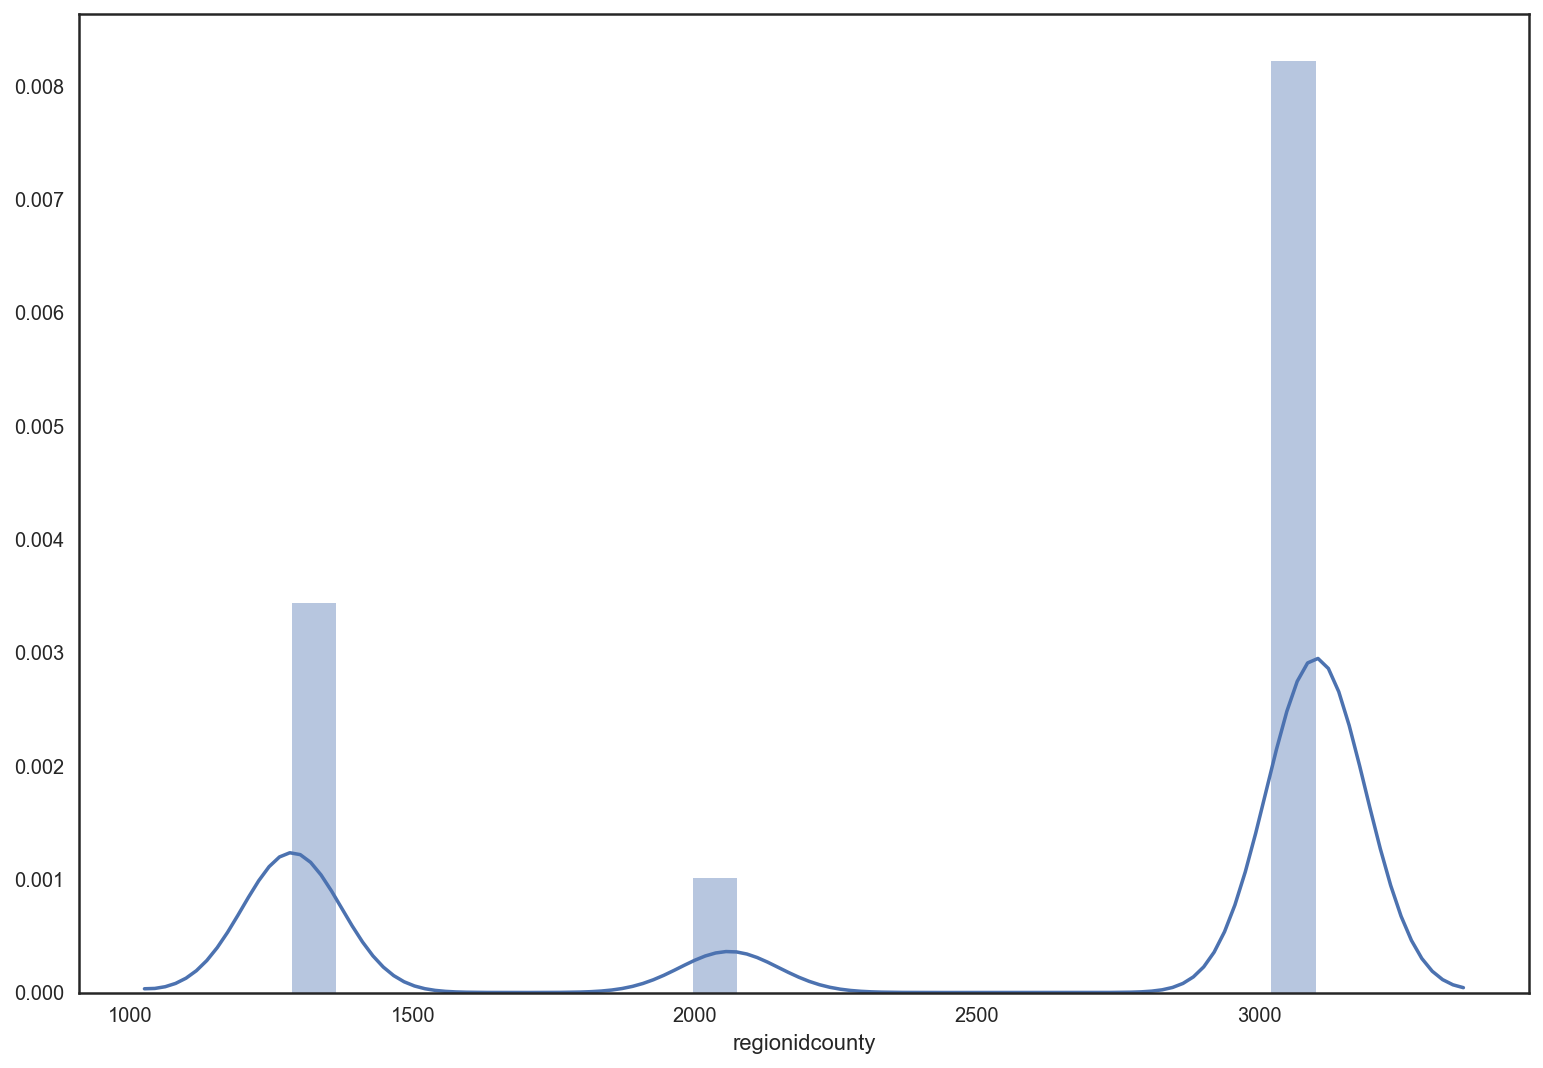

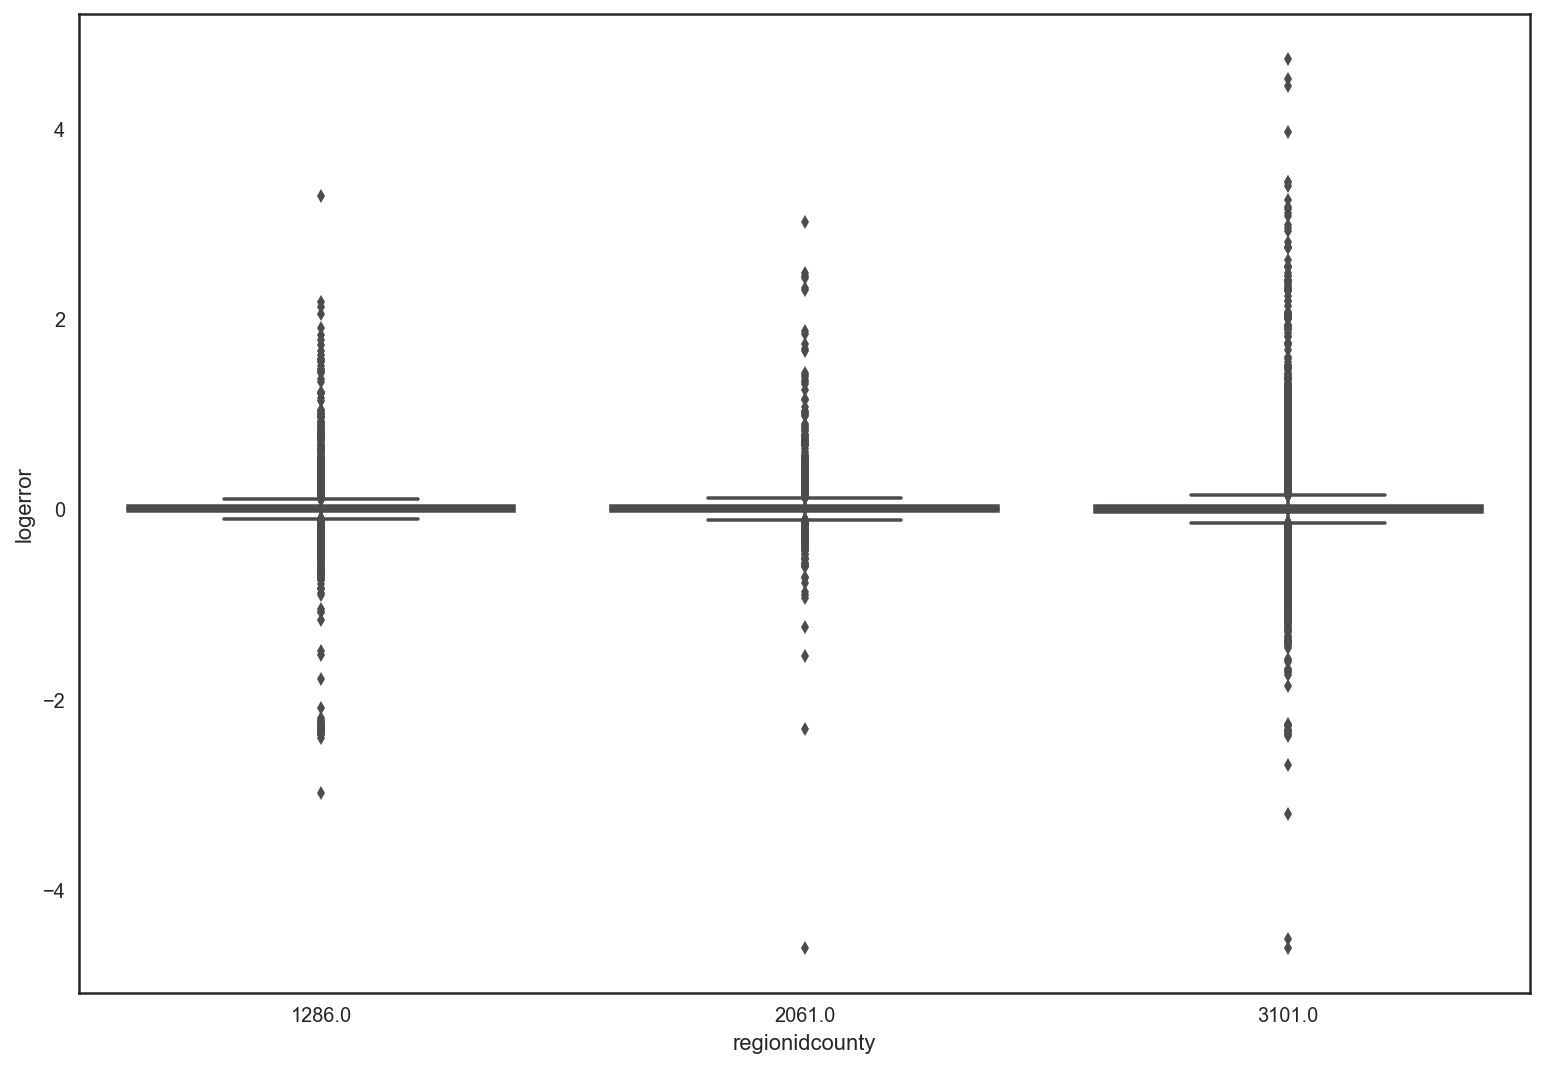

In [73]:
plt.figure()
sns.distplot(df_16.regionidcounty)
plt.figure()

sns.boxplot(df_16.regionidcounty, df_16.logerror)

In [74]:
data_dict["regionidcounty"]

',County in which the property is located'

#### regionidneighborhood

In [75]:
print(data_dict['regionidneighborhood'])
len(np.unique(df_16.regionidneighborhood.dropna()))

,Neighborhood in which the property is located


494

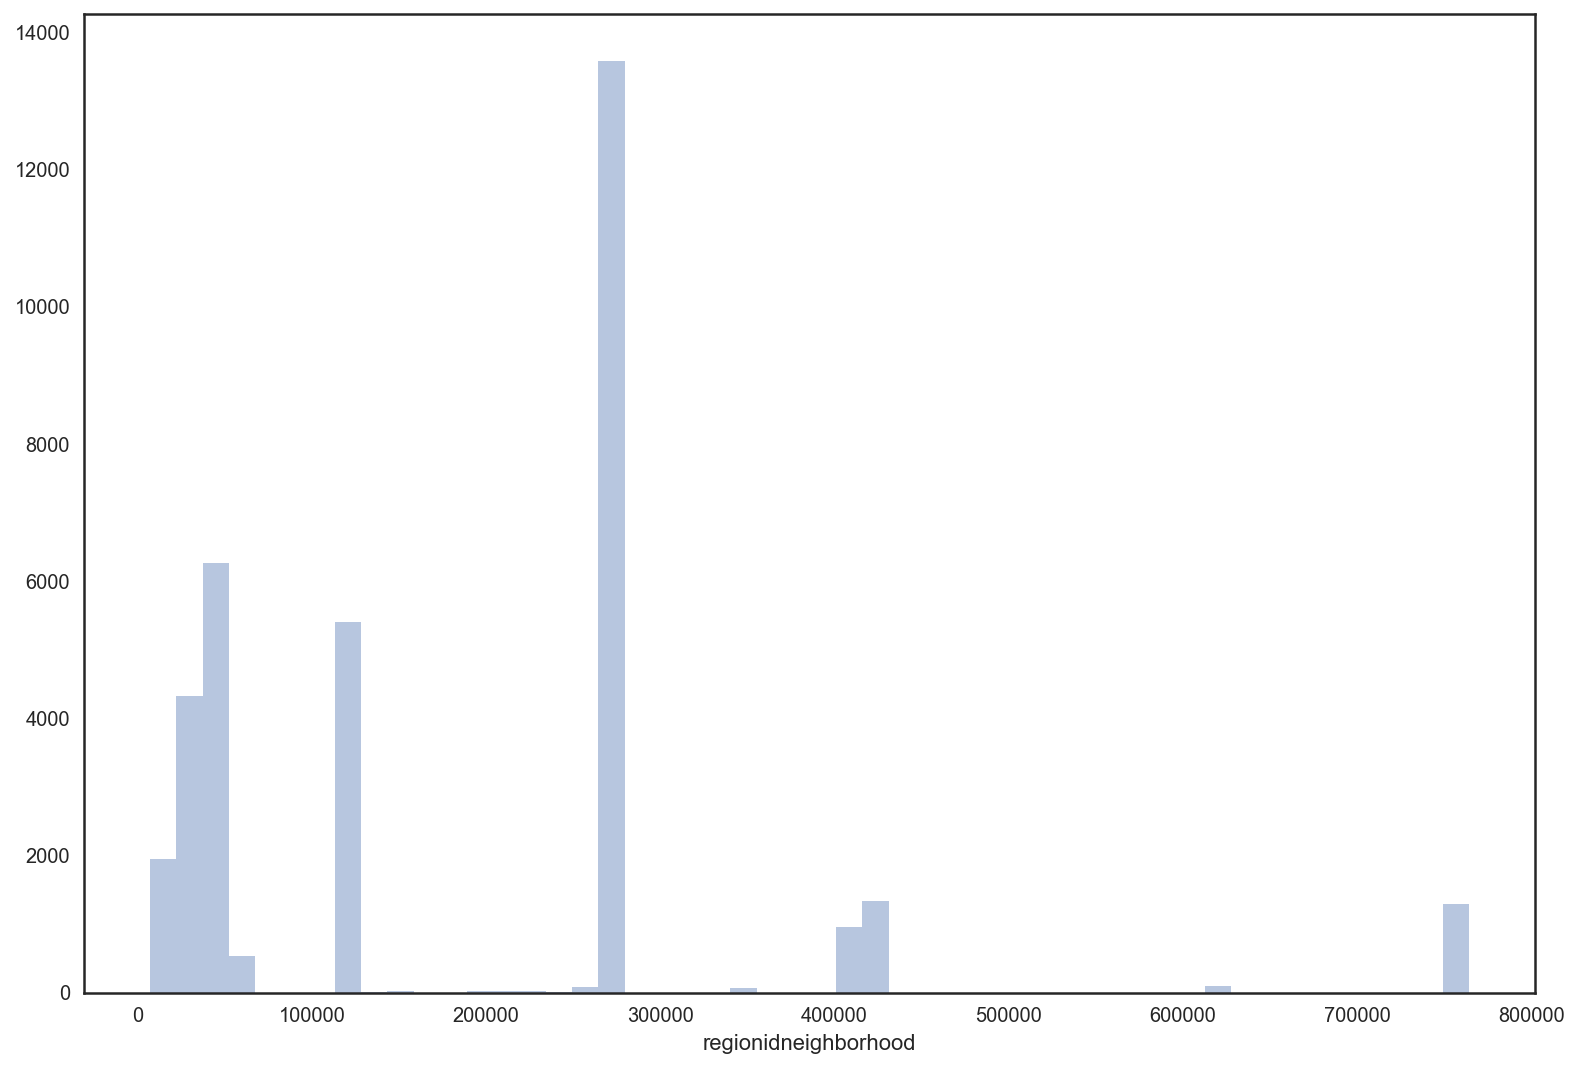

In [76]:
sns.distplot(df_16.regionidneighborhood.dropna(), kde=False)

#### regionidzip

- regioincity, regionidcounty, regionidneighborhood, regionidzip 과 latitude, longitude -> 위치 정보 

- 이 중 logerror를 예측하는데 도움이 되는 것이 있는것인가 ?

> latitude와 logitude는 위치의 숫자 데이터 다른 것들로 대체 하면되겠다. 


In [77]:
del df_16['latitude']
del df_16["longitude"]
del properties_16['latitude']
del properties_16["longitude"]

In [78]:
len(np.unique(df_16.regionidzip.dropna()))

388

In [79]:
df_16.regionidcity.fillna(0, inplace=True)
df_16.regionidcounty.fillna(0, inplace=True)
df_16.regionidneighborhood.fillna(0, inplace=True)
df_16.regionidzip.fillna(0, inplace=True)
properties_16.regionidcity.fillna(0, inplace=True)
properties_16.regionidcounty.fillna(0, inplace=True)
properties_16.regionidneighborhood.fillna(0, inplace=True)
properties_16.regionidzip.fillna(0, inplace=True)

In [80]:
test_m = sm.OLS.from_formula("logerror ~ C(regionidcity) + C(regionidcounty) + C(regionidneighborhood) + C(regionidzip)", data=df_16)
test_res = test_m.fit()
test_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.958
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           2.31e-66
Time:                        20:08:46   Log-Likelihood:                 37762.
No. Observations:               90275   AIC:                        -7.343e+04
Df Residuals:                   89226   BIC:                        -6.355e+04
Df Model:                        1048                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.0593      0.050     -1.179      0.238      -0.158       0.039
C(regionidcity)[T.3491.0]               0.6588      0.117      5.631      0.000       0.429       0.888
C(regionidcity)[T.4406.0]               0.0116      0.107      0.108      0.914      -0.199       0.222
C(regionidcity)[T.5465.0]              -0.0575      0.097     -0.595      0.552      -0.247       0.132
C(regionidcity)[T.5534.0]               0.0174      0.073      0.239      0.811      -0.125       0.160
C(regionidcity)[T.6021.0]               0.0506      0.099      0.510      0.610      -0.144       0.245
C(regionidcity)[T.6285.0]               0.0651      0.172      0.378      0.706      -0.273       0.403
C(regionidcity)[T.6395.0]              -0.1164      0.113     -1.028      0.304      -0.338       0.105
C(regionidcity)[T.6822.0]               0.1688      0.048      3.521      0.000       0.075       0.263
C(regionidcity)[T.8384.0]               0.0617      0.049      1.264      0.206      -0.034       0.157
C(regionidcity)[T.9840.0]              -0.0139      0.039     -0.355      0.723      -0.091       0.063
C(regionidcity)[T.10241.0]              0.0232      0.060      0.386      0.699      -0.095       0.141
C(regionidcity)[T.10389.0]             -0.0188      0.041     -0.458      0.647      -0.099       0.062
C(regionidcity)[T.10608.0]             -0.0099      0.049     -0.202      0.840      -0.106       0.086
C(regionidcity)[T.10723.0]              0.1147      0.068      1.690      0.091      -0.018       0.248
C(regionidcity)[T.10734.0]          -3.056e+09   1.27e+10     -0.241      0.810   -2.79e+10    2.18e+10
C(regionidcity)[T.10774.0]             -0.0445      0.067     -0.663      0.508      -0.176       0.087
C(regionidcity)[T.10815.0]              0.0780      0.108      0.726      0.468      -0.133       0.289
C(regionidcity)[T.11626.0]              0.0094      0.058      0.162      0.872      -0.105       0.124
C(regionidcity)[T.12292.0]             -0.0353      0.044     -0.798      0.425      -0.122       0.051
C(regionidcity)[T.12447.0]            5.75e+09   2.39e+10      0.241      0.810    -4.1e+10    5.25e+10
C(regionidcity)[T.12520.0]              0.0704      0.081      0.872      0.383      -0.088       0.229
C(regionidcity)[T.12773.0]             -0.0337      0.057     -0.595      0.552      -0.145       0.077
C(regionidcity)[T.13091.0]              0.4175      0.126      3.303      0.001       0.170       0.665
C(regionidcity)[T.13150.0]           1.083e+10   4.49e+10      0.241      0.810   -7.72e+10    9.89e+10
C(regionidcity)[T.13232.0]             -0.1803      0.127     -1.417      0.156      -0.430       0.069
C(regionidcity)[T.13311.0]            5.26e+09   2.18e+10      0.24

In [81]:
geo_info = []
for name, tval in zip(test_res.tvalues.index, test_res.tvalues.values):
    if abs(tval) < 0.01:
        geo_info.append(name)
    else : 
        continue
geo_info

['C(regionidcity)[T.29189.0]',
 'C(regionidneighborhood)[T.273663.0]',
 'C(regionidneighborhood)[T.763217.0]',
 'C(regionidzip)[T.95985.0]',
 'C(regionidzip)[T.96410.0]',
 'C(regionidzip)[T.96514.0]',
 'C(regionidzip)[T.96965.0]',
 'C(regionidzip)[T.97079.0]']

##### 지리 정보 4 컬럼의 클래스 수를 줄이기 

- 위치 정보 만으로 돌린 ols의 ttest p-value를 유의 수준 1%로 cutting하여 각 컬럼을 변화! 

In [82]:
df_16.regionidcity = np.array([0 if x != 29189.0 else 1 for x in df_16.regionidcity.values])
properties_16.regionidcity = np.array([0 if x != 29189.0 else 1 for x in properties_16.regionidcity.values])
df_16.regionidcity.tail(3)

90272    0
90273    0
90274    0
Name: regionidcity, dtype: int64

In [83]:
df_16.regionidneighborhood = np.array([x if x == 273663.0 or x == 763217.0 else 0 for x in df_16.regionidneighborhood.values])
properties_16.regionidneighborhood = np.array([x if x == 273663.0 or x == 763217.0 else 0 for x in properties_16.regionidneighborhood.values])
df_16.regionidneighborhood.describe()

count     90275.000000
mean         14.517231
std        2848.082138
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      763217.000000
Name: regionidneighborhood, dtype: float64

In [84]:
prac_region_zip = [96410.0, 96514.0, 96965.0, 97079.0]
df_16.regionidzip = [x if x in prac_region_zip else 0 for x in df_16.regionidzip.values]
properties_16.regionidzip = [x if x in prac_region_zip else 0 for x in properties_16.regionidzip.values]
df_16.regionidzip.describe()

count    90275.000000
mean       993.930379
std       9758.044014
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      97079.000000
Name: regionidzip, dtype: float64

In [85]:
bincols.append("regionidcity")
#catecols.append("regionidcounty") # 전부다 필요없음
catecols.append("regionidneighborhood")
catecols.append("regionidzip")

In [86]:
# 클래스를 줄이고 다시 시도
test_m = sm.OLS.from_formula("logerror ~ regionidcity + C(regionidneighborhood) + C(regionidzip)", data=df_16)
test_res = test_m.fit()
test_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4900
Date:                Tue, 10 Jul 2018   Prob (F-statistic):              0.843
Time:                        20:08:52   Log-Likelihood:                 36737.
No. Observations:               90275   AIC:                        -7.346e+04
Df Residuals:                   90267   BIC:                        -7.338e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0114      0.001     21.172      0.000       0.010       0.012
C(regionidneighborhood)[T.273663.0]     0.0028      0.114      0.024      0.981      -0.220       0.226
C(regionidneighborhood)[T.763217.0]    -0.0094      0.161     -0.058      0.953      -0.325       0.306
C(regionidzip)[T.96410.0]              -0.0075      0.011     -0.708      0.479      -0.028       0.013
C(regionidzip)[T.96514.0]               0.0220      0.014      1.571      0.116      -0.005       0.049
C(regionidzip)[T.96965.0]               0.0016      0.009      0.181      0.857      -0.016       0.019
C(regionidzip)[T.97079.0]               0.0056      0.010      0.544      0.587      -0.015       0.026
regionidcity                            0.0057      0.016      0.360      0.719      -0.025       0.036
==============================================================================
Omnibus:                    66177.259   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         64996315.374
Skew:                           2.169   Prob(JB):                         0.00
Kurtosis:                     134.380   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### roomcnt

In [86]:
print(data_dict["roomcnt"])
np.unique(df_16.roomcnt)
numecols.append('roomcnt')

,Total number of rooms in the principal residence


#### storytypeid

In [87]:
df_16.storytypeid.fillna(0, inplace=True)
properties_16.storytypeid.fillna(0, inplace=True)
df_16.storytypeid.replace(7.0, 1)
properties_16.storytypeid.replace(7.0, 1)
bincols.append("storytypeid")

#### threequarterbathnbr

In [88]:
print(np.unique(df_16.threequarterbathnbr.dropna()))
df_16.threequarterbathnbr.fillna(0, inplace=True)
properties_16.threequarterbathnbr.fillna(0, inplace=True)
catecols.append("threequarterbathnbr")

[1. 2. 3. 4.]


#### typeconstructiontypeid

In [89]:
print(np.unique(df_16.typeconstructiontypeid.dropna()))
df_16.typeconstructiontypeid.fillna(0, inplace=True)
properties_16.typeconstructiontypeid.fillna(0, inplace=True)
catecols.append("typeconstructiontypeid")

[ 4.  6. 13.]


#### unitcnt	

,Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)
[  1.   2.   3.   4.   5.   6.   9.  11.  70. 143.]


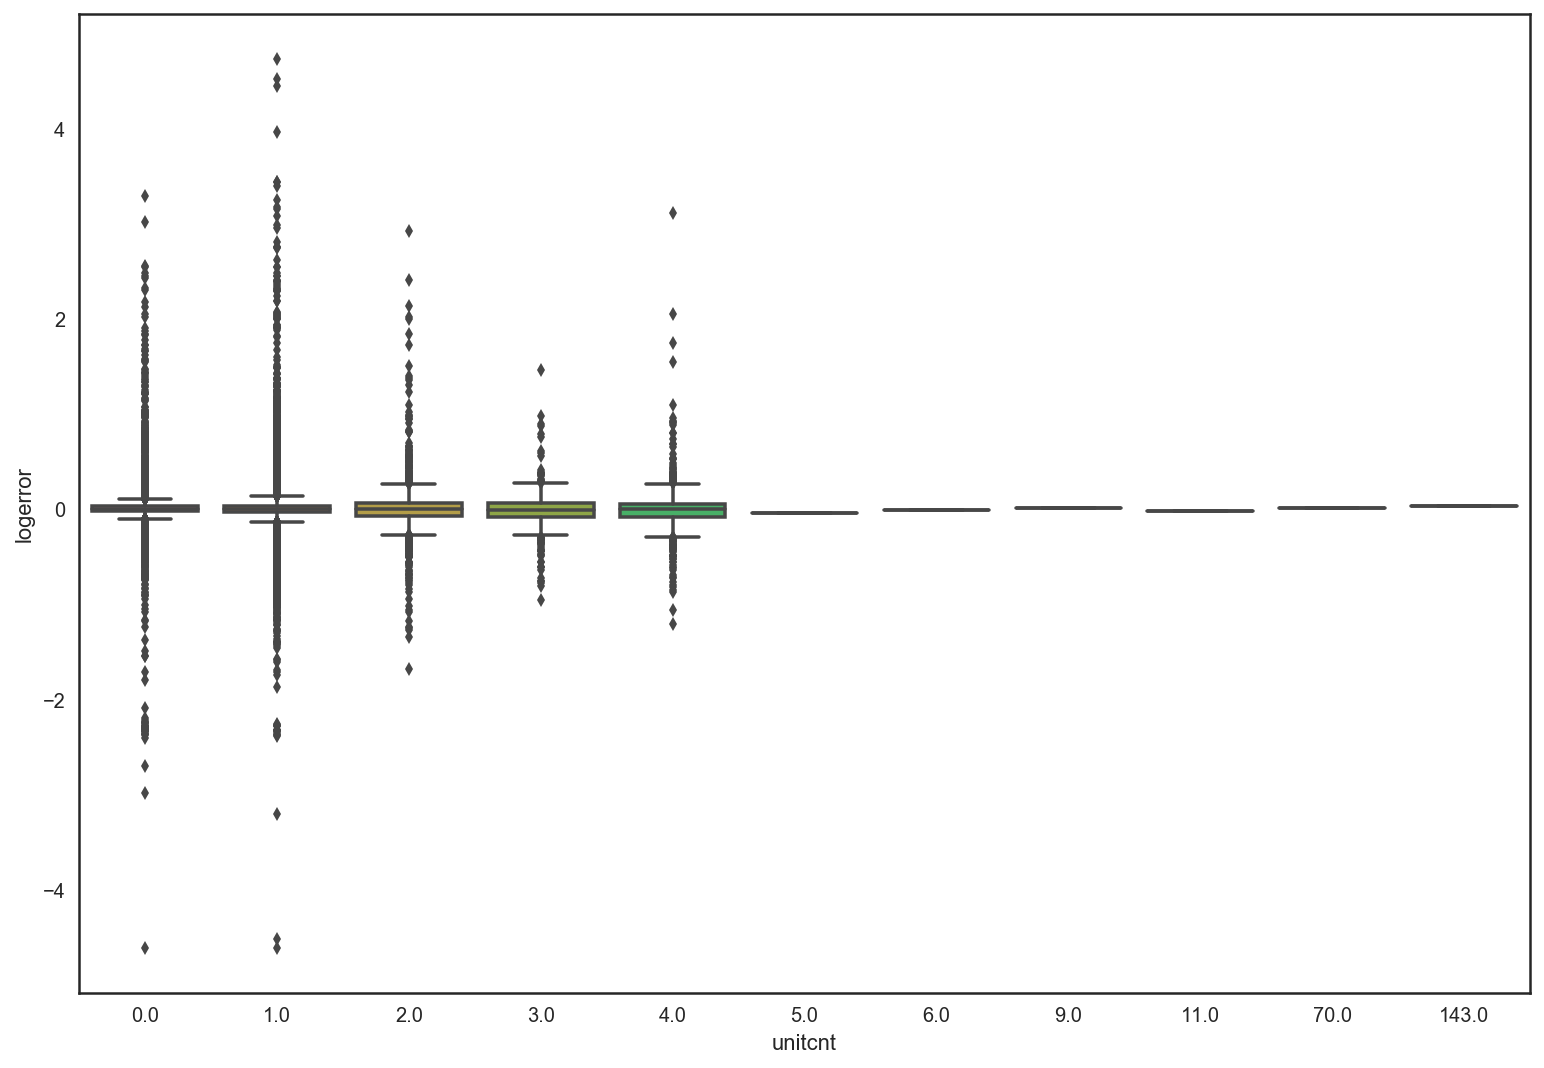

In [90]:
print(data_dict["unitcnt"])
print(np.unique(df_16.unitcnt.dropna()))
df_16.unitcnt.fillna(0, inplace=True)
properties_16.unitcnt.fillna(0, inplace=True)
sns.boxplot(df_16.unitcnt, df_16.logerror) ### 기댓값은 변하지 않는다. 
# 그냥 category 로 처리 
catecols.append("unitcnt")

#### 	tyardbuildingsqft17 & yardbuildingsqft26

,Patio in yard


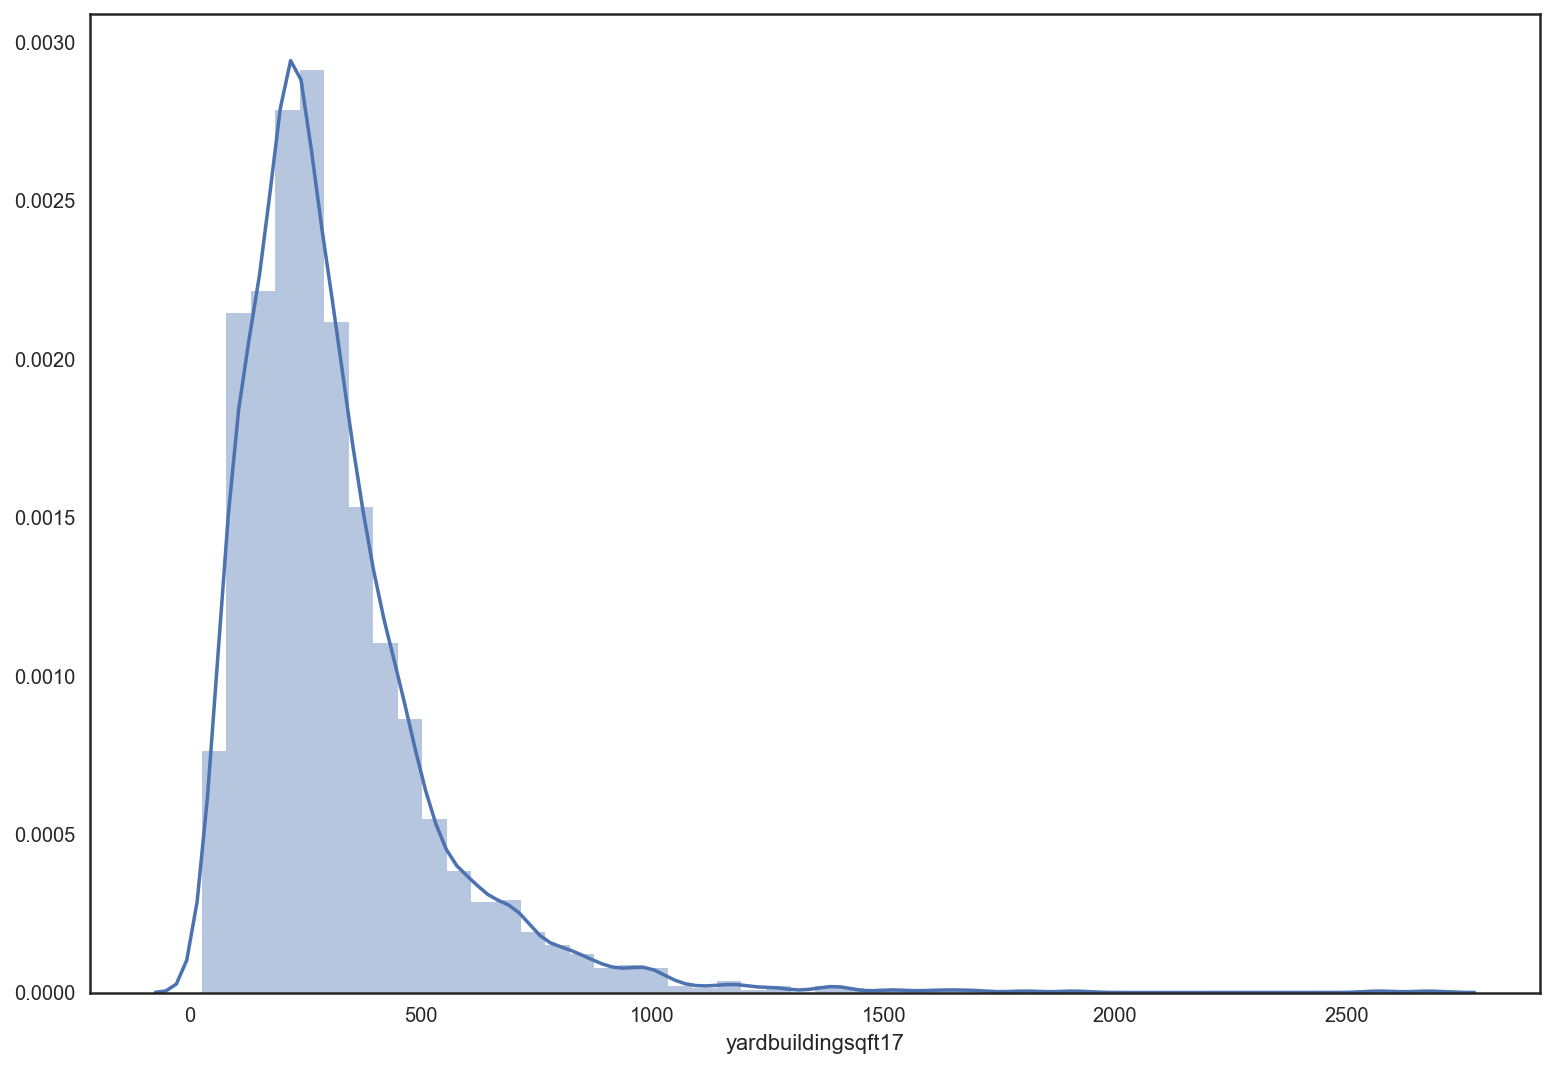

In [91]:
print(data_dict["yardbuildingsqft17"])
df_16.yardbuildingsqft17.describe()
sns.distplot(df_16.yardbuildingsqft17.dropna())

,Storage shed/building in yard


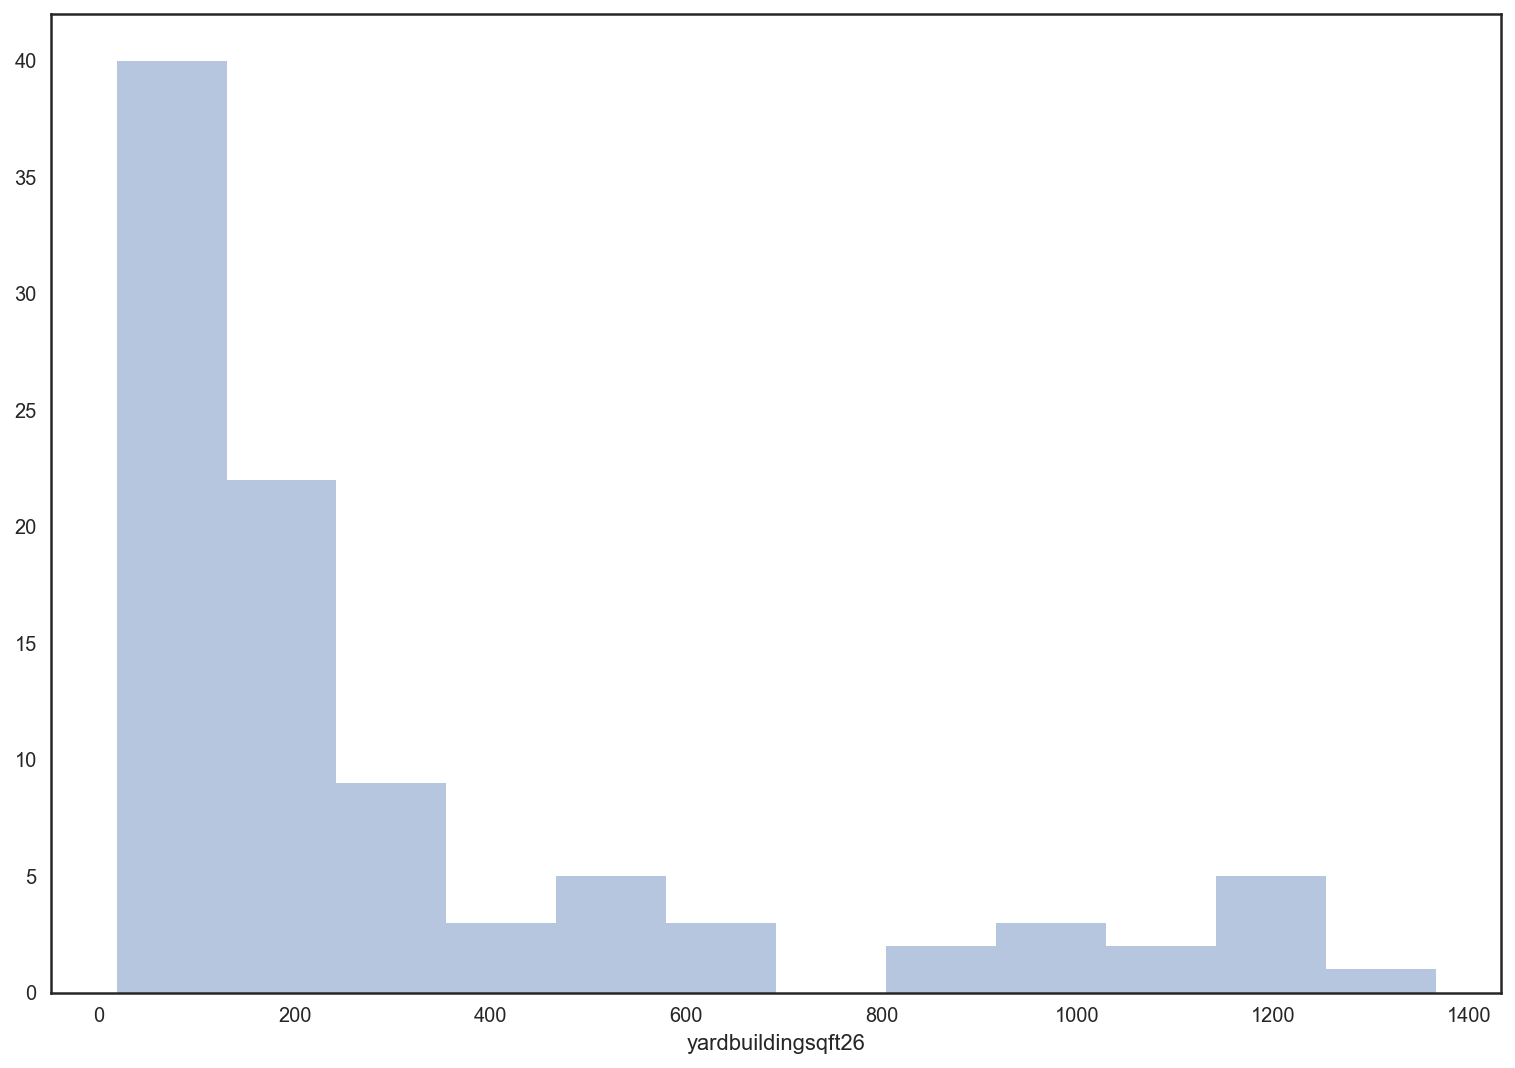

In [92]:
print(data_dict["yardbuildingsqft26"])
df_16.yardbuildingsqft26.describe()
sns.distplot(df_16.yardbuildingsqft26.dropna(), kde=False)

In [93]:
df_16.yardbuildingsqft17.fillna(df_16.yardbuildingsqft17.mode().values[0], inplace=True)
df_16.yardbuildingsqft26.fillna(df_16.yardbuildingsqft26.mode().values[0], inplace=True)
properties_16.yardbuildingsqft17.fillna(df_16.yardbuildingsqft17.mode().values[0], inplace=True)
properties_16.yardbuildingsqft26.fillna(df_16.yardbuildingsqft26.mode().values[0], inplace=True)

In [94]:
numecols.append("yardbuildingsqft17")
numecols.append("yardbuildingsqft26")

#### yearbuilt

In [95]:
year_thres = df_16.yearbuilt.quantile(q=[0.25, 0.5, 0.75]).values

df_16.yearbuilt = np.array([0 if x < 0.25 else x for x in df_16.yearbuilt.values])
df_16.yearbuilt = np.array([2 if x > 0.75 else x for x in df_16.yearbuilt.values])
df_16.yearbuilt = np.array([1 if x != 0 and x != 2 else x for x in df_16.yearbuilt.values])

properties_16.yearbuilt = np.array([0 if x < 0.25 else x for x in properties_16.yearbuilt.values])
properties_16.yearbuilt = np.array([2 if x > 0.75 else x for x in properties_16.yearbuilt.values])
properties_16.yearbuilt = np.array([1 if x != 0 and x != 2 else x for x in properties_16.yearbuilt.values])
catecols.append("yearbuilt")

#### numberofstories

In [96]:
print(np.unique(df_16.numberofstories.dropna()))
df_16.numberofstories.fillna(0, inplace=True)
properties_16.numberofstories.fillna(0, inplace=True)
catecols.append("numberofstories")

[1. 2. 3. 4.]


#### structuretaxvaluedollarcnt

,The assessed value of the built structure on the parcel


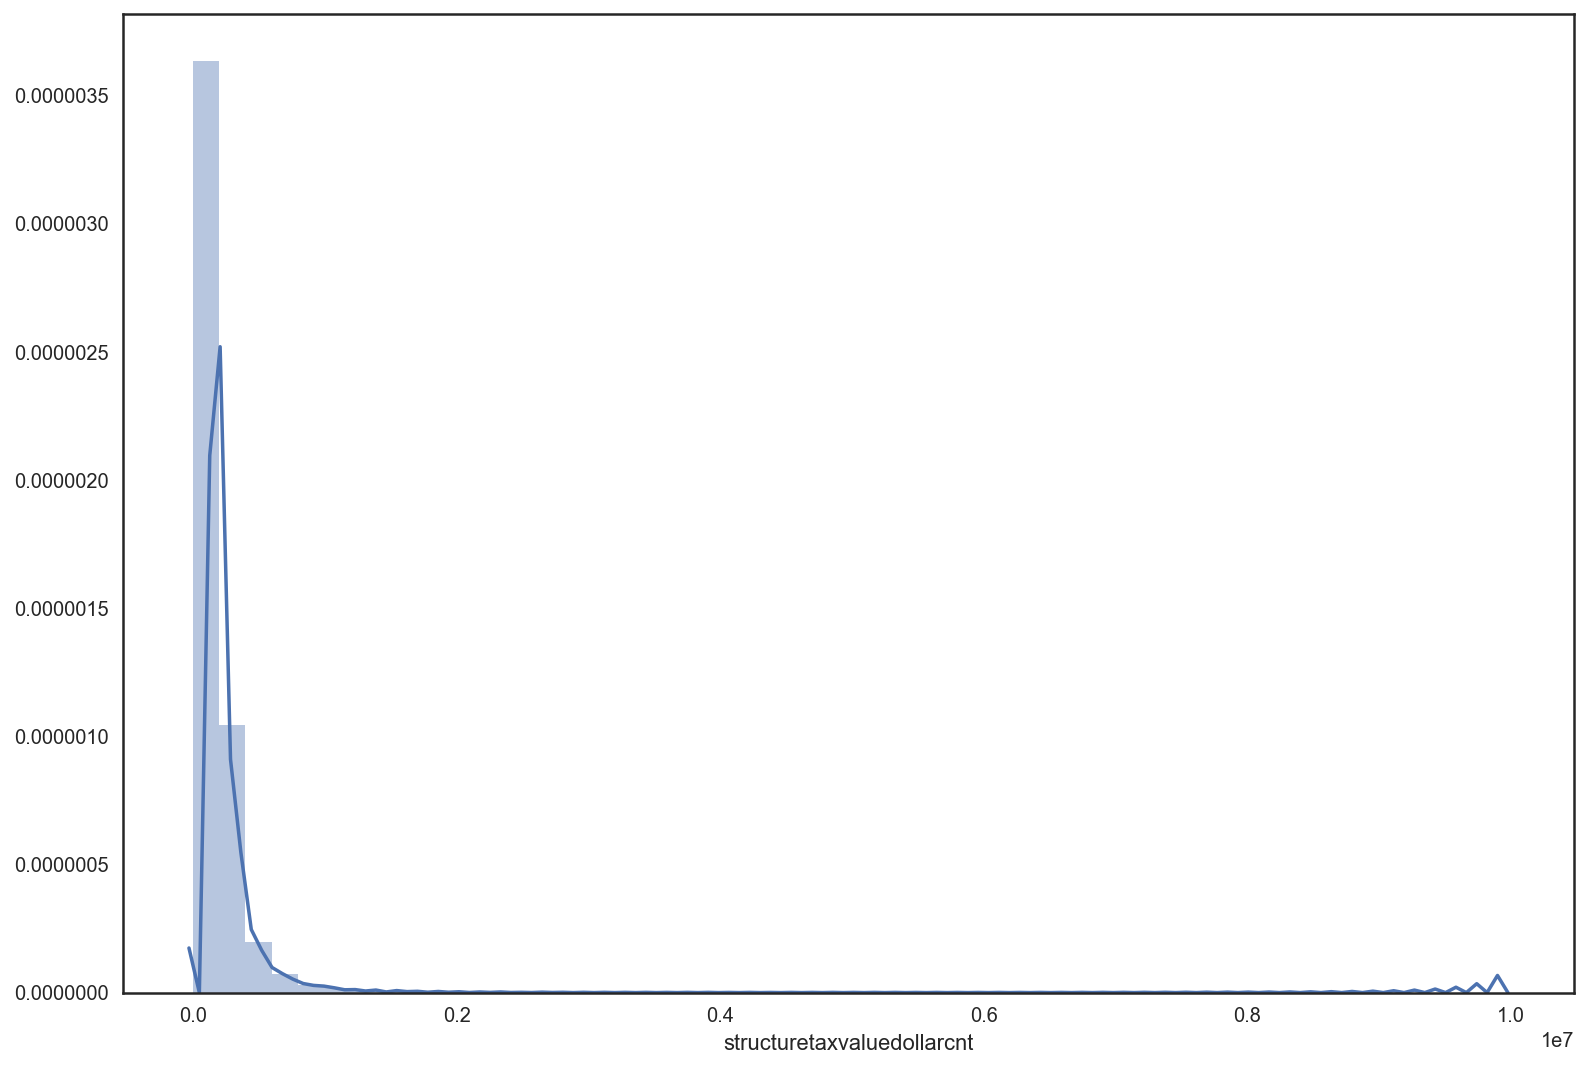

In [97]:
print(data_dict["structuretaxvaluedollarcnt"])
sns.distplot(df_16.structuretaxvaluedollarcnt.dropna())
df_16.structuretaxvaluedollarcnt.fillna(df_16.structuretaxvaluedollarcnt.mode().values[0], inplace=True)
properties_16.structuretaxvaluedollarcnt.fillna(df_16.structuretaxvaluedollarcnt.mode().values[0], inplace=True)
numecols.append("structuretaxvaluedollarcnt")

#### taxvaluedollarcnt

In [98]:
data_dict["taxvaluedollarcnt"]

',The total tax assessed value of the parcel'

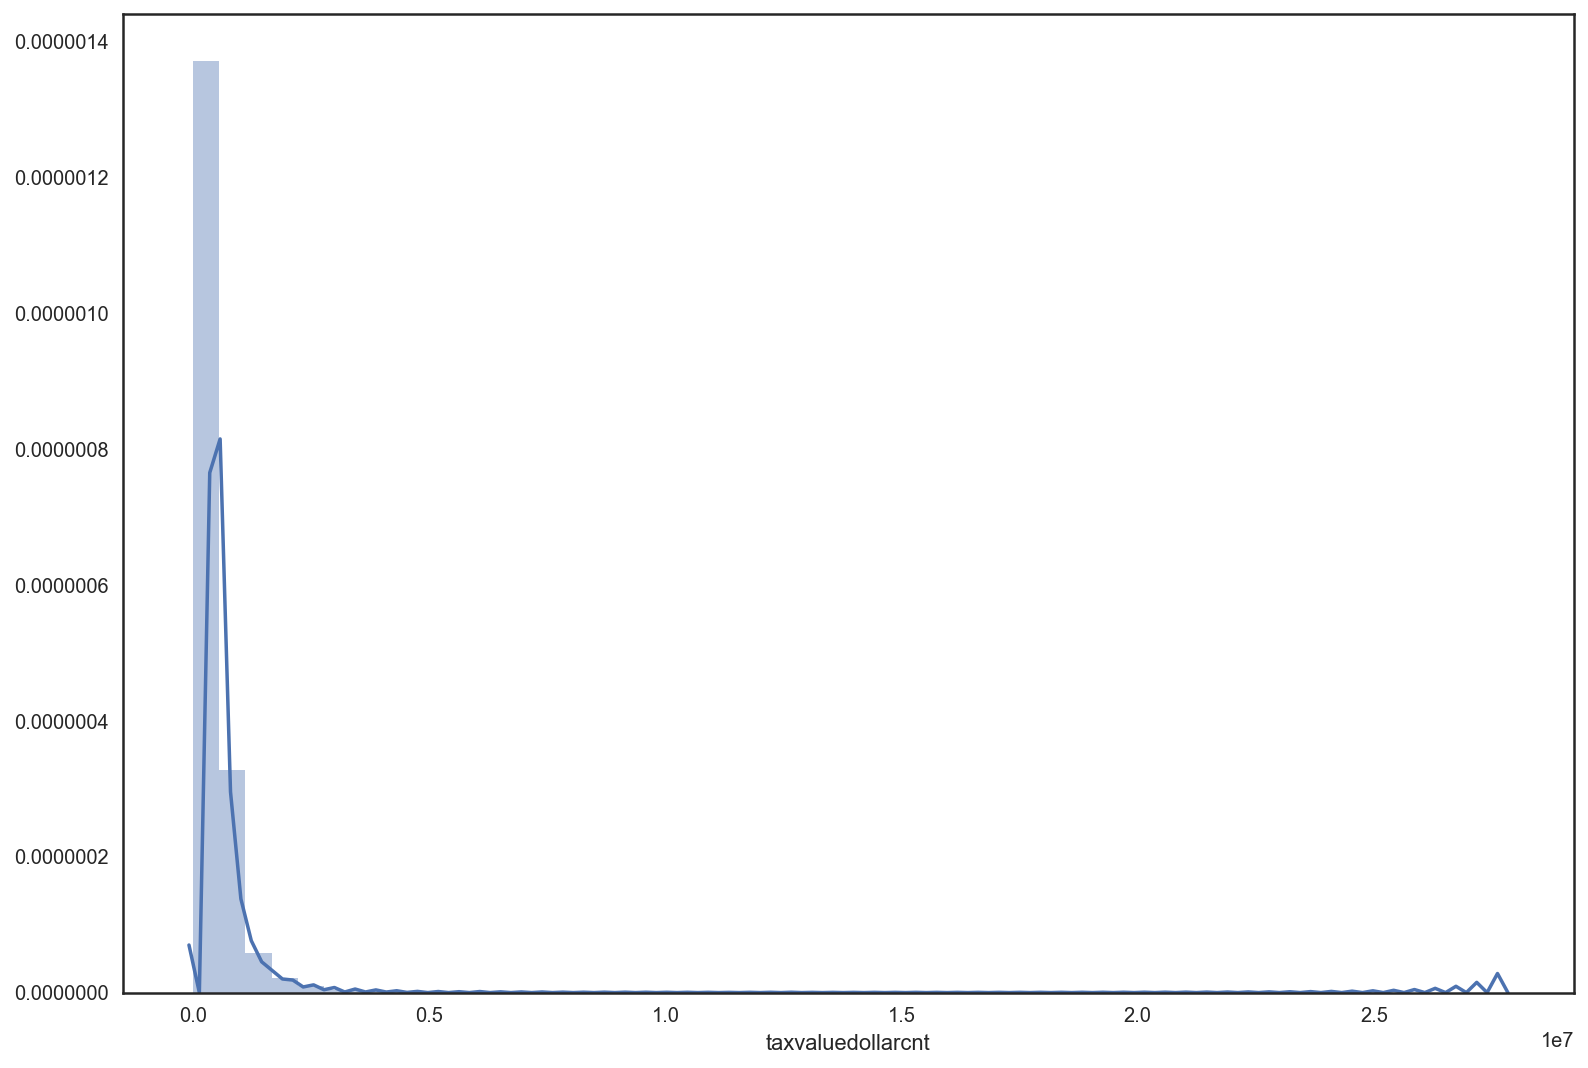

In [99]:
sns.distplot(df_16.taxvaluedollarcnt.dropna())
df_16.taxvaluedollarcnt.fillna(df_16.taxvaluedollarcnt.mode().values[0], inplace=True)
# properties_16.taxvaluedollarcnt.fillna(df_16.taxvaluedollarcnt.mode(), inplace=True)
# properties_16.taxvaluedollarcnt.isnull().sum()
numecols.append("taxvaluedollarcnt")

#### assessmentyear	

In [100]:
data_dict["assessmentyear"]
properties_16.assessmentyear.isnull().sum() # no imputation
del df_16["assessmentyear"]
del properties_16["assessmentyear"]

#### landtaxvaluedollarcnt

In [101]:
print(data_dict["landtaxvaluedollarcnt"])
print(df_16.landtaxvaluedollarcnt.isnull().sum())
df_16.landtaxvaluedollarcnt.fillna(2015.0, inplace=True)
# properties_16.landtaxvaluedollarcnt.isnull().sum()
numecols.append("landtaxvaluedollarcnt")

,The assessed value of the land area of the parcel
1


#### taxamount

,The total property tax assessed for that assessment year


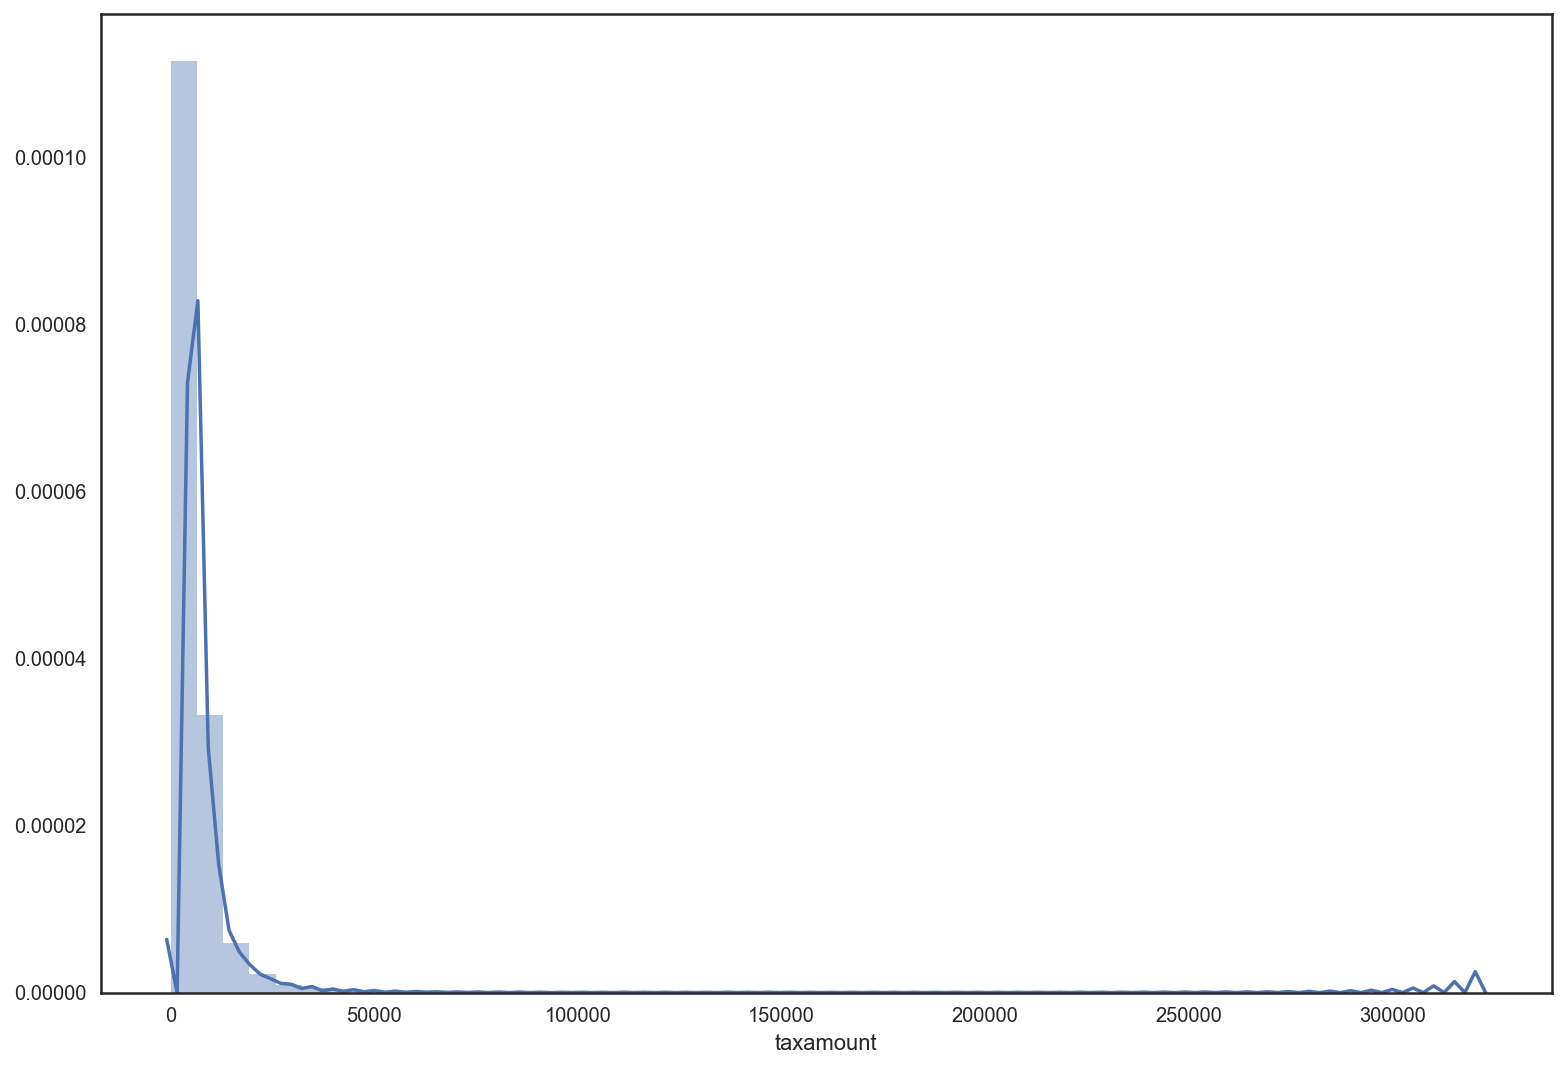

In [102]:
print(data_dict["taxamount"])
sns.distplot(df_16.taxamount.dropna())
# properties_16.taxamount.isnull().sum()
df_16.taxamount.fillna(df_16.taxamount.mode().values[0], inplace=True)
numecols.append("taxamount")

#### taxdelinquencyyear

,Year for which the unpaid propert taxes were due
[ 6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 99.]


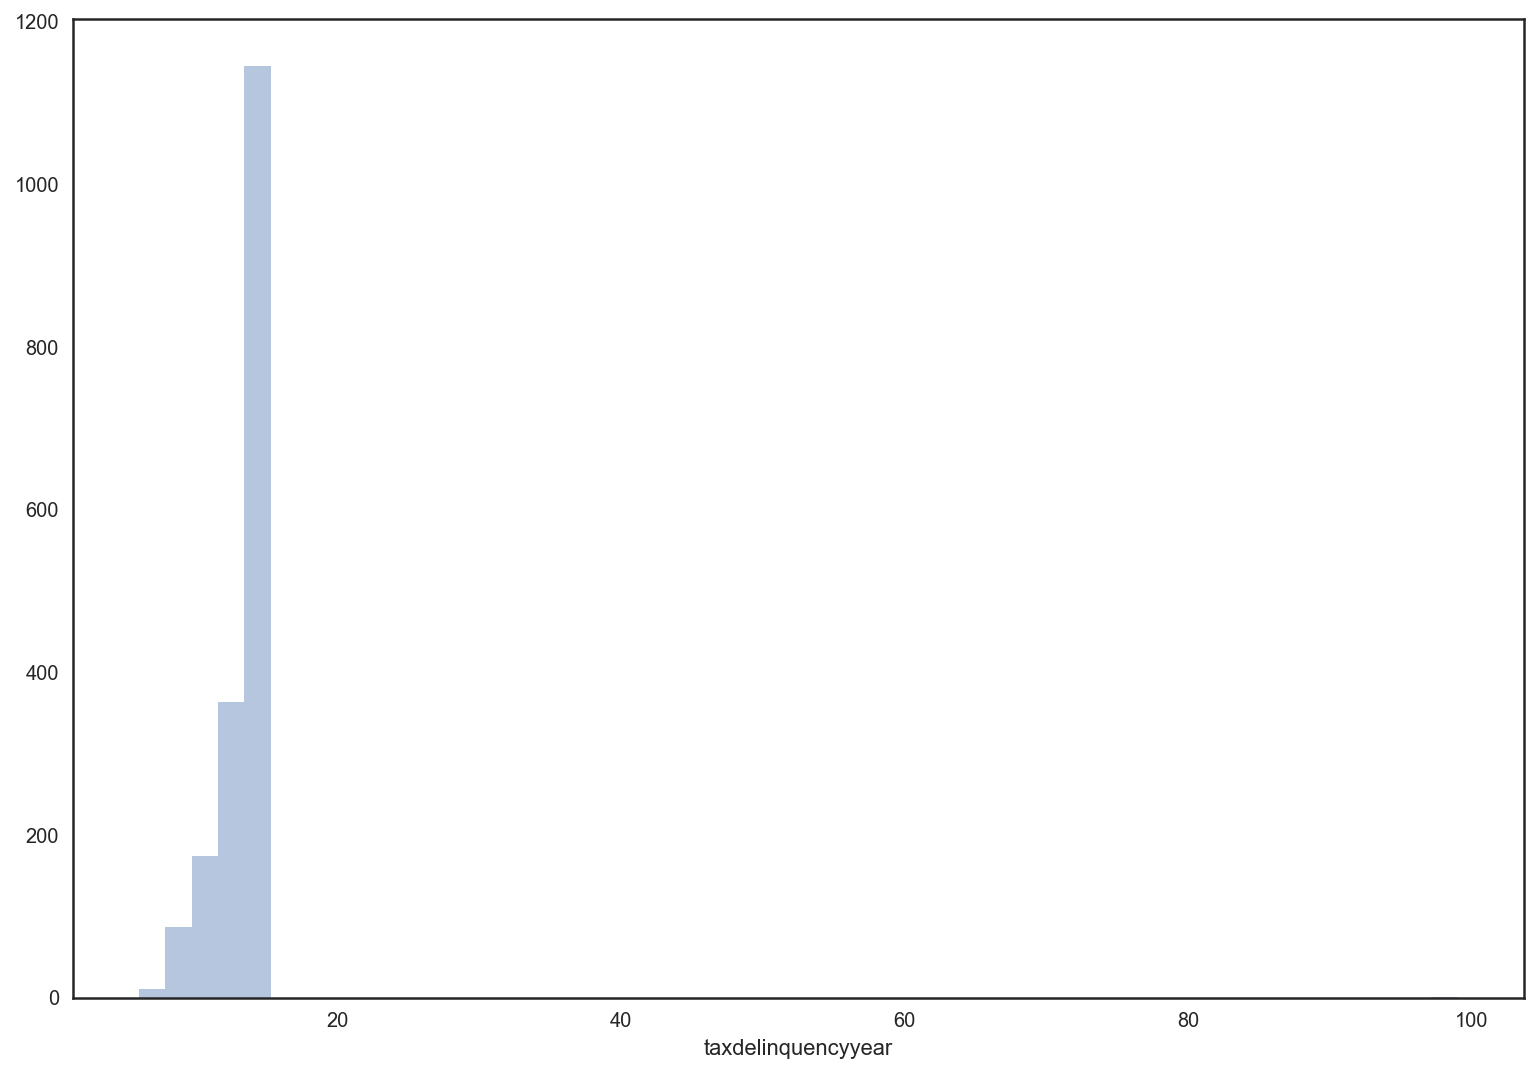

In [103]:
print(data_dict["taxdelinquencyyear"])
print(np.unique(df_16.taxdelinquencyyear.dropna()))
sns.distplot(df_16.taxdelinquencyyear.dropna(), kde=False)
df_16.taxdelinquencyyear.fillna(0, inplace=True)

In [104]:
np.unique(properties_16.taxdelinquencyyear)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 79., 82., 84., 86., 87., 88., 90., 91., 92., 93.,
       94., 95., 96., 97., 98., 99.])

In [105]:
del df_16["taxdelinquencyyear"]
del properties_16["taxdelinquencyyear"]

#### censustractandblock

In [106]:
# sns.distplot(df_16.censustractandblock.dropna(), kde=False)

# properties_16.censustractandblock.isnull().sum() -> 0
# df_16.censustractandblock.isnull().sum() -> 605

df_16.censustractandblock.fillna(df_16.censustractandblock.mean(), inplace=True)
numecols.append("censustractandblock")

### modeling and test 용 데이터 만들기 

In [107]:
df_16.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
count,9.027500e+04,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,9.027500e+04,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,9.027500e+04,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,9.027500e+04,9.027500e+04,9.027500e+04,90275.000000,9.027500e+04,90275.000000
mean,1.298466e+07,0.579086,1.018012,0.339895,2.279474,3.031869,0.000177,3.536461,2.278981,0.007289,1347.974037,1773.185987,1717.183340,1404.545455,2380.090067,1355.546674,2302.546318,6048.870551,0.126414,2.211886,0.011365,345.521228,2.439490,2.651179e+04,0.198294,519.008884,0.012861,0.013337,0.184957,261.832179,6.049179e+07,0.001163,2525.420770,14.517231,993.930379,1.478516,0.003334,0.134190,0.019906,0.717762,242.055896,120.201728,1.991626,0.328286,1.797563e+05,4.576714e+05,2.783323e+05,5983.680847,6.049151e+13,0.011457
std,2.504510e+06,1.880576,0.364878,18.205899,1.004271,1.156436,0.013312,3.077455,1.004660,0.085063,179.777646,924.758076,894.258742,2.073067,212.217924,185.648388,91.827066,20.663461,0.398912,0.990154,0.106001,153.763301,3.472961,1.149066e+05,0.398717,16.056320,0.112674,0.114714,0.388265,5.182901,2.050549e+05,0.034085,805.694842,2848.082138,9758.044014,2.819627,0.152738,0.344543,0.346224,0.832266,38.937620,12.788392,0.091128,0.657845,2.087537e+05,5.548814e+05,4.004943e+05,6838.745460,2.039736e+11,0.161079
min,1.071174e+07,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,2.000000,2.000000,1056.000000,560.000000,44.000000,257.000000,6037.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.670000e+02,0.000000,28.000000,0.000000,0.000000,0.000000,31.000000,6.037101e+07,0.000000,1286.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,18.000000,1.000000,0.000000,1.000000e+02,2.200000e+01,2.200000e+01,49.080000,6.037101e+13,-4.605000
25%,1.155950e+07,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1347.974037,1187.000000,1190.000000,1404.545455,2380.090067,1355.546674,2302.546318,6037.000000,0.000000,2.000000,0.000000,345.521228,0.000000,5.962000e+03,0.000000,519.000000,0.000000,0.000000,0.000000,261.000000,6.037320e+07,0.000000,1286.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,120.000000,2.000000,0.000000,8.149000e+04,1.990235e+05,8.222750e+04,2872.470000,6.037400e+13,-0.025300
50%,1.254734e+07,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,4.000000,2.000000,0.000000,1347.974037,1547.000000,1476.000000,1404.545455,2380.090067,1355.546674,2302.546318,6037.000000,0.000000,2.000000,0.000000,345.521228,2.000000,6.756000e+03,0.000000,519.000000,0.000000,0.000000,0.000000,261.000000,6.037620e+07,0.000000,3101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,240.000000,120.000000,2.000000,0.000000,1.31507

In [108]:
properties_16.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock
count,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2985217.0,2.985217e+06,2985217.0,2985217.0,2985217.0,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2985217.0,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06
mean,1.332586e+07,5.249796e-01,1.012593e+00,1.352235e+00,2.204500e+00,3.080936e+00,3.103627e-03,4.107061e+00,2.243156e+00,5.726887e-03,9.468650e+01,1.793171e+03,1.597352e+03,4.027202e+00,1.760093e+02,9.525109e+01,1.878627e+01,6.024864e+03,1.017669e+00,2.190438e+00,1.045854e-02,1.142539e+02,2.822640e+00,2.071205e+04,1.0,5.858327e+00,1.0,1.0,1.0,2.590560e+02,6.025172e+07,1.264565e-03,2.560616e+03,1.981763e+01,1.056413e+03,1.473192e+00,1.003264e+00,1.001045e+00,1.011300e+00,1.120013e+00,9.581435e+00,1.245880e+00,2.0,1.091727e+00,1.677362e+05,4.144857e+05,2.467495e+05,5.321323e+03,5.896216e+13
std,7.909966e+06,1.852887e+00,3.000040e-01,1.963662e+01,1.078279e+00,1.279940e+00,5.562370e-02,2.707261e+00,1.013891e+00,7.545920e-02,3.842834e+02,1.819582e+03,1.056131e+03,6.232347e+01,1.531402e+03,3.897639e+02,6.921139e+02,3.741196e+02,1.579620e-01,1.002008e+00,1.017308e-01,2.198823e+02,2.955093e+00,3.216699e+05,0.0,5.328505e+01,0.0,0.0,0.0,2.254358e+01,3.741925e+06,3.553823e-02,8.024176e+02,3.525910e+03,1.005599e+04,2.835091e+00,1.399066e-01,3.815435e-02,2.381156e-01,1.994175e+00,6.422264e+01,1.375823e+01,0.0,3.079103e-01,3.990106e+05,7.228718e+05,4.415392e+05,9.151291e+03,9.479036e+12
min,1.071172e+07,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.0,1.0,1.0,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.164371e+07,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.194000e+03,1.088000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.037000e+03,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,5.185000e+03,1.0,1.000000e+00,1.0,1.0,1.0,2.610000e+02,6.037312e+07,0.000000e+00,1.286000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.0,1.000000e+00,7.216500e+04,1.738980e+05,6.821400e+04,2.409510e+03,6.037301e+13
50%,1.254509e+07,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.559000e+03,1.463000e+

In [109]:
df_16.to_csv("../Data/train_2016_for_model.csv",index=False, encoding="utf8")
properties_16.to_csv("../Data/properties_2016_for_test.csv", index=False, encoding="utf8")

In [110]:
with open("../Data/catecols.p", "wb") as f:
    pickle.dump(catecols, f) 
with open("../Data/numecols.p", "wb") as f:
    pickle.dump(numecols, f) 
with open("../Data/bincols.p", "wb") as f:
    pickle.dump(bincols, f)     

In [111]:
df_16[df_16.columns[:]].describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
count,9.027500e+04,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,9.027500e+04,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,9.027500e+04,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,9.027500e+04,9.027500e+04,9.027500e+04,90275.000000,9.027500e+04,90275.000000
mean,1.298466e+07,0.579086,1.018012,0.339895,2.279474,3.031869,0.000177,3.536461,2.278981,0.007289,1347.974037,1773.185987,1717.183340,1404.545455,2380.090067,1355.546674,2302.546318,6048.870551,0.126414,2.211886,0.011365,345.521228,2.439490,2.651179e+04,0.198294,519.008884,0.012861,0.013337,0.184957,261.832179,6.049179e+07,0.001163,2525.420770,14.517231,993.930379,1.478516,0.003334,0.134190,0.019906,0.717762,242.055896,120.201728,1.991626,0.328286,1.797563e+05,4.576714e+05,2.783323e+05,5983.680847,6.049151e+13,0.011457
std,2.504510e+06,1.880576,0.364878,18.205899,1.004271,1.156436,0.013312,3.077455,1.004660,0.085063,179.777646,924.758076,894.258742,2.073067,212.217924,185.648388,91.827066,20.663461,0.398912,0.990154,0.106001,153.763301,3.472961,1.149066e+05,0.398717,16.056320,0.112674,0.114714,0.388265,5.182901,2.050549e+05,0.034085,805.694842,2848.082138,9758.044014,2.819627,0.152738,0.344543,0.346224,0.832266,38.937620,12.788392,0.091128,0.657845,2.087537e+05,5.548814e+05,4.004943e+05,6838.745460,2.039736e+11,0.161079
min,1.071174e+07,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,2.000000,2.000000,1056.000000,560.000000,44.000000,257.000000,6037.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.670000e+02,0.000000,28.000000,0.000000,0.000000,0.000000,31.000000,6.037101e+07,0.000000,1286.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,18.000000,1.000000,0.000000,1.000000e+02,2.200000e+01,2.200000e+01,49.080000,6.037101e+13,-4.605000
25%,1.155950e+07,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1347.974037,1187.000000,1190.000000,1404.545455,2380.090067,1355.546674,2302.546318,6037.000000,0.000000,2.000000,0.000000,345.521228,0.000000,5.962000e+03,0.000000,519.000000,0.000000,0.000000,0.000000,261.000000,6.037320e+07,0.000000,1286.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,120.000000,2.000000,0.000000,8.149000e+04,1.990235e+05,8.222750e+04,2872.470000,6.037400e+13,-0.025300
50%,1.254734e+07,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,4.000000,2.000000,0.000000,1347.974037,1547.000000,1476.000000,1404.545455,2380.090067,1355.546674,2302.546318,6037.000000,0.000000,2.000000,0.000000,345.521228,2.000000,6.756000e+03,0.000000,519.000000,0.000000,0.000000,0.000000,261.000000,6.037620e+07,0.000000,3101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,240.000000,120.000000,2.000000,0.000000,1.31507

In [ ]:
### Test set 도 imputation and category data 정리


In [ ]:
# categorical 로 도 시도 해 볼 컬럼들 
["bathroomcnt", "bedroomcnt", "calculatedbathnbr", "fireplacecnt", "fullbathcnt", "poolsizesum", "roomcnt"]

In [ ]:
def substracting_category_class(series, prac_list):

In [ ]:
sns.boxplot(x=[x[:2] for x in df_16.propertyzoningdesc.fillna("nana")], y=df_16.logerror)